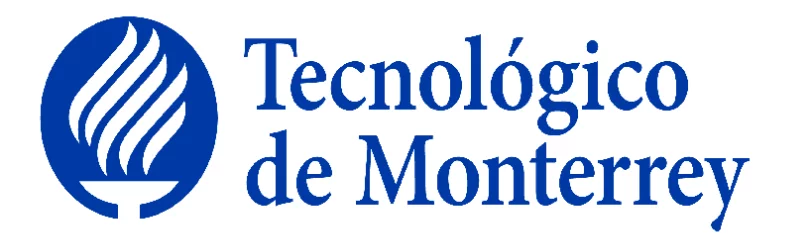
#**Reto**

##Rigoberto Vega Escudero, A01793132

##Carlos Enriquez Gorgonio - A01793102

##Materia: Ciencia De Datos

##Profesor:Maria De La Paz Rico Fernandez

##11/Noviembre/2022

# Limpieza e interpretacion de los datos

##**Limpieza, análisis, visualización y agrupamiento.**

Limpieza de base de datos.
Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
- Identificando tendencias centrales promedio, media y mediana de los datos. 
- Identificar medidas de dispersión, máximo, mínimo .
- Identificar medidas de posición no centrales , los cuartiles , outliers.   
- Identificar correlaciones.
- Preparar los datos 
- Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
- Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Como base del ejercicio, se procede a cargar las librerias que se utilizaran
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

#**Limpieza, graficos y seleccion de datos**

#**Limpieza Aguas Superficiales**

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',  encoding='latin-1')
df

CLAVE                                              SITIO  \
0       DLAGU8  PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA   
1     DLBAJ100                         LOS CABOS SEG 22, 2 ISA10B   
2     DLBAJ101                         LOS CABOS SEG 22, 1 ISA10B   
3     DLBAJ102                                        LOS CABOS 3   
4     DLBAJ103                                        LOS CABOS 1   
...        ...                                                ...   
4136       NaN                                                NaN   
4137       NaN                                                NaN   
4138       NaN                                                NaN   
4139       NaN                                                NaN   
4140       NaN                                                NaN   

               ORGANISMO_DE_CUENCA               ESTADO        MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES  RINCON DE ROMOS   
1     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR        LOS CABOS   
2     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR        LOS CABOS   
3     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR        LOS CABOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR        LOS CABOS   
...                            ...                  ...              ...   
4136                           NaN                  NaN              NaN   
4137                           NaN                  NaN              NaN   
4138                           NaN                  NaN              NaN   
4139                           NaN                  NaN              NaN   
4140                           NaN                  NaN              NaN   

                 CUENCA     CUERPO DE AGUA     TIPO     SUBTIPO   LONGITUD  \
0         RIO SAN PEDRO  PRESA EL SAUCILLO  LENTICO       PRESA -102.33911   
1     SAN JOSE DEL CABO    OCEANO PACIFICO  COSTERO  OCEANO-MAR -109.84290   
2             SAN LUCAS    OCEANO PACIFICO  COSTERO  OCEANO-MAR -109.86442   
3             SAN LUCAS    BAHIA SAN LUCAS  COSTERO       BAHIA -109.88604   
4             SAN LUCAS    BAHIA SAN LUCAS  COSTERO       BAHIA -109.89657   
...                 ...                ...      ...         ...        ...   
4136                NaN                NaN      NaN         NaN        NaN   
4137                NaN                NaN      NaN         NaN        NaN   
4138                NaN                NaN      NaN         NaN        NaN   
4139                NaN                NaN      NaN         NaN        NaN   
4140                NaN                NaN      NaN         NaN        NaN   

      ...  CONTAMINANTES  CUMPLE_CON_DBO CUMPLE_CON_DQO CUMPLE_CON_SST  \
0     ...        DQO,CF,              SI             NO             SI   
1     ...            NaN              ND             ND             SI   
2     ...            NaN              ND             ND             SI   
3     ...            NaN              ND             ND             SI   
4     ...            NaN              ND             ND             SI   
...   ...            ...             ...            ...            ...   
4136  ...            NaN             NaN            NaN            NaN   
4137  ...            NaN             NaN            NaN            NaN   
4138  ...            NaN             NaN            NaN            NaN   
4139  ...            NaN             NaN            NaN            NaN   
4140  ...            NaN             NaN            NaN            NaN   

     CUMPLE_CON_CF CUMPLE_CON_E_COLI CUMPLE_CON_ENTEROC CUMPLE_CON_OD  \
0               NO                SI                 ND            SI   
1               ND                ND                 SI            SI   
2               ND                ND                 SI            SI   
3               ND                ND                 SI            SI   
4               ND                ND                 SI            SI   
...

##Dentro del Dataset podemos notar una gran cantidad de valores Nan, el objetivo es tratar de preservar la mayor cantidad de datos posibles para los analisis posteriores.

In [ ]:
#En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
df.isna().any()

CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

##Aqui notamos que tenemos mas informacion que la que deberiamos 4141 datos en vez de solo 3493, procedemos a quitar esos datos sobrantes.

In [ ]:
df = df.dropna(how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

##Revisamos que esten las columnas y empezamos a trabajar para separar en base a los datos faltantes y aplicar transformaicones de formato necesarias.

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

##Al analizar el Dataset, podemos notar que el semaforo es nuestra principal fuente de indicacion es el semaforo. Por ende haremos una limpieza siguiendo lo siguiente:



###1. Evaluaremos 3 data sets, uno para cada semaforo y trabajar con sus NaN y faltantes de manera separada.

Primero crearemos una lista de las variables numericas quimicas, aqui procederemos a eliminar datos cadena como '< 2' para poder convertirlos a datos numeros cercanos al valor que indican y ademas procederemos a llenar los valores NaN con la media total del dataset a trabajar, osea que no llenaremos todo el dataset con una media genera, sino que buscaremos aislar cada tipo y aplicarle una media de acuerdo a su color.

In [ ]:
df_verde = df[df.SEMAFORO == 'Verde'].copy()
df_rojo = df[df.SEMAFORO == 'Rojo'].copy()
df_amarillo = df[df.SEMAFORO == 'Amarillo'].copy()
dfs = [df_verde, df_rojo, df_amarillo]

In [ ]:
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']

In [ ]:
#Limpieza Verdes
lista_verde = list()
lista_rojo = list()
lista_amarillo = list()

for name in NumericasQuimicas:
  df_verde[name] = df_verde[name].astype('str')
  df_verde[name] = df_verde[name].str.replace('<1','1') 
  df_verde[name] = df_verde[name].str.replace('<2','2') 
  df_verde[name] = df_verde[name].str.replace('<3','3') 
  df_verde[name] = df_verde[name].str.replace('<10','10') 
  df_verde[name]= df_verde[name].astype('float')
  mean = df_verde[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_verde[name]= df_verde[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_verde.append([name, mean])
  

#Limpieza Rojos
for name in NumericasQuimicas:
  df_rojo[name] = df_rojo[name].astype('str')
  df_rojo[name] = df_rojo[name].str.replace('<1','1') 
  df_rojo[name] = df_rojo[name].str.replace('<2','2') 
  df_rojo[name] = df_rojo[name].str.replace('<3','3') 
  df_rojo[name] = df_rojo[name].str.replace('<10','10') 
  df_rojo[name]= df_rojo[name].astype('float')
  mean = df_rojo[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_rojo[name]= df_rojo[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_rojo.append([name, mean])

#Limpieza Amarillos
for name in NumericasQuimicas:
  df_amarillo[name] = df_amarillo[name].astype('str')
  df_amarillo[name] = df_amarillo[name].str.replace('<1','1') 
  df_amarillo[name] = df_amarillo[name].str.replace('<2','2') 
  df_amarillo[name] = df_amarillo[name].str.replace('<3','3') 
  df_amarillo[name] = df_amarillo[name].str.replace('<10','10') 
  df_amarillo[name]= df_amarillo[name].astype('float')
  mean = df_amarillo[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_amarillo[name]= df_amarillo[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_amarillo.append([name, mean])


### 2. Para este paso haremos una comparacion con las escalas del archivo de tratamientos para aplicarles en base a los nuevos datos rellenados con la media su correcta escala de acuerdo a la tabla.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Escalas_superficial.csv',  encoding='latin-1')
df

CALIDAD DEL AGUA PARA TOXICIDAD  \
0                                           No t¢xico   
1                                      Toxicidad baja   
2                                  Toxicidad moderada   
3                                      Toxicidad alta   
4                           CALIDAD DEL AGUA PARA SST   
5                                           Excelente   
6                                       Buena calidad   
7                                           Aceptable   
8                                         Contaminada   
9                             Fuertemente contaminada   
10          CALIDAD DEL AGUA PARA ENTEROCOCOS FECALES   
11                                          Excelente   
12                                      Buena calidad   
13                                        Contaminada   
14                            Fuertemente contaminada   
15                       CALIDAD DEL AGUA PARA E_COLI   
16                                          Excelente   
17                                      Buena calidad   
18                                          Aceptable   
19                                        Contaminada   
20                            Fuertemente contaminada   
21                          CALIDAD DEL AGUA PARA DQO   
22                                          Excelente   
23                                      Buena calidad   
24                                          Aceptable   
25                                        Contaminada   
26                            Fuertemente contaminada   
27                         CALIDAD DEL AGUA PARA DBO5   
28                                          Excelente   
29                                      Buena calidad   
30                                          Aceptable   
31                                        Contaminada   
32                            Fuertemente contaminada   
33       CALIDAD DEL AGUA PARA COLI_FEC_superficiales   
34                                          Excelente   
35                                      Buena calidad   
36                                          Aceptable   
37                                        Contaminada   
38                            Fuertemente contaminada   
39  CALIDAD DEL AGUA PARA OXIGENO DISUELTO _porcen...   
40                                          Excelente   
41                                      Buena calidad   
42                                          Aceptable   
43                                        Contaminada   
44                            Fuertemente contaminada   

                                             CRITERIO  \
0                                       TOX menor a 1   
1        TOX mayor o igual a 1 y menor o igual a 1.33   
2                       TOX mayor de 1.33 y menor a 5   
3                               TOX mayor o igual a 5   
4                                           CRITERIO    
5                              SST menor o igual a 25   
6                SST mayor de 25 y menor o igual a 75   
7               SST mayor de 75 y menor o igual a 150   
8              SST mayor de 150 y menor o igual a 400   
9                                    SST mayor de 400   
10                                           CRITERIO   
11                        ENTEROC menor o igual a 100   
12         ENTEROC mayor de 100 y menor o igual a 200   
13         ENTEROC mayor de 200 y menor o igual a 500   
14                               ENTEROC mayor de 500   
15                                           CRITERIO   
16                         E_COLI menor o igual a 126   
17          E_COLI mayor de 126 y menor o igual a 576   
18          E_COLI mayor de 576 y menor o igual a 850   
19         E_COLI mayor de 850 y menor o igual a 1000   
20                               E_COLI mayor de 1000   
21                                           CRITERIO   
22                             DQO menor o igual a 10   
23               DQO mayor de 1

Utilizando el promedio de los datos para rellenar valores, ahora asignaremos la etiqueta correspondiente al valor acorde a las escalas dadas por el dataset

In [ ]:
#DataFrame para valores de verde
escala_verde = ['Buena Calidad','Buena Calidad','Excelente','Aceptable','Excelente','Excelente','Excelente','Excelente','Excelente',
             'Excelente','Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Verde_df_means = pd.DataFrame(lista_verde, columns = ['Nombre','Valor de la media'])
Verde_df_means['Escala Nueva'] = escala_verde
Verde_df_means

Nombre  Valor de la media    Escala Nueva
0             DBO_mg/L           3.372192   Buena Calidad
1             DQO_mg/L          18.241230   Buena Calidad
2             SST_mg/L          24.810056       Excelente
3   COLI_FEC_NMP_100mL         281.205882       Aceptable
4     E_COLI_NMP_100mL          91.069853       Excelente
5    ENTEROC_NMP_100mL          18.582263       Excelente
6              OD_PORC          75.425573       Excelente
7          OD_PORC_SUP          82.649896       Excelente
8          OD_PORC_MED          78.641516       Excelente
9          OD_PORC_FON          74.517577       Excelente
10         TOX_D_48_UT           1.006513  Toxicidad Baja
11         TOX_V_15_UT           1.009210  Toxicidad Baja
12     TOX_D_48_SUP_UT           1.011264  Toxicidad Baja
13     TOX_D_48_FON_UT                NaN             NaN
14   TOX_FIS_SUP_15_UT           1.000000  Toxicidad Baja
15   TOX_FIS_FON_15_UT                NaN             NaN

In [ ]:
#Data Frame para Rojo
escala_rojo = ['Contaminada','Contaminada','Contaminada','Fuertemente contaminada','Fuertemente contaminada','Fuertemente contaminada','Aceptable','Excelente','Buena Calidad',
             'Buena Calidad','Toxicidad Baja','Toxicidad moderada','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Rojo_df_means = pd.DataFrame(lista_rojo, columns = ['Nombre','Valor de la media'])
Rojo_df_means['Escala Nueva'] = escala_rojo
Rojo_df_means

Nombre  Valor de la media             Escala Nueva
0             DBO_mg/L          40.030949              Contaminada
1             DQO_mg/L         144.593989              Contaminada
2             SST_mg/L         201.451951              Contaminada
3   COLI_FEC_NMP_100mL      249035.327292  Fuertemente contaminada
4     E_COLI_NMP_100mL      210243.791045  Fuertemente contaminada
5    ENTEROC_NMP_100mL        6324.796078  Fuertemente contaminada
6              OD_PORC          49.159634                Aceptable
7          OD_PORC_SUP          75.384412                Excelente
8          OD_PORC_MED          61.630556            Buena Calidad
9          OD_PORC_FON          55.338647            Buena Calidad
10         TOX_D_48_UT           1.161204           Toxicidad Baja
11         TOX_V_15_UT           3.179268       Toxicidad moderada
12     TOX_D_48_SUP_UT           1.139708           Toxicidad Baja
13     TOX_D_48_FON_UT                NaN                      NaN
14   TOX_FIS_SUP_15_UT           1.082407           Toxicidad Baja
15   TOX_FIS_FON_15_UT                NaN                      NaN

In [ ]:
escala_amarillo = ['Buena Calidad','Buena Calidad','Aceptable','Fuertemente contaminada','Fuertemente contaminada','Excelente','Excelente','Excelente','Buena Calidad','Buena Calidad',
             'Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Amarillo_df_means = pd.DataFrame(lista_amarillo, columns = ['Nombre','Valor de la media'])
Amarillo_df_means['Escala Nueva'] = escala_amarillo
Amarillo_df_means

Nombre  Valor de la media             Escala Nueva
0             DBO_mg/L           3.821706            Buena Calidad
1             DQO_mg/L          18.644803            Buena Calidad
2             SST_mg/L          93.376443                Aceptable
3   COLI_FEC_NMP_100mL       12109.446364  Fuertemente contaminada
4     E_COLI_NMP_100mL        6901.537273  Fuertemente contaminada
5    ENTEROC_NMP_100mL          39.628571                Excelente
6              OD_PORC          77.476428                Excelente
7          OD_PORC_SUP          87.246667                Excelente
8          OD_PORC_MED          62.990196            Buena Calidad
9          OD_PORC_FON          53.175817            Buena Calidad
10         TOX_D_48_UT           1.004065           Toxicidad Baja
11         TOX_V_15_UT           1.000000           Toxicidad Baja
12     TOX_D_48_SUP_UT           1.001137           Toxicidad Baja
13     TOX_D_48_FON_UT                NaN                      NaN
14   TOX_FIS_SUP_15_UT           1.026016           Toxicidad Baja
15   TOX_FIS_FON_15_UT                NaN                      NaN

###3. Una vez categorizadas las medias de acuerdo a la escala, procederemos a aplicar estas etiquetas en las columnas categoricas que alojan la etiqueta de escala de cada variable quimica.

In [ ]:
CategoriasQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
print(len(CategoriasQuimicas))

16


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_COLI_FEC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_E_COLI':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_ENTEROC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_TOX_D_48':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'na') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'nan') 
  


In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada')
  if name == 'CALIDAD_DQO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_SST':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_COLI_FEC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_OD_PORC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Moderada') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'nan')

In [ ]:
#Limpieza de las categorias de Amarillo
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_COLI_FEC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'nan')

###4. Despues tenemos unas columnas que nos dicen si un dato cumple o no con cierta certificacion, por ende con la nueva informacion almacenada en las columanas procedemos a etiquetar si los valores cumplen o no con el nuevo valor.

In [ ]:
CategoricasCumplimiento = ['CUMPLE_CON_DBO',	'CUMPLE_CON_DQO',	'CUMPLE_CON_SST',	'CUMPLE_CON_CF','CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC',	'CUMPLE_CON_OD',	'CUMPLE_CON_TOX']


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_E_COLI':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO')
  if name == 'CUMPLE_CON_DQO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CALIDAD_SST':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_CF':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de amarillas
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')  
  if name == 'CUMPLE_CON_TOX':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 

###Para finalizar agrupamos los 3 dataset ya limpiados en uno general para trabajar sobre este, ademas de aplicar un shuffle para no tener una orden muy especifico que pudiera sesgar a los modelos.

In [ ]:
from sklearn.utils import shuffle
df_limpio_ASuperficiales =  pd.concat([df_verde, df_rojo, df_amarillo])
# df_shuffled = pd.concat([df_verde, df_rojo, df_amarillo])
# df_limpio_ASuperficiales=df_shuffled.sample(frac=1).reset_index(drop=True)
df_limpio_ASuperficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

In [ ]:
df_limpio_ASuperficiales.head(10)

CLAVE                          SITIO           ORGANISMO_DE_CUENCA  \
1   DLBAJ100     LOS CABOS SEG 22, 2 ISA10B  PENINSULA DE BAJA CALIFORNIA   
2   DLBAJ101     LOS CABOS SEG 22, 1 ISA10B  PENINSULA DE BAJA CALIFORNIA   
3   DLBAJ102                    LOS CABOS 3  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ103                    LOS CABOS 1  PENINSULA DE BAJA CALIFORNIA   
5   DLBAJ104           BAHIA CABO SAN LUCAS  PENINSULA DE BAJA CALIFORNIA   
6   DLBAJ105                    LOS CABOS 2  PENINSULA DE BAJA CALIFORNIA   
12  DLBAJ123  OASIS DE LA SIERRA EL PILAR 2  PENINSULA DE BAJA CALIFORNIA   
14  DLBAJ126          MANANTIAL SAN BARTOLO  PENINSULA DE BAJA CALIFORNIA   
15  DLBAJ132          HUMEDAL LOS COMONDU 1  PENINSULA DE BAJA CALIFORNIA   
16  DLBAJ133               ESTERO EL COYOTE  PENINSULA DE BAJA CALIFORNIA   

                 ESTADO  MUNICIPIO                   CUENCA  \
1   BAJA CALIFORNIA SUR  LOS CABOS        SAN JOSE DEL CABO   
2   BAJA CALIFORNIA SUR  LOS CABOS                SAN LUCAS   
3   BAJA CALIFORNIA SUR  LOS CABOS                SAN LUCAS   
4   BAJA CALIFORNIA SUR  LOS CABOS                SAN LUCAS   
5   BAJA CALIFORNIA SUR  LOS CABOS                SAN LUCAS   
6   BAJA CALIFORNIA SUR  LOS CABOS                SAN LUCAS   
12  BAJA CALIFORNIA SUR     LA PAZ  LAS POCITAS-SAN HILARIO   
14  BAJA CALIFORNIA SUR     LA PAZ              SAN BARTOLO   
15  BAJA CALIFORNIA SUR    COMONDU            SANTO DOMINGO   
16  BAJA CALIFORNIA SUR     MULEGE              SAN IGNACIO   

                CUERPO DE AGUA               TIPO     SUBTIPO   LONGITUD  ...  \
1              OCEANO PACIFICO            COSTERO  OCEANO-MAR -109.84290  ...   
2              OCEANO PACIFICO            COSTERO  OCEANO-MAR -109.86442  ...   
3              BAHIA SAN LUCAS            COSTERO       BAHIA -109.88604  ...   
4              BAHIA SAN LUCAS            COSTERO       BAHIA -109.89657  ...   
5              BAHIA SAN LUCAS            COSTERO       BAHIA -109.90250  ...   
6              BAHIA SAN LUCAS            COSTERO       BAHIA -109.90540  ...   
12  CUERPO DE AGUA DEL HUMEDAL   LOTICO (HUMEDAL)      ARROYO -111.00268  ...   
14                 SAN BARTOLO             LOTICO      ARROYO -109.84545  ...   
15       HUMEDAL LOS COMONDU 1   LOTICO (HUMEDAL)      ARROYO -111.80531  ...   
16                      ESTERO  COSTERO (HUMEDAL)      ESTERO -113.46249  ...   

    CONTAMINANTES  CUMPLE_CON_DBO  CUMPLE_CON_DQO CUMPLE_CON_SST  \
1             NaN              SI              SI             SI   
2             NaN              SI              SI             SI   
3             NaN              SI              SI             SI   
4             NaN              SI              SI             SI   
5             NaN              SI              SI             SI   
6             NaN              SI              SI             SI   
12            NaN              SI              SI             SI   
14            NaN              SI              SI             SI   
15            NaN              SI              SI             SI   
16            NaN              SI              SI             SI   

    CUMPLE_CON_CF CUMPLE_CON_E_COLI  CUMPLE_CON_ENTEROC CUMPLE_CON_OD  \
1              SI                SI                  SI            SI   
2              SI                SI                  SI            SI   
3              SI                SI                  SI            SI   
4              SI                SI                  SI            SI   
5              SI                SI                  SI            SI   
6              SI                SI                  SI            SI   
12             SI                SI                  SI            SI   
14             SI                SI                  SI            SI   
15             SI                SI                  SI            SI   
16             SI                SI                  SI            SI   

    CUMPLE_CON_TOX  

In [ ]:
df_limpio_ASuperficiales.drop(['CONTAMINANTES', 'TOX_FIS_FON_15_UT', 'CALIDAD_TOX_FIS_FON_15', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON'], axis = 'columns', inplace = True)
df_limpio_ASuperficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3492
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

###Quitaremos del Dataset las columnas de CONTAMINANTES, ya que es una columna muy redundante y no aporta mucho valor a futuros analisis y ademas las columnsa TOX_FIS_FON_15_UT, CALIDAD_TOX_FIS_FON_15, TOX_D_48_FON_UT, CALIDAD_TOX_D_48_FON, ya que sus valores estan vacios en todas las casillas

###Analizemos las medidas de tendencia Central

In [ ]:
#volvemos a cargar las variables sin las columnas ya eliminadas
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']
CategoriasQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

In [ ]:
print(len(NumericasQuimicas), len(CategoriasQuimicas))

14 14


In [ ]:
df_limpio_ASuperficiales[NumericasQuimicas].describe()

DBO_mg/L     DQO_mg/L     SST_mg/L  COLI_FEC_NMP_100mL  \
count  3493.000000  3493.000000  3493.000000        3.493000e+03   
mean     14.968213    57.837255   102.261861        8.182023e+04   
std      56.519171   131.480216   441.620033        1.006304e+06   
min       2.000000    10.000000    10.000000        3.000000e+00   
25%       2.000000    16.740000    10.000000        2.812059e+02   
50%       3.372192    19.200000    24.333300        1.266000e+03   
75%       8.660000    51.000000    57.780000        2.046000e+04   
max    1500.000000  2871.250000  9430.000000        2.419600e+07   

       E_COLI_NMP_100mL  ENTEROC_NMP_100mL      OD_PORC  OD_PORC_SUP  \
count      3.493000e+03        3493.000000  3493.000000  3493.000000   
mean       6.794292e+04        1995.097245    67.888092    81.874257   
std        9.049439e+05        3444.502866    23.979182    19.840809   
min        3.000000e+00           3.000000    10.000000    10.000000   
25%        9.000000e+01          18.582263    49.159634    75.384412   
50%        1.500000e+02          39.628571    75.425573    82.649896   
75%        4.600000e+03        6324.796078    77.476428    87.246667   
max        2.419600e+07       24196.000000   226.100000   289.000000   

       OD_PORC_MED  OD_PORC_FON  TOX_D_48_UT  TOX_V_15_UT  TOX_D_48_SUP_UT  \
count  3493.000000  3493.000000  3493.000000  3493.000000      3493.000000   
mean     68.242660    61.592553     1.054034     1.684011         1.048091   
std      12.225754    16.885111     0.472713     4.613408         0.408618   
min      10.000000    10.000000     1.000000     1.000000         1.000000   
25%      61.630556    53.175817     1.000000     1.000000         1.001137   
50%      62.990196    55.338647     1.004065     1.000000         1.011264   
75%      78.641516    74.517577     1.006513     1.009210         1.011264   
max     133.000000   146.000000    23.949000   156.250000        21.320000   

       TOX_FIS_SUP_15_UT  
count        3493.000000  
mean            1.034192  
std             0.222705  
min             1.000000  
25%             1.000000  
50%             1.000000  
75%             1.026016  
max             7.870000

###Grafiquemos para ver outliers y distribucion de datos en variables categoricas y numericas

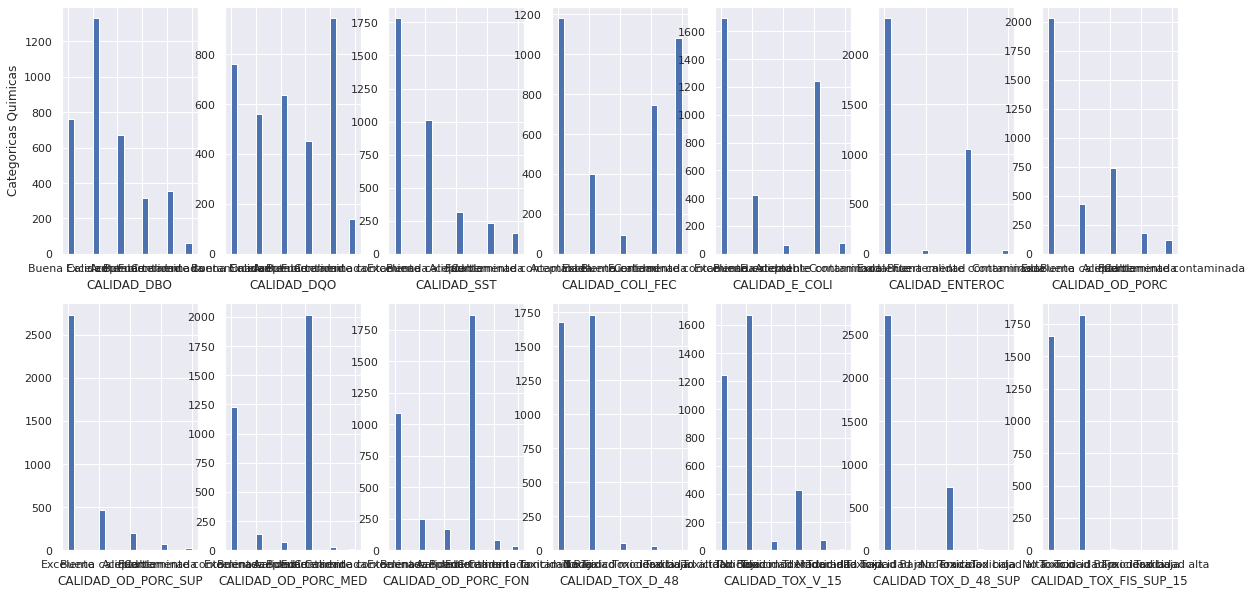

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 7)   
for k in range(0,14):  
  plt.subplot(2,7,k+1) 

  Transf0 = df_limpio_ASuperficiales[CategoriasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(CategoriasQuimicas[k])

 
  if k==0:
    plt.ylabel('Categoricas Quimicas')

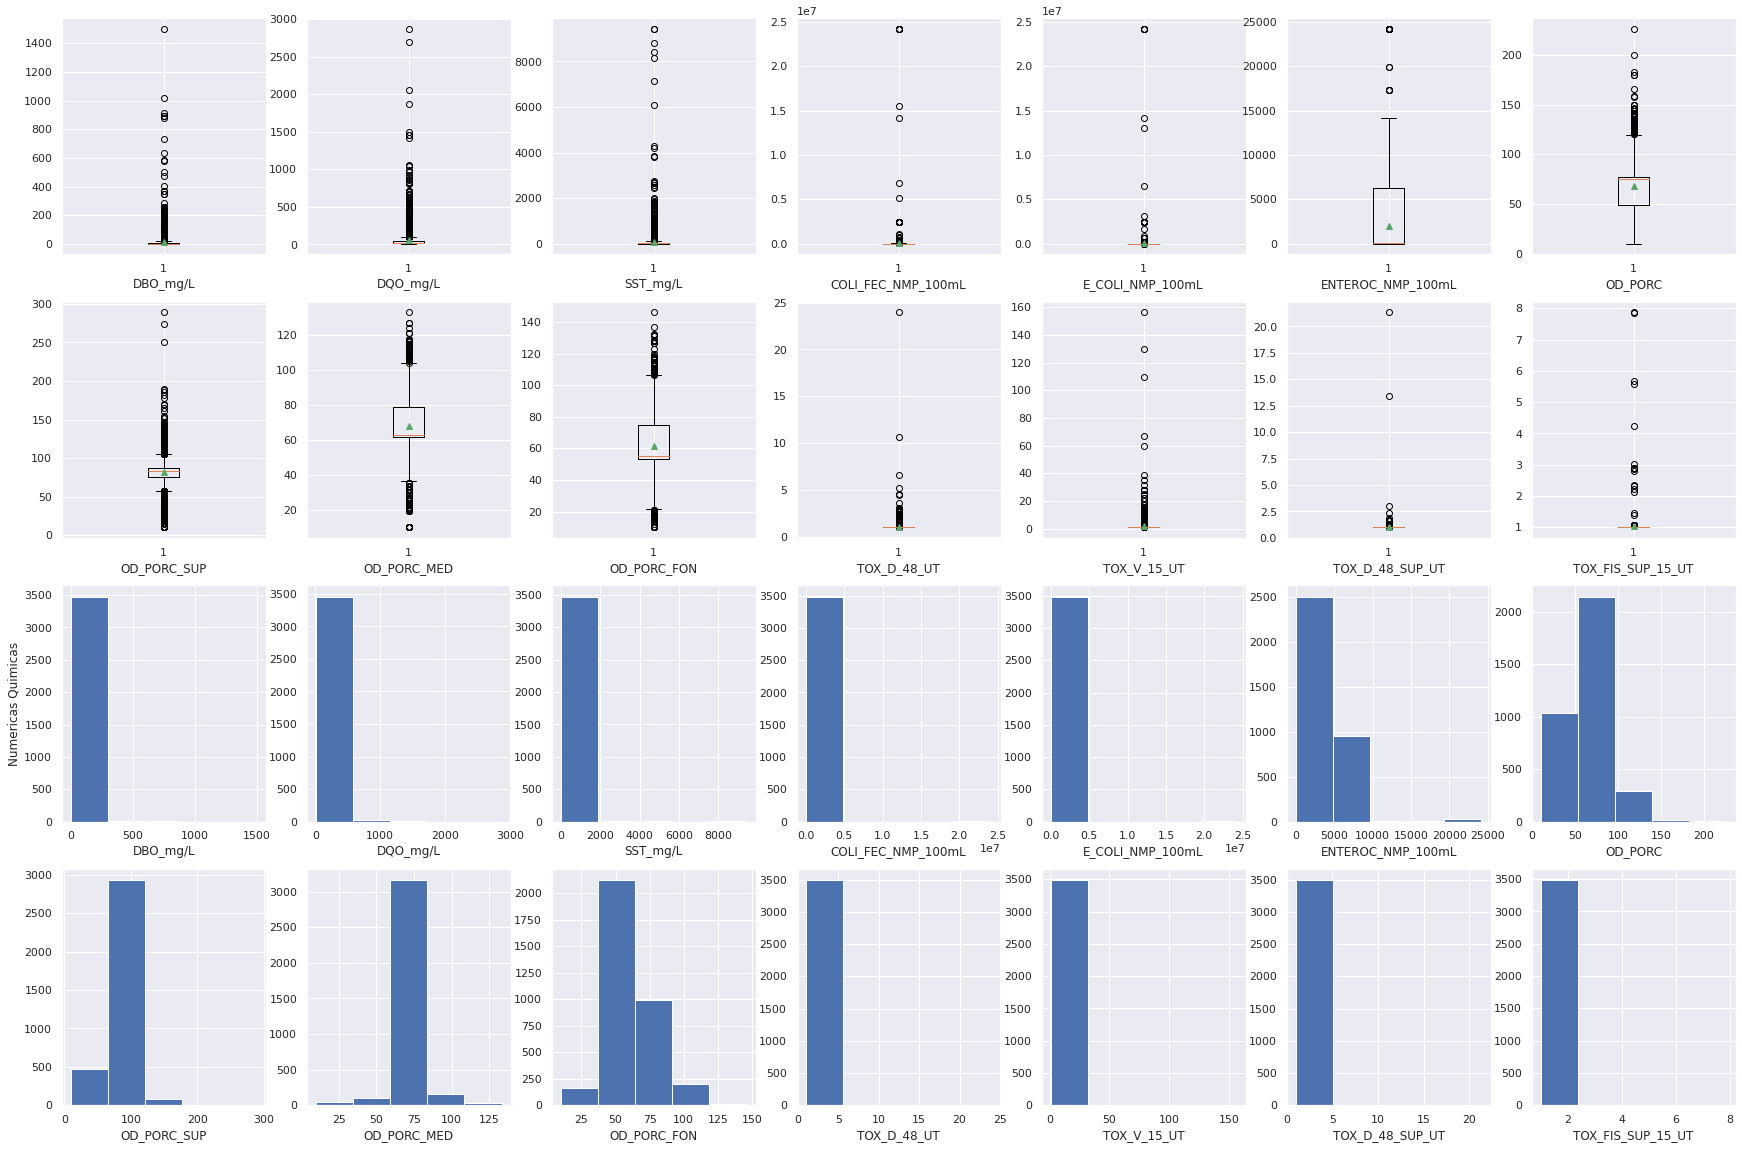

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
fig, axes = plt.subplots(4, 7)   
for k in range(0,14):  
  plt.subplot(4,7,k+1) 

  Transf0 = df_limpio_ASuperficiales[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.boxplot(Transf0, showmeans= True) 
  plt.xlabel(NumericasQuimicas[k])

  plt.subplot(4,7,k+15) 

  Transf0 = df_limpio_ASuperficiales[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=5) 
  plt.xlabel(NumericasQuimicas[k])


  if k==0:
    plt.ylabel('Numericas Quimicas')

Veamos ya con la limpieza de los datos que tanto se correlacionan las variables entre ellas.

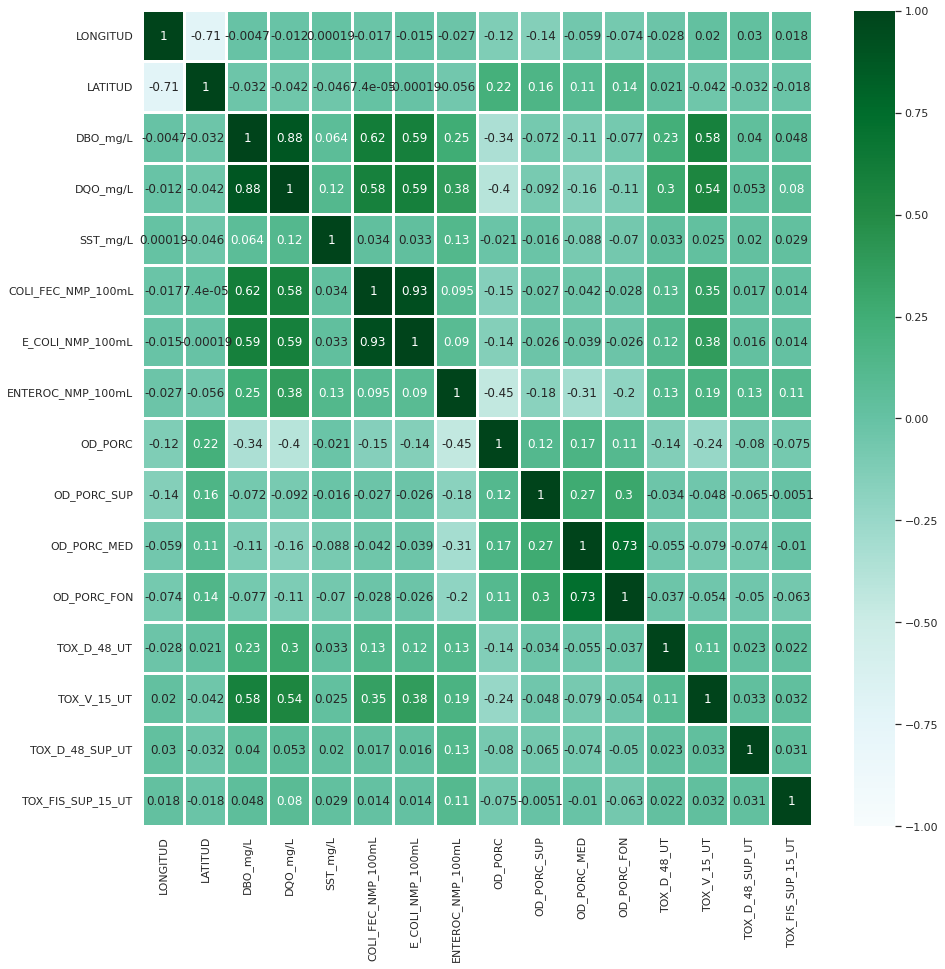

In [ ]:
df_limpio_ASuperficiales.corr()
corrs = df_limpio_ASuperficiales.drop('PERIODO', axis = 'columns').corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',  encoding='latin-1')
df2

CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENTES     AGUASCALIENTES   
2          LERMA SANTIAGO PACIFICO       AGUASCALIENTES              COSIO   
3          LERMA SANTIAGO PACIFICO       AGUASCALIENTES    RINCON DE ROMOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR             LA PAZ   
...                            ...                  ...                ...   
1063                     RIO BRAVO           NUEVO LEON            LINARES   
1064                     RIO BRAVO           NUEVO LEON            LINARES   
1065                     RIO BRAVO           NUEVO LEON  CADEREYTA JIMENEZ   
1066                     RIO BRAVO           NUEVO LEON            GALEANA   
1067                     RIO BRAVO           NUEVO LEON            GALEANA   

                     ACUIFERO SUBTIPO   LONGITUD   LATITUD  PERIODO  ...  \
0          VALLE DE CHICALOTE    POZO -102.02210  22.20887     2020  ...   
1          VALLE DE CHICALOTE    POZO -102.20075  21.99958     2020  ...   
2     VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685     2020  ...   
3     VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435     2020  ...   
4                TODOS SANTOS    POZO -110.24480  23.45138     2020  ...   
...                       ...     ...        ...       ...      ...  ...   
1063            CITRICOLA SUR    POZO  -99.54191  24.76036     2020  ...   
1064            CITRICOLA SUR    POZO  -99.70099  24.78280     2020  ...   
1065          CITRICOLA NORTE    POZO  -99.82249  25.55197     2020  ...   
1066    NAVIDAD-POTOSI-RAICES    POZO -100.32683  24.80118     2020  ...   
1067    NAVIDAD-POTOSI-RAICES    POZO -100.73302  25.09380     2020  ...   

      CUMPLE_CON_DUR CUMPLE_CON_CF  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0                 SI            SI              SI            SI   
1                 SI            SI              SI            SI   
2                 SI            SI              SI            NO   
3                 SI            SI              SI            SI   
4                 SI            SI              NO            SI   
...              ...           ...             ...           ...   
1063              NO            SI              NO            SI   
1064              SI            SI              NO            SI   
1065              NO            SI              NO            SI   
1066              SI            SI              SI            SI   
1067              SI            SI              SI            SI   

      CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0                SI            SI            SI            SI            SI   
1                SI            SI            SI            SI            SI   
2                SI            SI            SI            SI            SI   
3                SI            SI            SI            SI            SI   
4                SI            SI            SI            SI            SI   
...             ...           ...           ...           ...           ...   
1063             SI            SI  

#**Limpieza Aguas Subterraneas**

Para este Dataset sera la misma filosofia, por ende llegaremos a la mismas conclusiones y no habra mas que comentarios muy puntuales de las diferencias.

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',  encoding='latin-1')
df2

CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENTES     AGUASCALIENTES   
2          LERMA SANTIAGO PACIFICO       AGUASCALIENTES              COSIO   
3          LERMA SANTIAGO PACIFICO       AGUASCALIENTES    RINCON DE ROMOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR             LA PAZ   
...                            ...                  ...                ...   
1063                     RIO BRAVO           NUEVO LEON            LINARES   
1064                     RIO BRAVO           NUEVO LEON            LINARES   
1065                     RIO BRAVO           NUEVO LEON  CADEREYTA JIMENEZ   
1066                     RIO BRAVO           NUEVO LEON            GALEANA   
1067                     RIO BRAVO           NUEVO LEON            GALEANA   

                     ACUIFERO SUBTIPO   LONGITUD   LATITUD  PERIODO  ...  \
0          VALLE DE CHICALOTE    POZO -102.02210  22.20887     2020  ...   
1          VALLE DE CHICALOTE    POZO -102.20075  21.99958     2020  ...   
2     VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685     2020  ...   
3     VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435     2020  ...   
4                TODOS SANTOS    POZO -110.24480  23.45138     2020  ...   
...                       ...     ...        ...       ...      ...  ...   
1063            CITRICOLA SUR    POZO  -99.54191  24.76036     2020  ...   
1064            CITRICOLA SUR    POZO  -99.70099  24.78280     2020  ...   
1065          CITRICOLA NORTE    POZO  -99.82249  25.55197     2020  ...   
1066    NAVIDAD-POTOSI-RAICES    POZO -100.32683  24.80118     2020  ...   
1067    NAVIDAD-POTOSI-RAICES    POZO -100.73302  25.09380     2020  ...   

      CUMPLE_CON_DUR CUMPLE_CON_CF  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0                 SI            SI              SI            SI   
1                 SI            SI              SI            SI   
2                 SI            SI              SI            NO   
3                 SI            SI              SI            SI   
4                 SI            SI              NO            SI   
...              ...           ...             ...           ...   
1063              NO            SI              NO            SI   
1064              SI            SI              NO            SI   
1065              NO            SI              NO            SI   
1066              SI            SI              SI            SI   
1067              SI            SI              SI            SI   

      CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0                SI            SI            SI            SI            SI   
1                SI            SI            SI            SI            SI   
2                SI            SI            SI            SI            SI   
3                SI            SI            SI            SI            SI   
4                SI            SI            SI            SI            SI   
...             ...           ...           ...           ...           ...   
1063             SI            SI  

In [ ]:
#En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
df2.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df2.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

##Al analizar el Dataset, podemos notar que el semaforo es nuestra principal fuente de indicacion es el semaforo. Por ende haremos una limpieza siguiendo lo siguiente:



###1. Evaluaremos 3 data sets, uno para cada semaforo y trabajar con sus NaN y faltantes de manera separada.

Primero crearemos una lista de las variables numericas quimicas, aqui procederemos a eliminar datos cadena como '< 2' para poder convertirlos a datos numeros cercanos al valor que indican y ademas procederemos a llenar los valores NaN con la media total del dataset a trabajar, osea que no llenaremos todo el dataset con una media genera, sino que buscaremos aislar cada tipo y aplicarle una media de acuerdo a su color.

In [ ]:
df_verde2 = df2[df2.SEMAFORO == 'Verde'].copy()
df_rojo2 = df2[df2.SEMAFORO == 'Rojo'].copy()
df_amarillo2 = df2[df2.SEMAFORO == 'Amarillo'].copy()


In [ ]:
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]
print(len(NumericasQuimicas2))

15


In [ ]:
#Limpieza Verdes
lista_verde2 = list()
lista_rojo2 = list()
lista_amarillo2 = list()

for name in NumericasQuimicas2:
  df_verde2[name] = df_verde2[name].astype('str')
  df_verde2[name] = df_verde2[name].str.replace('<25','25') 
  df_verde2[name] = df_verde2[name].str.replace('<0.2','0.2') 
  df_verde2[name] = df_verde2[name].str.replace('<20','20') 
  df_verde2[name] = df_verde2[name].str.replace('<1.1','1.1')
  df_verde2[name] = df_verde2[name].str.replace('<0.02','0.02') 
  df_verde2[name] = df_verde2[name].str.replace('<0.01','0.01') 
  df_verde2[name] = df_verde2[name].str.replace('<0.003','0.003')
  df_verde2[name] = df_verde2[name].str.replace('<0.005','0.004') 
  df_verde2[name] = df_verde2[name].str.replace('<0.0005','0.0004') 
  df_verde2[name] = df_verde2[name].str.replace('<0.0015','0.0015') 
  df_verde2[name] = df_verde2[name].str.replace('<0.025','0.025')  
  df_verde2[name]= df_verde2[name].astype('float')
  mean = df_verde2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_verde2[name]= df_verde2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_verde2.append([name, mean])
  

#Limpieza Rojo
for name in NumericasQuimicas2:
  df_rojo2[name] = df_rojo2[name].astype('str')
  df_rojo2[name] = df_rojo2[name].str.replace('<25','25') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.2','0.2') 
  df_rojo2[name] = df_rojo2[name].str.replace('<20','20') 
  df_rojo2[name] = df_rojo2[name].str.replace('<1.1','1.1')
  df_rojo2[name] = df_rojo2[name].str.replace('<0.02','0.02') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.01','0.01') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.003','0.003')
  df_rojo2[name] = df_rojo2[name].str.replace('<0.005','0.004') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.0005','0.0004') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.0015','0.0015') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.025','0.025')  
  df_rojo2[name]= df_rojo2[name].astype('float')
  mean = df_rojo2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_rojo2[name]= df_rojo2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_rojo2.append([name, mean])

#Limpieza Amarillo
for name in NumericasQuimicas2:
  df_amarillo2[name] = df_amarillo2[name].astype('str')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<25','25') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.2','0.2') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<20','20') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<1.1','1.1')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.02','0.02') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.01','0.01') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.003','0.003')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.005','0.004') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.0005','0.0004') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.0015','0.0015') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.025','0.025')   
  df_amarillo2[name]= df_amarillo2[name].astype('float')
  mean = df_amarillo2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_amarillo2[name]= df_amarillo2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_amarillo2.append([name, mean])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWar

### 2. Para este paso haremos una comparacion con las escalas del archivo de tratamientos para aplicarles en base a los nuevos datos rellenados con la media su correcta escala de acuerdo a la tabla.

In [ ]:
dfescala2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Escalas_subterranea.csv',  encoding='latin-1')
dfescala2

CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas  \
0                                           Excelente      
1                                       Buena calidad      
2                                           Aceptable      
3                                         Contaminada      
4                             Fuertemente contaminada      
..                                                ...      
61                       CALIDAD DEL AGUA PARA DUREZA      
62                                    Potable - Suave      
63                      Potable - Moderadamente suave      
64                                     Potable - Dura      
65  Muy dura e indeseable usos industrial y domestico      

                                             CRITERIO  \
0                                COLI_FEC menor a 1.1   
1   COLI_FEC mayor o igual de 1.1 y menor o igual ...   
2        COLI_FEC mayor de 200 y menor o igual a 1000   
3      COLI_FEC mayor de 1000 y menor o igual a 10000   
4                             COLI_FEC mayor de 10000   
..                                                ...   
61                                           CRITERIO   
62                             DUR menor o igual a 60   
63              DUR mayor de 60 y menor o igual a 120   
64             DUR mayor de 120 y menor o igual a 500   
65                                   DUR mayor de 500   

                                          DESCRIPCION  
0   Agua potable. Agua no contaminada o condicion ...  
1   Aguas para uso recreativo con contacto primari...  
2   Aguas con calidad admisible como fuente de aba...  
3   Aguas  con contaminacion bacteriologica. Indic...  
4   Aguas con fuerte contaminacion bacteriologica....  
..                                                ...  
61                                        DESCRIPCION  
62          Agua potable. Bajo contenido de minerales  
63      Agua potable. Moderado contenido de minerales  
64  Agua potable. Alto contenido de minerales, pri...  
65  Agua no apta como fuente de abastecimiento de ...  

[66 rows x 3 columns]

Utilizando el promedio de los datos para rellenar valores, ahora asignaremos la etiqueta correspondiente al valor acorde a las escalas dadas por el dataset

In [ ]:
#DataFrame para valores de verde
escala_verde2 = ['Alta','Buena para riego','NaN','Potable - Dulce','Media','Potable - Dura','Buena calidad',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente']
Verde_df_means2 = pd.DataFrame(lista_verde2, columns = ['Nombre','Valor de la media'])
Verde_df_means2['Escala Nueva'] = escala_verde2
Verde_df_means2

Nombre  Valor de la media         Escala Nueva
0              ALC_mg/L         201.975590                 Alta
1         CONDUCT_mS/cm         676.740139     Buena para riego
2              SDT_mg/L                NaN                  NaN
3            SDT_M_mg/L         459.188794      Potable - Dulce
4        FLUORUROS_mg/L           0.507428                Media
5              DUR_mg/L         214.694874       Potable - Dura
6   COLI_FEC_NMP/100_mL          27.924885        Buena calidad
7            N_NO3_mg/L           2.660065  Potable - Excelente
8           AS_TOT_mg/L           0.010583  Potable - Excelente
9           CD_TOT_mg/L           0.003000  Potable - Excelente
10          CR_TOT_mg/L           0.006640  Potable - Excelente
11          HG_TOT_mg/L           0.000455  Potable - Excelente
12          PB_TOT_mg/L           0.004075  Potable - Excelente
13          MN_TOT_mg/L           0.006466  Potable - Excelente
14          FE_TOT_mg/L           0.069534  Potable - Excelente

In [ ]:
#Data Frame para Rojo
escala_rojo2 = ['Alta','Permisible para riego','NaN','Potable - Dulce','Alta','Potable - Dura','Aceptable',
                 'Potable - Buena calidad','Apta como FAAP','Apta como FAAP','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Sin efectos en la salud - Puede dar color al agua']
Rojo_df_means2 = pd.DataFrame(lista_rojo2, columns = ['Nombre','Valor de la media'])
Rojo_df_means2['Escala Nueva'] = escala_rojo2
Rojo_df_means2

Nombre  Valor de la media  \
0              ALC_mg/L         242.595351   
1         CONDUCT_mS/cm        1251.816104   
2              SDT_mg/L                NaN   
3            SDT_M_mg/L         896.738515   
4        FLUORUROS_mg/L           2.090002   
5              DUR_mg/L         334.629137   
6   COLI_FEC_NMP/100_mL         927.088372   
7            N_NO3_mg/L           7.207844   
8           AS_TOT_mg/L           0.035542   
9           CD_TOT_mg/L           0.003082   
10          CR_TOT_mg/L           0.023205   
11          HG_TOT_mg/L           0.000490   
12          PB_TOT_mg/L           0.004742   
13          MN_TOT_mg/L           0.072734   
14          FE_TOT_mg/L           0.720355   

                                         Escala Nueva  
0                                                Alta  
1                               Permisible para riego  
2                                                 NaN  
3                                     Potable - Dulce  
4                                                Alta  
5                                      Potable - Dura  
6                                           Aceptable  
7                             Potable - Buena calidad  
8                                      Apta como FAAP  
9                                      Apta como FAAP  
10                                Potable - Excelente  
11                                Potable - Excelente  
12                                Potable - Excelente  
13                                Potable - Excelente  
14  Sin efectos en la salud - Puede dar color al agua

In [ ]:
escala_amarillo2 = ['Alta','Permisible para riego','NaN','Ligeramente salobres','Media','Muy dura e indeseable usos industrial y domestico','Buena calidad',
                 'Potable - Buena calidad','Apta como FAAP','Potable - Excelente','No apta como FAAP','Potable - Excelente',
                 'Potable - Excelente','Sin efectos en la salud - Puede dar color al agua','Sin efectos en la salud - Puede dar color al agua']
Amarillo_df_means2 = pd.DataFrame(lista_amarillo2, columns = ['Nombre','Valor de la media'])
Amarillo_df_means2['Escala Nueva'] = escala_amarillo2
Amarillo_df_means2

Nombre  Valor de la media  \
0              ALC_mg/L         283.650425   
1         CONDUCT_mS/cm        1772.129675   
2              SDT_mg/L                NaN   
3            SDT_M_mg/L        1665.915718   
4        FLUORUROS_mg/L           0.484559   
5              DUR_mg/L         602.370717   
6   COLI_FEC_NMP/100_mL          35.470040   
7            N_NO3_mg/L           2.704206   
8           AS_TOT_mg/L           0.010542   
9           CD_TOT_mg/L           0.003000   
10          CR_TOT_mg/L           0.005920   
11          HG_TOT_mg/L           0.000451   
12          PB_TOT_mg/L           0.004044   
13          MN_TOT_mg/L           0.188065   
14          FE_TOT_mg/L           0.523637   

                                         Escala Nueva  
0                                                Alta  
1                               Permisible para riego  
2                                                 NaN  
3                                Ligeramente salobres  
4                                               Media  
5   Muy dura e indeseable usos industrial y domestico  
6                                       Buena calidad  
7                             Potable - Buena calidad  
8                                      Apta como FAAP  
9                                 Potable - Excelente  
10                                  No apta como FAAP  
11                                Potable - Excelente  
12                                Potable - Excelente  
13  Sin efectos en la salud - Puede dar color al agua  
14  Sin efectos en la salud - Puede dar color al agua

###3. Una vez categorizadas las medias de acuerdo a la escala, procederemos a aplicar estas etiquetas en las columnas categoricas que alojan la etiqueta de escala de cada variable quimica.

In [ ]:
CategoriasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']
print(len(CategoriasQuimicas2))

15


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Buena para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Dulce') 
  if name == 'CALIDAD_FLUO':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Media') 
  if name == 'CALIDAD_DUR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Dura') 
  if name == 'CALIDAD_COLI_FEC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Buena calidad') 
  if name == 'CALIDAD_N_NO3':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_AS':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_CD':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_CR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_FE':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  


In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Permisible para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Dulce') 
  if name == 'CALIDAD_FLUO':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Alta') 
  if name == 'CALIDAD_DUR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Dura') 
  if name == 'CALIDAD_COLI_FEC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_N_NO3':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_AS':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CD':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_FE':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua')

In [ ]:
#Limpieza de las categorias de Amarillo
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Permisible para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Ligeramente salobres') 
  if name == 'CALIDAD_FLUO':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Media') 
  if name == 'CALIDAD_DUR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Muy dura e indeseable usos industrial y domestico') 
  if name == 'CALIDAD_COLI_FEC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Buena calidad') 
  if name == 'CALIDAD_N_NO3':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Buena calidad') 
  if name == 'CALIDAD_AS':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CD':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'No apta como FAAP') 
  if name == 'CALIDAD_CR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua') 
  if name == 'CALIDAD_FE':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua')

###4. Despues tenemos unas columnas que nos dicen si un dato cumple o no con cierta certificacion, por ende con la nueva informacion almacenada en las columanas procedemos a etiquetar si los valores cumplen o no con el nuevo valor.

In [ ]:
CategoricasCumplimiento2 = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR',
                            'CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']
print(len(CategoricasCumplimiento2))

15


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_ALC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')   

In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoricasCumplimiento2:
  if name == 'CUMPLE_CON_ALC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de amarillas
for name in CategoricasCumplimiento2:
  if name == 'CUMPLE_CON_ALC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 

###Para finalizar agrupamos los 3 dataset ya limpiados en uno general para trabajar sobre este, ademas de aplicar un shuffle para no tener una orden muy especifico que pudiera sesgar a los modelos.

In [ ]:
from sklearn.utils import shuffle
df_limpio_ASubterraneas = pd.concat([df_verde2, df_rojo2, df_amarillo2]).reset_index(drop=True)
# df_shuffled2 = pd.concat([df_verde2, df_rojo2, df_amarillo2])
# df_limpio_ASubterraneas=df_shuffled2.sample(frac=1).reset_index(drop=True)
df_limpio_ASubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df_limpio_ASubterraneas.head(10)

CLAVE                           SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6                    POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516          POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU9              POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
3   DLBAJ110               POZO 26, SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ117                    LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   
5   DLBAJ119  AGUA AMARGA Y SAN PEDRO MEXICO  PENINSULA DE BAJA CALIFORNIA   
6   DLBAJ122                      EL TRIUNFO  PENINSULA DE BAJA CALIFORNIA   
7   DLBAJ129     SP. A.P. 1, L. 9, COL. SIN.  PENINSULA DE BAJA CALIFORNIA   
8   DLBAJ130            L. 16-17 COL. LAGUNA  PENINSULA DE BAJA CALIFORNIA   
9   DLBAJ148   RANCHO AGUA DULCE, GVO. GLEZ.  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
3  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   
5  BAJA CALIFORNIA SUR           LA PAZ               LOS PLANES    POZO   
6  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   
7  BAJA CALIFORNIA SUR          COMONDU            SANTO DOMINGO    POZO   
8  BAJA CALIFORNIA SUR          COMONDU            SANTO DOMINGO    POZO   
9  BAJA CALIFORNIA SUR           LORETO        SAN JUAN B. LONDO    POZO   

     LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_DUR CUMPLE_CON_CF  \
0 -102.022100  22.208870     2020  ...              SI            SI   
1 -102.200750  21.999580     2020  ...              SI            SI   
2 -102.294490  22.184350     2020  ...              SI            SI   
3 -110.213960  23.474600     2020  ...              SI            SI   
4 -110.088778  23.799861     2020  ...              SI            SI   
5 -109.907091  23.946320     2020  ...              SI            SI   
6 -110.108253  23.807347     2020  ...              SI            SI   
7 -111.720090  25.135490     2020  ...              SI            SI   
8 -111.803800  25.240100     2020  ...              SI            SI   
9 -111.485700  26.227900     2020  ...              SI            SI   

   CUMPLE_CON_NO3 CUMPLE_CON_AS  CUMPLE_CON_CD  CUMPLE_CON_CR CUMPLE_CON_HG  \
0              SI            SI             SI             SI            SI   
1              SI            SI             SI             SI            SI   
2              SI            SI             SI             SI            SI   
3              SI            SI             SI             SI            SI   
4              SI            SI             SI             SI            SI   
5              SI            SI             SI             SI            SI   
6              SI            SI             SI             SI            SI   
7              SI            SI             SI             SI            SI   
8              SI            SI             SI             SI            SI   
9              SI            SI             SI             SI            SI   

  CUMPLE_CON_PB  CUMPLE_CON_MN CUMPLE_CON_FE  
0            SI             SI            SI  
1            SI             SI            SI  
2            SI             SI            SI  
3            SI             SI            SI  
4            SI             SI            SI  
5            SI             SI            SI  
6            SI             SI            SI  
7            SI             SI            SI  
8            SI             SI            SI  
9            SI             SI            SI  

[10 rows x 57 columns]

In [ ]:
df_limpio_ASubterraneas.drop(['CONTAMINANTES', 'SDT_mg/L'], axis = 'columns', inplace = True)
df_limpio_ASubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

###Quitaremos del Dataset las columnas de CONTAMINANTES, ya que es una columna muy redundante y no aporta mucho valor a futuros analisis y ademas las columnsa SDT_mg/L  ya que sus valores estan vacios en todas las casillas

###Analizemos las medidas de tendencia Central

In [ ]:
#volvemos a cargar las variables sin las columnas ya eliminadas
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

CategoriasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

In [ ]:
print(len(NumericasQuimicas2), len(CategoriasQuimicas2))

14 15


In [ ]:
df_limpio_ASubterraneas[NumericasQuimicas2].describe()

ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.583766    1138.458879    896.822963        1.075600   347.813313   
std     116.664494    1242.459195   2749.051551        1.924278   359.523990   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.527500     815.000000    551.400000        0.503500   245.175900   
75%     292.423750    1322.250000    917.000000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.318205     0.019618     0.003030   
std            2052.457014     8.341377     0.035209     0.000894   
min               1.100000     0.020000     0.010000     0.003000   
25%               1.100000     0.650932     0.010000     0.003000   
50%               1.100000     2.082916     0.010000     0.003000   
75%              13.250000     5.200047     0.010000     0.003000   
max           24196.000000   121.007813     0.452200     0.032110   

       CR_TOT_mg/L  HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
count  1068.000000  1068.000000  1068.000000  1068.000000  1068.000000  
mean      0.012476     0.000467     0.004310     0.072478     0.410387  
std       0.154435     0.000479     0.003342     0.376512     5.537974  
min       0.004000     0.000400     0.004000     0.001500     0.025000  
25%       0.004000     0.000400     0.004000     0.001500     0.025000  
50%       0.004000     0.000400     0.004000     0.001500     0.046960  
75%       0.004000     0.000400     0.004000     0.009947     0.173380  
max       5.003200     0.014150     0.080900     8.982000   178.615000

###Grafiquemos para ver outliers y distribucion de datos en variables categoricas y numericas

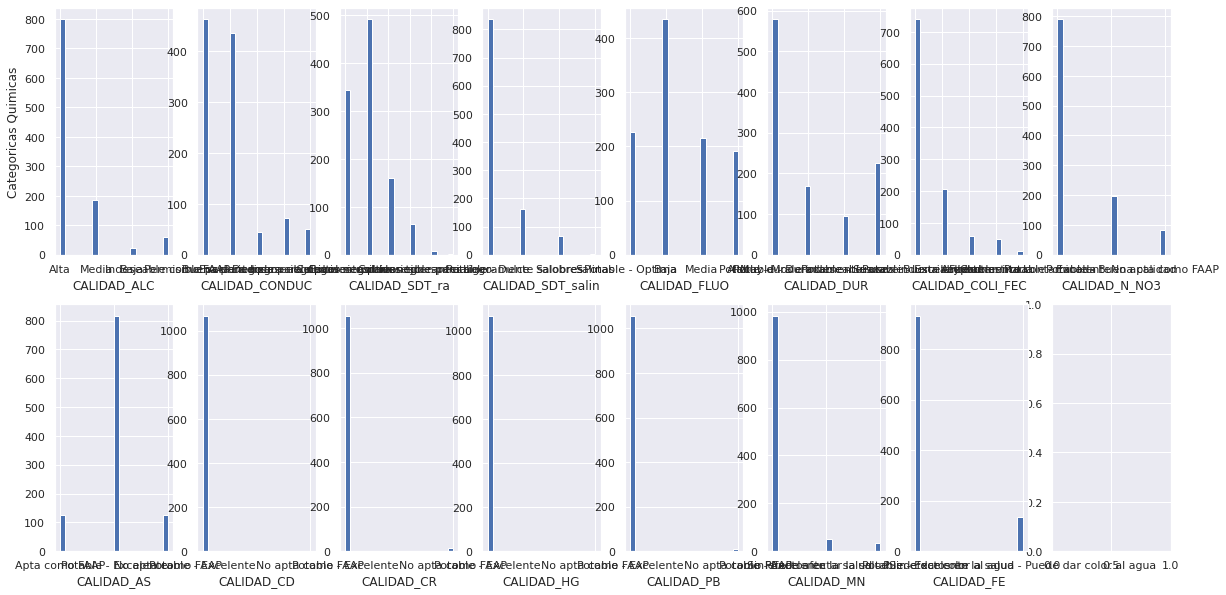

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 8)   
for k in range(0,15):  
  plt.subplot(2,8,k+1) 

  Transf0 = df_limpio_ASubterraneas[CategoriasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(CategoriasQuimicas2[k])

 
  if k==0:
    plt.ylabel('Categoricas Quimicas')

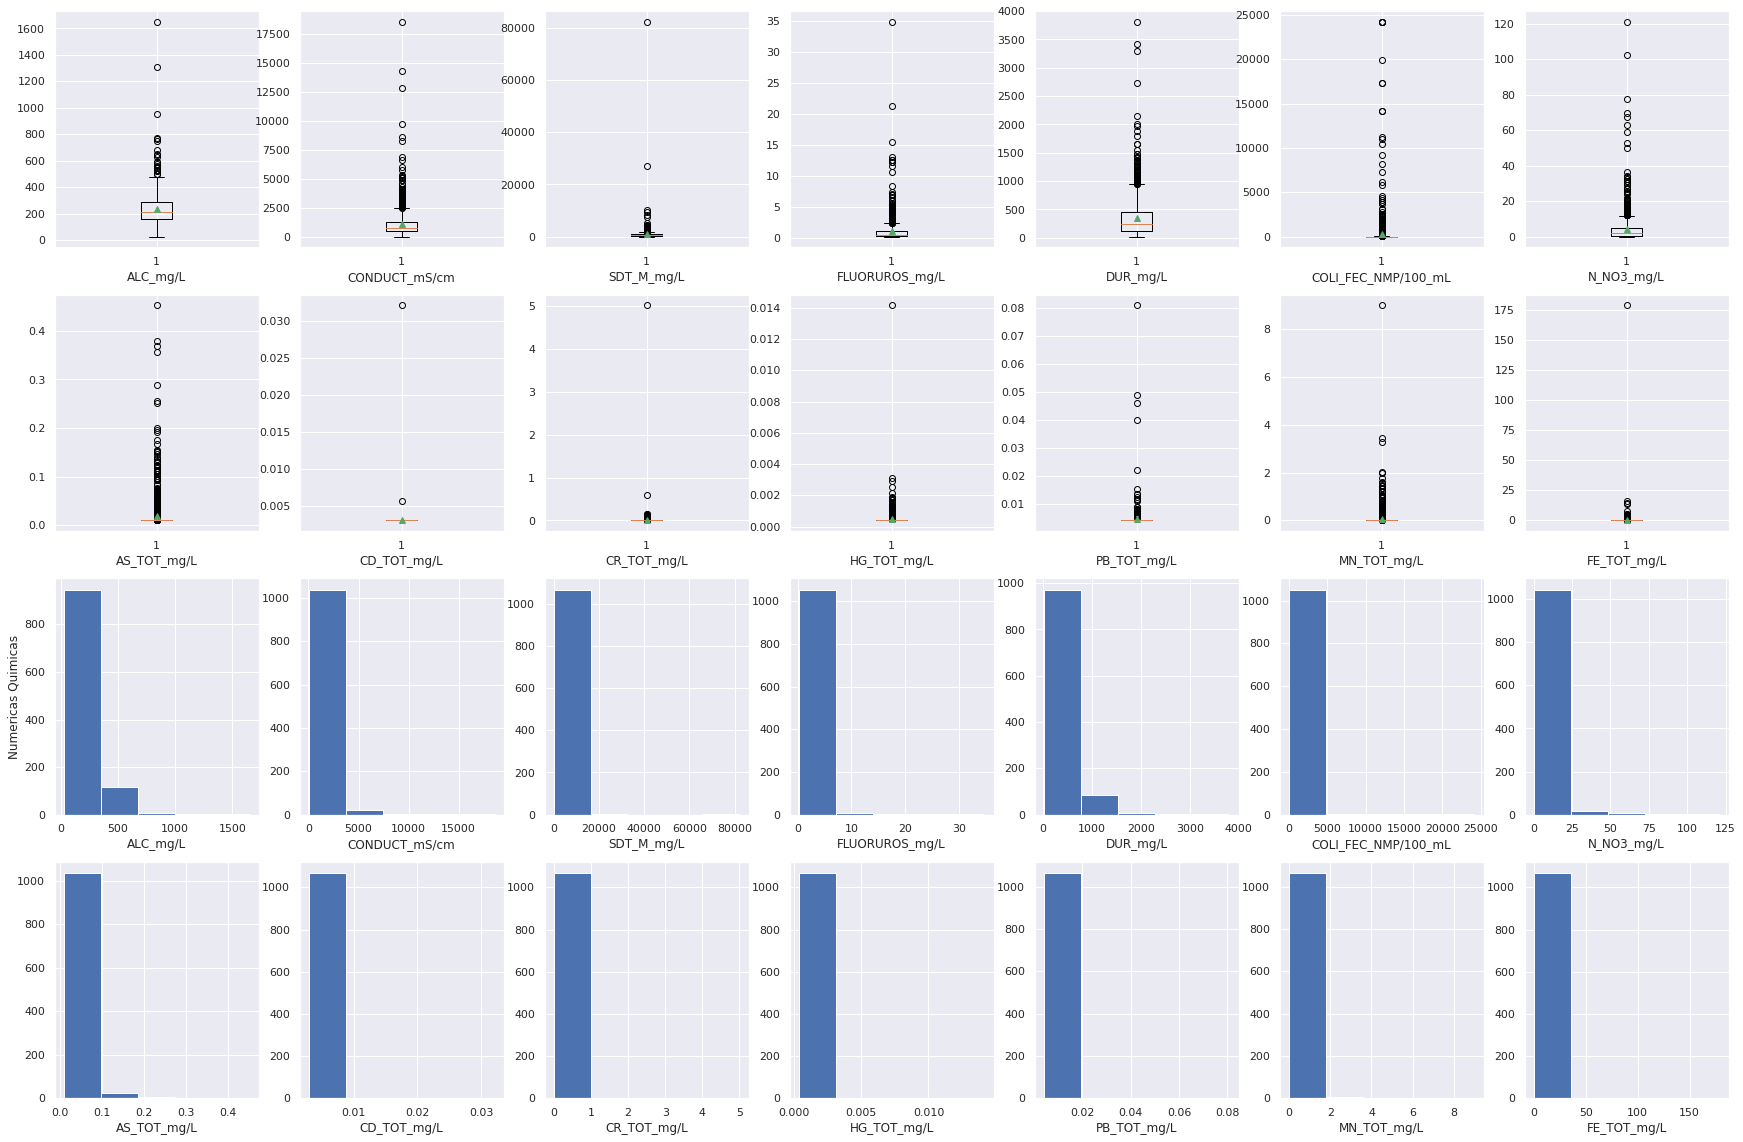

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
fig, axes = plt.subplots(4, 7)   
for k in range(0,14):  
  plt.subplot(4,7,k+1) 

  Transf0 = df_limpio_ASubterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.boxplot(Transf0, showmeans= True) 
  plt.xlabel(NumericasQuimicas2[k])

  plt.subplot(4,7,k+15) 

  Transf0 = df_limpio_ASubterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=5) 
  plt.xlabel(NumericasQuimicas2[k])


  if k==0:
    plt.ylabel('Numericas Quimicas')

Veamos ya con la limpieza de los datos que tanto se correlacionan las variables entre ellas.

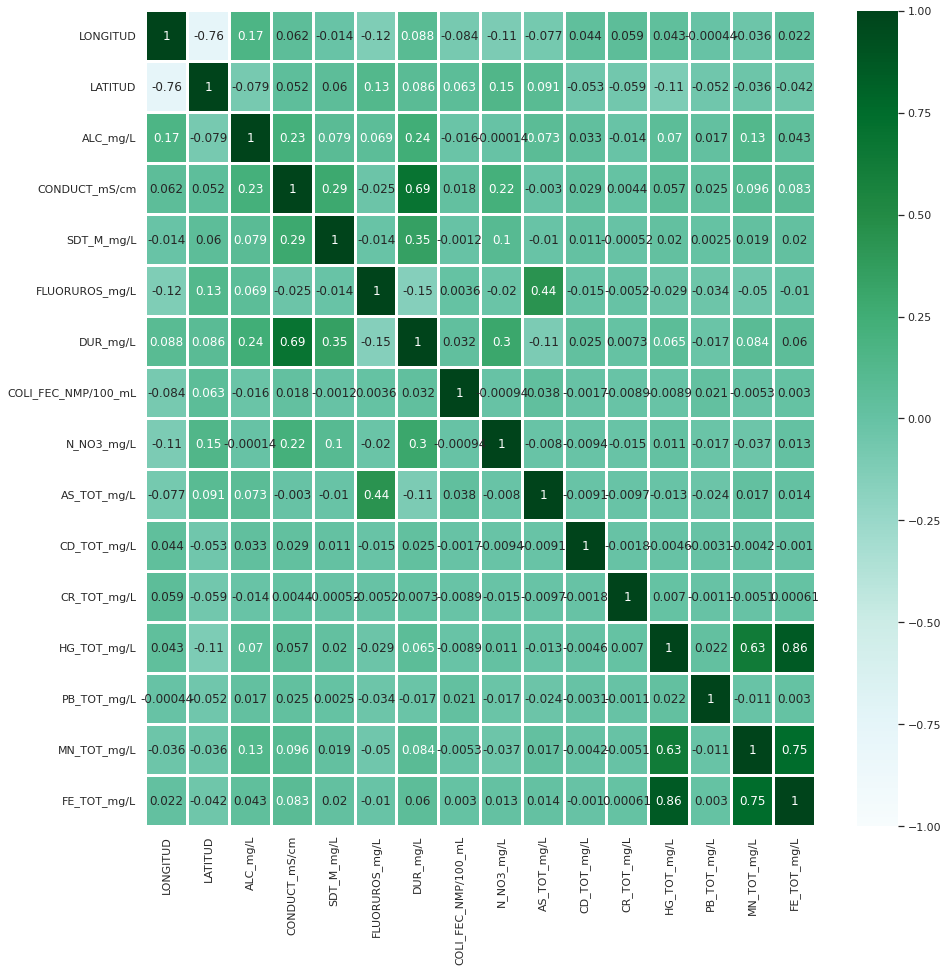

In [ ]:
df_limpio_ASubterraneas.corr()
corrs = df_limpio_ASubterraneas.drop('PERIODO', axis = 'columns').corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

#Kmeans

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 10.3 MB/s 
     |████████████████████████████████| 1.0 MB 49.7 MB/s 
     |████████████████████████████████| 1.7 MB 52.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=341e4b0b52dde8424908616f4384ad966055a3e0a7a937104318574702c8eb20
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5af5dfc8416dc534a72db5ca7769f6e3003fd62812effa2a2040843d18d96896
  Stored in directory: /root/

In [ ]:
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


from statistics import mode 

##Kmeans para Aguas Superficiales

## La idea de este ejercicio es tratar de enocntrar una relacion entre los clusters que se generan buscar una relacion entre la localizacion de los mismos y la contaminacion que pudiera estar mas presente en esa area.



### 1. Por ende se hara un tratamiento de los datos, donde generaremos primeramente los puntos geograficos 

In [ ]:
df_limpio_ASuperficiales.head(5)

CLAVE                       SITIO           ORGANISMO_DE_CUENCA  \
1  DLBAJ100  LOS CABOS SEG 22, 2 ISA10B  PENINSULA DE BAJA CALIFORNIA   
2  DLBAJ101  LOS CABOS SEG 22, 1 ISA10B  PENINSULA DE BAJA CALIFORNIA   
3  DLBAJ102                 LOS CABOS 3  PENINSULA DE BAJA CALIFORNIA   
4  DLBAJ103                 LOS CABOS 1  PENINSULA DE BAJA CALIFORNIA   
5  DLBAJ104        BAHIA CABO SAN LUCAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO  MUNICIPIO             CUENCA   CUERPO DE AGUA  \
1  BAJA CALIFORNIA SUR  LOS CABOS  SAN JOSE DEL CABO  OCEANO PACIFICO   
2  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  OCEANO PACIFICO   
3  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
4  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
5  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   

      TIPO     SUBTIPO   LONGITUD  ...  SEMAFORO  CUMPLE_CON_DBO  \
1  COSTERO  OCEANO-MAR -109.84290  ...     Verde              SI   
2  COSTERO  OCEANO-MAR -109.86442  ...     Verde              SI   
3  COSTERO       BAHIA -109.88604  ...     Verde              SI   
4  COSTERO       BAHIA -109.89657  ...     Verde              SI   
5  COSTERO       BAHIA -109.90250  ...     Verde              SI   

   CUMPLE_CON_DQO CUMPLE_CON_SST  CUMPLE_CON_CF CUMPLE_CON_E_COLI  \
1              SI             SI             SI                SI   
2              SI             SI             SI                SI   
3              SI             SI             SI                SI   
4              SI             SI             SI                SI   
5              SI             SI             SI                SI   

   CUMPLE_CON_ENTEROC CUMPLE_CON_OD  CUMPLE_CON_TOX    GRUPO  
1                  SI            SI              SI  COSTERO  
2                  SI            SI              SI  COSTERO  
3                  SI            SI              SI  COSTERO  
4                  SI            SI              SI  COSTERO  
5                  SI            SI              SI  COSTERO  

[5 rows x 50 columns]

In [ ]:
df_limpio_ASuperficiales["SEMAFORO"]

1          Verde
2          Verde
3          Verde
4          Verde
5          Verde
          ...   
3484    Amarillo
3485    Amarillo
3488    Amarillo
3491    Amarillo
3492    Amarillo
Name: SEMAFORO, Length: 3493, dtype: object

In [ ]:
lbe = LabelEncoder()
df_limpio_ASuperficiales["SEMAFORO_Type"]= lbe.fit_transform(df_limpio_ASuperficiales["SEMAFORO"])
df_limpio_ASuperficiales["SEMAFORO_Type"].unique()


array([2, 1, 0])

In [ ]:
df_limpio_ASuperficiales[['SEMAFORO','SEMAFORO_Type']]

SEMAFORO  SEMAFORO_Type
1        Verde              2
2        Verde              2
3        Verde              2
4        Verde              2
5        Verde              2
...        ...            ...
3484  Amarillo              0
3485  Amarillo              0
3488  Amarillo              0
3491  Amarillo              0
3492  Amarillo              0

[3493 rows x 2 columns]

In [ ]:
df_limpio_ASuperficiales["Coordinates"] = list(zip(df_limpio_ASuperficiales.LONGITUD, df_limpio_ASuperficiales.LATITUD))
df_limpio_ASuperficiales["Coordinates"] = df_limpio_ASuperficiales["Coordinates"].apply(Point)
df_limpio_ASuperficiales.head()

CLAVE                       SITIO           ORGANISMO_DE_CUENCA  \
1  DLBAJ100  LOS CABOS SEG 22, 2 ISA10B  PENINSULA DE BAJA CALIFORNIA   
2  DLBAJ101  LOS CABOS SEG 22, 1 ISA10B  PENINSULA DE BAJA CALIFORNIA   
3  DLBAJ102                 LOS CABOS 3  PENINSULA DE BAJA CALIFORNIA   
4  DLBAJ103                 LOS CABOS 1  PENINSULA DE BAJA CALIFORNIA   
5  DLBAJ104        BAHIA CABO SAN LUCAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO  MUNICIPIO             CUENCA   CUERPO DE AGUA  \
1  BAJA CALIFORNIA SUR  LOS CABOS  SAN JOSE DEL CABO  OCEANO PACIFICO   
2  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  OCEANO PACIFICO   
3  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
4  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
5  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   

      TIPO     SUBTIPO   LONGITUD  ...  CUMPLE_CON_DQO  CUMPLE_CON_SST  \
1  COSTERO  OCEANO-MAR -109.84290  ...              SI              SI   
2  COSTERO  OCEANO-MAR -109.86442  ...              SI              SI   
3  COSTERO       BAHIA -109.88604  ...              SI              SI   
4  COSTERO       BAHIA -109.89657  ...              SI              SI   
5  COSTERO       BAHIA -109.90250  ...              SI              SI   

   CUMPLE_CON_CF CUMPLE_CON_E_COLI  CUMPLE_CON_ENTEROC CUMPLE_CON_OD  \
1             SI                SI                  SI            SI   
2             SI                SI                  SI            SI   
3             SI                SI                  SI            SI   
4             SI                SI                  SI            SI   
5             SI                SI                  SI            SI   

   CUMPLE_CON_TOX    GRUPO  SEMAFORO_Type                  Coordinates  
1              SI  COSTERO              2   POINT (-109.8429 22.90473)  
2              SI  COSTERO              2   POINT (-109.86442 22.8988)  
3              SI  COSTERO              2  POINT (-109.88604 22.89609)  
4              SI  COSTERO              2  POINT (-109.89657 22.87694)  
5              SI  COSTERO              2      POINT (-109.9025 22.88)  

[5 rows x 52 columns]

In [ ]:
gdf_Superficiales = gpd.GeoDataFrame(df_limpio_ASuperficiales, geometry="Coordinates")
gdf_Superficiales.head()

CLAVE                       SITIO           ORGANISMO_DE_CUENCA  \
1  DLBAJ100  LOS CABOS SEG 22, 2 ISA10B  PENINSULA DE BAJA CALIFORNIA   
2  DLBAJ101  LOS CABOS SEG 22, 1 ISA10B  PENINSULA DE BAJA CALIFORNIA   
3  DLBAJ102                 LOS CABOS 3  PENINSULA DE BAJA CALIFORNIA   
4  DLBAJ103                 LOS CABOS 1  PENINSULA DE BAJA CALIFORNIA   
5  DLBAJ104        BAHIA CABO SAN LUCAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO  MUNICIPIO             CUENCA   CUERPO DE AGUA  \
1  BAJA CALIFORNIA SUR  LOS CABOS  SAN JOSE DEL CABO  OCEANO PACIFICO   
2  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  OCEANO PACIFICO   
3  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
4  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
5  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   

      TIPO     SUBTIPO   LONGITUD  ...  CUMPLE_CON_DQO  CUMPLE_CON_SST  \
1  COSTERO  OCEANO-MAR -109.84290  ...              SI              SI   
2  COSTERO  OCEANO-MAR -109.86442  ...              SI              SI   
3  COSTERO       BAHIA -109.88604  ...              SI              SI   
4  COSTERO       BAHIA -109.89657  ...              SI              SI   
5  COSTERO       BAHIA -109.90250  ...              SI              SI   

   CUMPLE_CON_CF CUMPLE_CON_E_COLI  CUMPLE_CON_ENTEROC CUMPLE_CON_OD  \
1             SI                SI                  SI            SI   
2             SI                SI                  SI            SI   
3             SI                SI                  SI            SI   
4             SI                SI                  SI            SI   
5             SI                SI                  SI            SI   

   CUMPLE_CON_TOX    GRUPO  SEMAFORO_Type                  Coordinates  
1              SI  COSTERO              2  POINT (-109.84290 22.90473)  
2              SI  COSTERO              2  POINT (-109.86442 22.89880)  
3              SI  COSTERO              2  POINT (-109.88604 22.89609)  
4              SI  COSTERO              2  POINT (-109.89657 22.87694)  
5              SI  COSTERO              2  POINT (-109.90250 22.88000)  

[5 rows x 52 columns]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

####2. Generamos un mapa general de Mexico para representar todas las aguas superficiales de manera general.

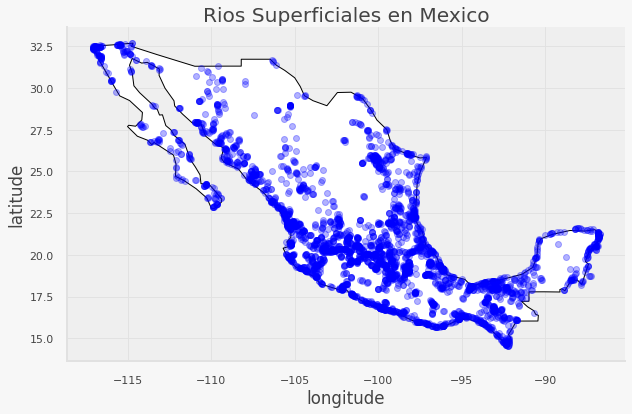

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_Superficiales.plot(ax=gax, color='Blue', alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
X_Superficial = df_limpio_ASuperficiales[["LATITUD","LONGITUD"]]
X_Superficial

LATITUD   LONGITUD
1     22.90473 -109.84290
2     22.89880 -109.86442
3     22.89609 -109.88604
4     22.87694 -109.89657
5     22.88000 -109.90250
...        ...        ...
3484  26.45120  -99.15277
3485  26.55448  -99.17006
3488  26.78971  -99.42142
3491  27.49631  -99.52221
3492  27.51697  -99.52572

[3493 rows x 2 columns]

In [ ]:
y_Superficial = df_limpio_ASuperficiales[["SEMAFORO_Type"]]
y_Superficial

SEMAFORO_Type
1                 2
2                 2
3                 2
4                 2
5                 2
...             ...
3484              0
3485              0
3488              0
3491              0
3492              0

[3493 rows x 1 columns]

###3. En este punto empezaremos a tabajar con KMeans. haremos una validacion por medio de la libreria yellowbrick para obtenet el punto codo optimo de acuerdo a un rango de cluster a evaluar.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

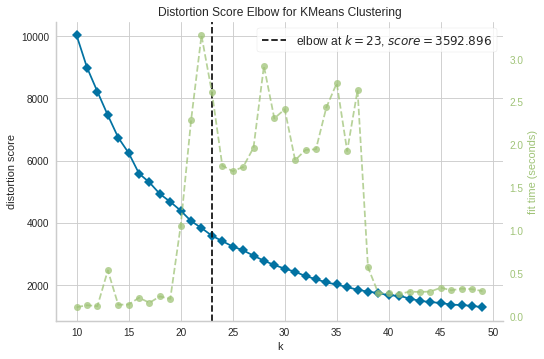

In [ ]:
X_Sl = list(zip(df_limpio_ASuperficiales.LONGITUD, df_limpio_ASuperficiales.LATITUD))
blob_centers = X_Sl
X_cluster = X_Superficial.copy()
y_cluster = y_Superficial.copy()
X_cluster, y_cluster = make_blobs(n_samples=3493, centers = blob_centers, cluster_std = 0.20, random_state=42)

model = KElbowVisualizer(KMeans(), k=(10,50))
model.fit(X_Superficial)
model.show()

### 4. Aqui buscaremos obtener un dataframe no solo con los puntos geograficos de cada cluster, sino que tambien haremos una asignacion de numero de cluster a cada punto obtenido.

In [ ]:
kmeans = KMeans(n_clusters=model.elbow_value_, random_state=42).fit(X_Superficial, y_Superficial)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X_Superficial)
yhat = pd.DataFrame(labels).value_counts()
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[1], C_DF[0]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_superficiales = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_superficiales ["Numero de cluster"] = " "
gdf_C_superficiales ["Puntos asignados al Cluster"] = " "

for cluster_number in labels:
   gdf_C_superficiales["Numero de cluster"][cluster_number]= cluster_number
   gdf_C_superficiales ["Puntos asignados al Cluster"][cluster_number] = yhat[cluster_number]

gdf_C_superficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0           1                  Coordinates Numero de cluster  \
0   16.894035  -99.511423   POINT (-99.51142 16.89404)                 0   
1   28.243391 -109.985107  POINT (-109.98511 28.24339)                 1   
2   18.607404  -91.070582   POINT (-91.07058 18.60740)                 2   
3   20.295612 -101.061661  POINT (-101.06166 20.29561)                 3   
4   24.671152 -104.739937  POINT (-104.73994 24.67115)                 4   
5   32.041546 -115.968500  POINT (-115.96850 32.04155)                 5   
6   25.405540  -99.333057   POINT (-99.33306 25.40554)                 6   
7   16.242839  -96.230580   POINT (-96.23058 16.24284)                 7   
8   20.370117  -87.543073   POINT (-87.54307 20.37012)                 8   
9   20.970392 -102.964630  POINT (-102.96463 20.97039)                 9   
10  19.285281  -98.997921   POINT (-98.99792 19.28528)                10   
11  22.144705  -98.419859   POINT (-98.41986 22.14470)                11   
12  15.943274  -92.903975   POINT (-92.90397 15.94327)                12   
13  23.744402 -110.247810  POINT (-110.24781 23.74440)                13   
14  25.297468 -108.016881  POINT (-108.01688 25.29747)                14   
15  21.967597 -105.396842  POINT (-105.39684 21.96760)                15   
16  27.929288 -100.835061  POINT (-100.83506 27.92929)                16   
17  17.950401 -101.767338  POINT (-101.76734 17.95040)                17   
18  19.259856  -96.693905   POINT (-96.69391 19.25986)                18   
19  29.163153 -105.667732  POINT (-105.66773 29.16315)                19   
20  18.007033  -93.532775   POINT (-93.53278 18.00703)                20   
21  26.955628 -112.578254  POINT (-112.57825 26.95563)                21   
22  19.398917 -104.234051  POINT (-104.23405 19.39892)                22   

   Puntos asignados al Cluster  
0                          150  
1                          107  
2                           90  
3                          275  
4                           76  
5                          121  
6                          181  
7                          160  
8                          132  
9                          195  
10                         358  
11                         218  
12                         186  
13                          49  
14                         138  
15                         190  
16                          46  
17                          99  
18                         246  
19                          32  
20                         209  
21                          53  
22                         182

Aqui estamos revisando que realmente no estamos prediciendo que color de semaforo se asignaria a un cluster en especifico ni mucho menos, solo que vamos a realizar un acomo geografico a cada cluster

In [ ]:
yhat = pd.DataFrame(labels).value_counts()
yhat

10    358
3     275
18    246
11    218
20    209
9     195
15    190
12    186
22    182
6     181
7     160
0     150
14    138
8     132
5     121
1     107
17     99
2      90
4      76
21     53
13     49
16     46
19     32
dtype: int64

Aqui generamos un dataframe para asignar un valor de cluster a cada punto y ademas tomar el valor de semaforo correspondiente tambien a cada punto.

In [ ]:
DF_Cluster_Superficial = X_Superficial.copy()
DF_Cluster_Superficial ["ClusterAsignado"] = labels
DF_Cluster_Superficial["Semaforo"] = df_limpio_ASuperficiales["SEMAFORO_Type"].values
DF_Cluster_Superficial


LATITUD   LONGITUD  ClusterAsignado  Semaforo
1     22.90473 -109.84290               13         2
2     22.89880 -109.86442               13         2
3     22.89609 -109.88604               13         2
4     22.87694 -109.89657               13         2
5     22.88000 -109.90250               13         2
...        ...        ...              ...       ...
3484  26.45120  -99.15277                6         0
3485  26.55448  -99.17006                6         0
3488  26.78971  -99.42142                6         0
3491  27.49631  -99.52221               16         0
3492  27.51697  -99.52572               16         0

[3493 rows x 4 columns]

Aqui vamos a sacar la moda de cada conjunto de cluster, para con ello obtener valores que mas se repitan por cluster y con ello ver segun la particion de clusters tener un claro panorama de la contaminacion presente por area.

In [ ]:
DF_Cluster_Superficial[DF_Cluster_Superficial.ClusterAsignado == 22]

LATITUD   LONGITUD  ClusterAsignado  Semaforo
220   19.39268 -103.81945               22         2
232   19.40773 -103.65246               22         2
240   18.74973 -103.80032               22         2
254   19.25073 -104.53696               22         2
257   19.10450 -104.39872               22         2
...        ...        ...              ...       ...
2691  19.50753 -103.41239               22         0
2693  19.67758 -103.24650               22         0
2694  19.67851 -103.30197               22         0
2695  19.69570 -103.23077               22         0
2699  19.76959 -103.48205               22         0

[182 rows x 4 columns]

In [ ]:
modas_PorCluster = []

for value in gdf_C_superficiales['Numero de cluster']:
  c = pd.DataFrame()
  c = DF_Cluster_Superficial[DF_Cluster_Superficial.ClusterAsignado == value].copy()
  moda = c['Semaforo'].mode()[0]
  modas_PorCluster.append(moda)

modas_PorCluster

[0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0]

In [ ]:
df_limpio_ASuperficiales[["SEMAFORO","SEMAFORO_Type"]]

SEMAFORO  SEMAFORO_Type
1        Verde              2
2        Verde              2
3        Verde              2
4        Verde              2
5        Verde              2
...        ...            ...
3484  Amarillo              0
3485  Amarillo              0
3488  Amarillo              0
3491  Amarillo              0
3492  Amarillo              0

[3493 rows x 2 columns]

Segun el valor asignado por el Label encoder es el valor a tomar de la cluster por moda.

**Verde = 2**

**Amarillo = 0**

**Rojo = 1**

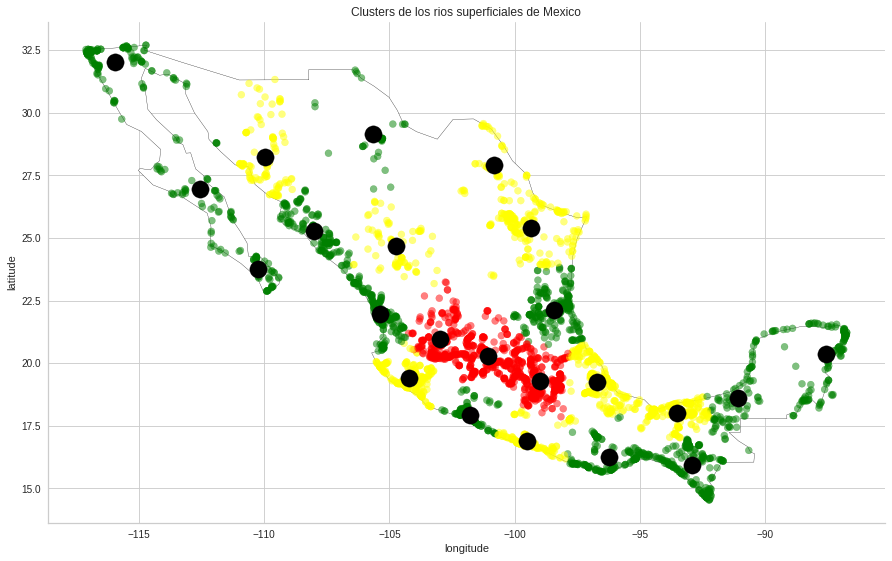

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))

colores = []

color_asig = []

for color in modas_PorCluster:
  if color == 0:
    colores.append('yellow')
  if color == 1:
    colores.append('red')
  if color == 2:
    colores.append('green')

for row in labels:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de los rios superficiales de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

**Podemos notar como el mapa hizo una distribucion de los clusters buscando las modas por cada particion y con ello eligiendo que tipo de contaminacion se presenta mas por zonas.**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


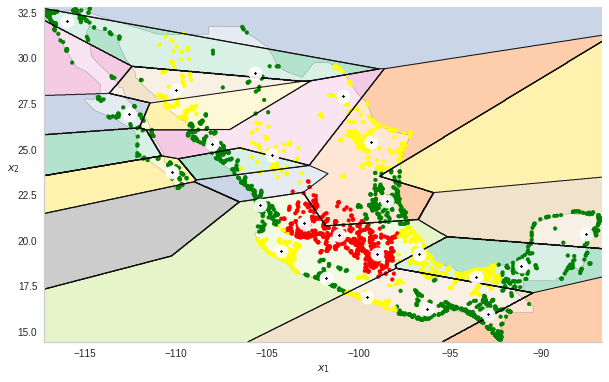

In [ ]:
def plot_data(X, moda, label):
    colores = []

    color_asig = []

    for color in moda:
      if color == 0:
        colores.append('yellow')
      if color == 1:
        colores.append('red')
      if color == 2:
        colores.append('green')

    for row in label:
       color_asig.append(colores[row])

    X["Coordinates"] = list(zip(X.LONGITUD, X.LATITUD))
    X["Coordinates"] = X["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(X, geometry="Coordinates")
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white',alpha=0.5)

    gdf.plot(ax=gax, color=color_asig, alpha = 1, markersize = 15)
    #gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)
    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, modas, label, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z
    
    plt.contourf(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                cmap="Pastel2")
    plot_data(X, modas, label)
    plt.contour(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                linewidths=1, colors='k')
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


fig, gax = plt.subplots(figsize=(10,10))
plot_decision_boundaries(kmeans, X_Superficial, modas = modas_PorCluster, label = labels)
plt.show()

###Mapa del comportamiento general por puntos

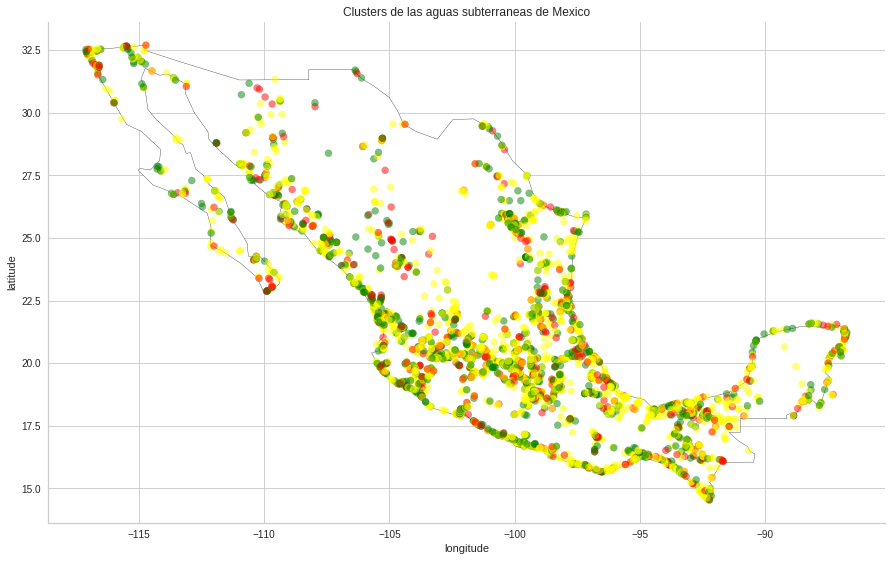

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster, y_cluster)
centroids = kmeans.cluster_centers_
labels3 = kmeans.predict(X_cluster)
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_superficiales3 = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_superficiales3


fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','red','yellow']

color_asig = []

for row in labels3:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5,)
#gdf_C_superficiales3.plot(ax=gax, color='black', alpha = 1, markersize = 300, label = "Centroid")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de las aguas subterraneas de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

###Conclusion

En conclusion podemos notar que la zona centra o bajio de Mexico es donde se ve la mayor contaminacion de los mantos superficiales del agua, asi como zonas urbanizadas o de puertos por altos flujos maritimos del area. Muchas cuestiones pueden concluirse al ver el mapa.

##Kmeans para Aguas Subterraneas

**Para esta parte se seguira la misma logica que el pasado, por ende no habra comentarios mas que muy puntuales**

In [ ]:
df_limpio_ASubterraneas.head(5)

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
3   DLBAJ110       POZO 26, SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ117            LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
3  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   

     LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_DUR CUMPLE_CON_CF  \
0 -102.022100  22.208870     2020  ...              SI            SI   
1 -102.200750  21.999580     2020  ...              SI            SI   
2 -102.294490  22.184350     2020  ...              SI            SI   
3 -110.213960  23.474600     2020  ...              SI            SI   
4 -110.088778  23.799861     2020  ...              SI            SI   

   CUMPLE_CON_NO3 CUMPLE_CON_AS  CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG  \
0              SI            SI             SI            SI            SI   
1              SI            SI             SI            SI            SI   
2              SI            SI             SI            SI            SI   
3              SI            SI             SI            SI            SI   
4              SI            SI             SI            SI            SI   

   CUMPLE_CON_PB CUMPLE_CON_MN  CUMPLE_CON_FE  
0             SI            SI             SI  
1             SI            SI             SI  
2             SI            SI             SI  
3             SI            SI             SI  
4             SI            SI             SI  

[5 rows x 55 columns]

In [ ]:
lbe = LabelEncoder()
df_limpio_ASubterraneas["SEMAFORO_Type"]= lbe.fit_transform(df_limpio_ASubterraneas["SEMAFORO"])
df_limpio_ASubterraneas["SEMAFORO_Type"].unique()


array([2, 1, 0])

In [ ]:
df_limpio_ASubterraneas[['SEMAFORO','SEMAFORO_Type']]

SEMAFORO  SEMAFORO_Type
0        Verde              2
1        Verde              2
2        Verde              2
3        Verde              2
4        Verde              2
...        ...            ...
1063  Amarillo              0
1064  Amarillo              0
1065  Amarillo              0
1066  Amarillo              0
1067  Amarillo              0

[1068 rows x 2 columns]

In [ ]:
df_limpio_ASubterraneas["Coordinates"] = list(zip(df_limpio_ASubterraneas.LONGITUD, df_limpio_ASubterraneas.LATITUD))
df_limpio_ASubterraneas["Coordinates"] = df_limpio_ASubterraneas["Coordinates"].apply(Point)
df_limpio_ASubterraneas.head()

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
3   DLBAJ110       POZO 26, SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ117            LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
3  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   

     LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0 -102.022100  22.208870     2020  ...              SI            SI   
1 -102.200750  21.999580     2020  ...              SI            SI   
2 -102.294490  22.184350     2020  ...              SI            SI   
3 -110.213960  23.474600     2020  ...              SI            SI   
4 -110.088778  23.799861     2020  ...              SI            SI   

   CUMPLE_CON_CD CUMPLE_CON_CR  CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0             SI            SI             SI            SI            SI   
1             SI            SI             SI            SI            SI   
2             SI            SI             SI            SI            SI   
3             SI            SI             SI            SI            SI   
4             SI            SI             SI            SI            SI   

   CUMPLE_CON_FE SEMAFORO_Type                    Coordinates  
0             SI             2     POINT (-102.0221 22.20887)  
1             SI             2    POINT (-102.20075 21.99958)  
2             SI             2    POINT (-102.29449 22.18435)  
3             SI             2     POINT (-110.21396 23.4746)  
4             SI             2  POINT (-110.088778 23.799861)  

[5 rows x 57 columns]

In [ ]:
gdf_Subterraneas = gpd.GeoDataFrame(df_limpio_ASubterraneas, geometry="Coordinates")
gdf_Subterraneas.head()

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
3   DLBAJ110       POZO 26, SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ117            LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
3  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   

     LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0 -102.022100  22.208870     2020  ...              SI            SI   
1 -102.200750  21.999580     2020  ...              SI            SI   
2 -102.294490  22.184350     2020  ...              SI            SI   
3 -110.213960  23.474600     2020  ...              SI            SI   
4 -110.088778  23.799861     2020  ...              SI            SI   

   CUMPLE_CON_CD CUMPLE_CON_CR  CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0             SI            SI             SI            SI            SI   
1             SI            SI             SI            SI            SI   
2             SI            SI             SI            SI            SI   
3             SI            SI             SI            SI            SI   
4             SI            SI             SI            SI            SI   

   CUMPLE_CON_FE SEMAFORO_Type                  Coordinates  
0             SI             2  POINT (-102.02210 22.20887)  
1             SI             2  POINT (-102.20075 21.99958)  
2             SI             2  POINT (-102.29449 22.18435)  
3             SI             2  POINT (-110.21396 23.47460)  
4             SI             2  POINT (-110.08878 23.79986)  

[5 rows x 57 columns]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

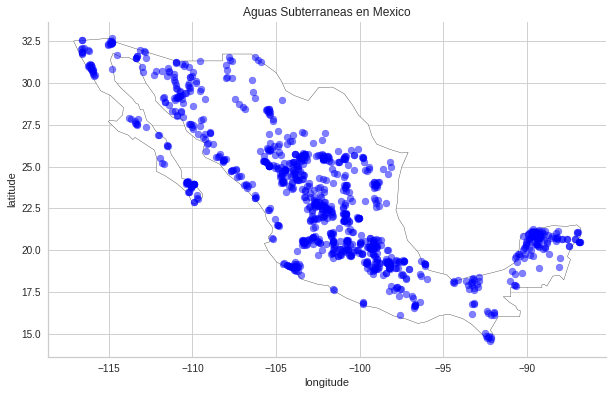

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_Subterraneas.plot(ax=gax, color='Blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
X_Subterranea = gdf_Subterraneas[["LATITUD","LONGITUD"]]
X_Subterranea

LATITUD    LONGITUD
0     22.208870 -102.022100
1     21.999580 -102.200750
2     22.184350 -102.294490
3     23.474600 -110.213960
4     23.799861 -110.088778
...         ...         ...
1063  21.002222  -89.393611
1064  20.977778  -89.441667
1065  20.704360  -88.589530
1066  20.837920  -89.182510
1067  24.974780  -99.439140

[1068 rows x 2 columns]

In [ ]:
y_Subterranea = gdf_Subterraneas[["SEMAFORO_Type"]]
y_Subterranea

SEMAFORO_Type
0                 2
1                 2
2                 2
3                 2
4                 2
...             ...
1063              0
1064              0
1065              0
1066              0
1067              0

[1068 rows x 1 columns]

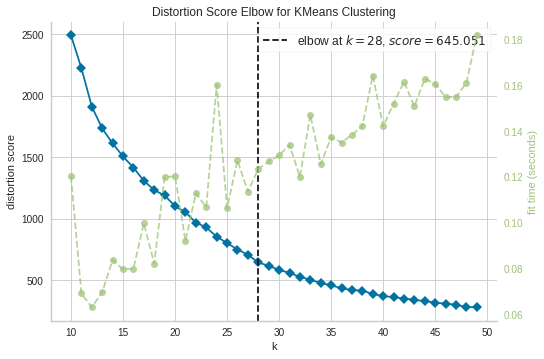

In [ ]:
X_Sl = list(zip(df_limpio_ASubterraneas.LONGITUD, df_limpio_ASubterraneas.LATITUD))
blob_centers = X_Sl
X_cluster = X_Subterranea.copy()
y_cluster = y_Subterranea.copy()
X_cluster2, y_cluster2 = make_blobs(n_samples=3493, centers = blob_centers, cluster_std = 0.20, random_state=42)

model = KElbowVisualizer(KMeans(), k=(10,50))
model.fit(X_Subterranea)
model.show()

In [ ]:
kmeans = KMeans(n_clusters=model.elbow_value_, random_state=42).fit(X_Subterranea, y_Subterranea)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X_Subterranea)
yhat = pd.DataFrame(labels).value_counts()
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[1], C_DF[0]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_subterraneas = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_subterraneas ["Numero de cluster"] = " "
gdf_C_subterraneas ["Puntos asignados al Cluster"] = " "

for cluster_number in labels:
   gdf_C_subterraneas["Numero de cluster"][cluster_number]= cluster_number
   gdf_C_subterraneas ["Puntos asignados al Cluster"][cluster_number] = yhat[cluster_number]

gdf_C_subterraneas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0           1                  Coordinates Numero de cluster  \
0   19.832809  -99.309391   POINT (-99.30939 19.83281)                 0   
1   23.819670 -110.146688  POINT (-110.14669 23.81967)                 1   
2   20.746492  -89.485324   POINT (-89.48532 20.74649)                 2   
3   24.330306 -104.053501  POINT (-104.05350 24.33031)                 3   
4   31.897955 -114.052573  POINT (-114.05257 31.89795)                 4   
5   15.472939  -92.316415   POINT (-92.31641 15.47294)                 5   
6   18.922499 -103.811394  POINT (-103.81139 18.92250)                 6   
7   29.853939 -110.770067  POINT (-110.77007 29.85394)                 7   
8   22.580590 -102.433561  POINT (-102.43356 22.58059)                 8   
9   24.194012  -99.139244   POINT (-99.13924 24.19401)                 9   
10  19.077840  -97.751935   POINT (-97.75194 19.07784)                10   
11  25.386561 -101.607999  POINT (-101.60800 25.38656)                11   
12  31.325692 -116.232448  POINT (-116.23245 31.32569)                12   
13  27.319170 -109.731105  POINT (-109.73110 27.31917)                13   
14  28.403889 -105.790044  POINT (-105.79004 28.40389)                14   
15  20.309189 -101.123821  POINT (-101.12382 20.30919)                15   
16  25.514948 -105.322464  POINT (-105.32246 25.51495)                16   
17  20.583280  -87.623409   POINT (-87.62341 20.58328)                17   
18  27.005056 -112.671813  POINT (-112.67181 27.00506)                18   
19  17.873379  -93.420789   POINT (-93.42079 17.87338)                19   
20  30.941352 -107.281006  POINT (-107.28101 30.94135)                20   
21  22.454333 -100.716044  POINT (-100.71604 22.45433)                21   
22  25.673262 -103.568548  POINT (-103.56855 25.67326)                22   
23  24.818738 -107.623430  POINT (-107.62343 24.81874)                23   
24  19.113129  -90.420095   POINT (-90.42010 19.11313)                24   
25  20.538235 -102.990398  POINT (-102.99040 20.53824)                25   
26  22.089180 -105.451205  POINT (-105.45121 22.08918)                26   
27  17.196103  -97.549928   POINT (-97.54993 17.19610)                27   

   Puntos asignados al Cluster  
0                           81  
1                           33  
2                           80  
3                           57  
4                           24  
5                           15  
6                           28  
7                           59  
8                           72  
9                           34  
10                          59  
11                          51  
12                          27  
13                          26  
14                          20  
15                          65  
16                          40  
17                          26  
18                          16  
19                          22  
20                          12  
21                          46  
22                          57  
23                          26  
24                          19  
25                          35  
26                          14  
27                          24

In [ ]:
DF_Cluster_Subterraneo = X_Subterranea.copy()
DF_Cluster_Subterraneo ["ClusterAsignado"] = labels
DF_Cluster_Subterraneo["Semaforo"] = df_limpio_ASubterraneas["SEMAFORO_Type"].values
DF_Cluster_Subterraneo

LATITUD    LONGITUD  ClusterAsignado  Semaforo
0     22.208870 -102.022100                8         2
1     21.999580 -102.200750                8         2
2     22.184350 -102.294490                8         2
3     23.474600 -110.213960                1         2
4     23.799861 -110.088778                1         2
...         ...         ...              ...       ...
1063  21.002222  -89.393611                2         0
1064  20.977778  -89.441667                2         0
1065  20.704360  -88.589530                2         0
1066  20.837920  -89.182510                2         0
1067  24.974780  -99.439140                9         0

[1068 rows x 4 columns]

In [ ]:
modas_PorCluster = []

for value in gdf_C_subterraneas['Numero de cluster']:
  c = pd.DataFrame()
  c = DF_Cluster_Subterraneo[DF_Cluster_Subterraneo.ClusterAsignado == value].copy()
  moda = c['Semaforo'].mode()[0]
  modas_PorCluster.append(moda)

modas_PorCluster

[2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2]

In [ ]:
df_limpio_ASubterraneas[["SEMAFORO","SEMAFORO_Type"]]

SEMAFORO  SEMAFORO_Type
0        Verde              2
1        Verde              2
2        Verde              2
3        Verde              2
4        Verde              2
...        ...            ...
1063  Amarillo              0
1064  Amarillo              0
1065  Amarillo              0
1066  Amarillo              0
1067  Amarillo              0

[1068 rows x 2 columns]

Segun el valor asignado por el Label encoder es el valor a tomar de la cluster por moda.

**Verde = 2**

**Amarillo = 0**

**Rojo = 1**

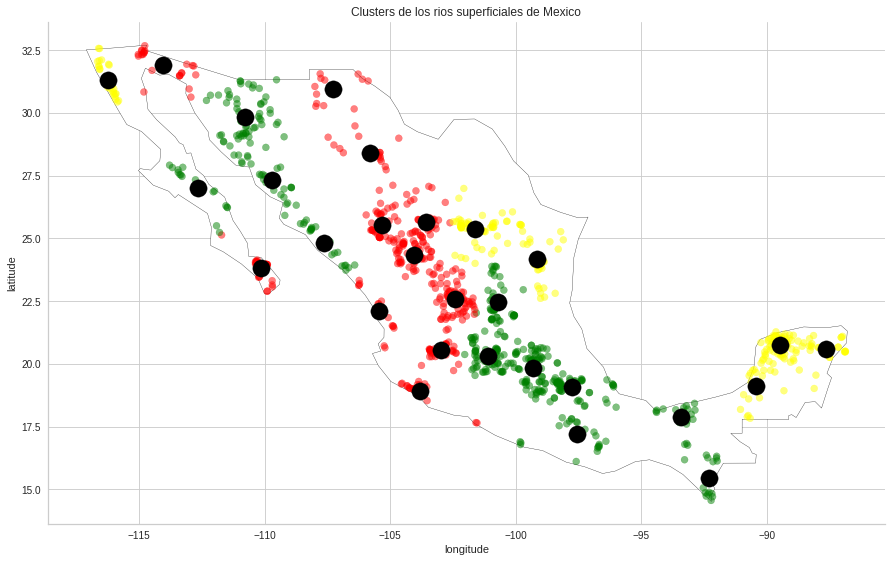

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))

colores = []

color_asig = []

for color in modas_PorCluster:
  if color == 0:
    colores.append('yellow')
  if color == 1:
    colores.append('red')
  if color == 2:
    colores.append('green')

for row in labels:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Subterraneas.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_subterraneas.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de los rios superficiales de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


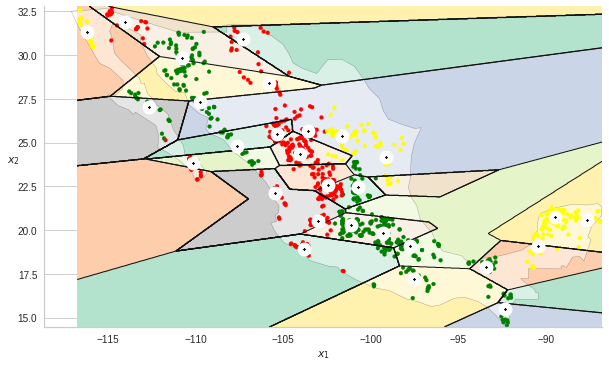

In [ ]:
def plot_data(X, moda, label):
    colores = []

    color_asig = []

    for color in moda:
      if color == 0:
        colores.append('yellow')
      if color == 1:
        colores.append('red')
      if color == 2:
        colores.append('green')

    for row in label:
       color_asig.append(colores[row])

    X["Coordinates"] = list(zip(X.LONGITUD, X.LATITUD))
    X["Coordinates"] = X["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(X, geometry="Coordinates")
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white',alpha=0.5)

    gdf.plot(ax=gax, color=color_asig, alpha = 1, markersize = 15)
    #gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)
    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=1)
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, modas, label, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z
    

    plt.contourf(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                cmap="Pastel2")
    plot_data(X, modas, label)
    plt.contour(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                linewidths=1, colors='k')
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


fig, gax = plt.subplots(figsize=(10,10))
plot_decision_boundaries(kmeans, X_Subterranea, modas = modas_PorCluster, label = labels)
plt.show()

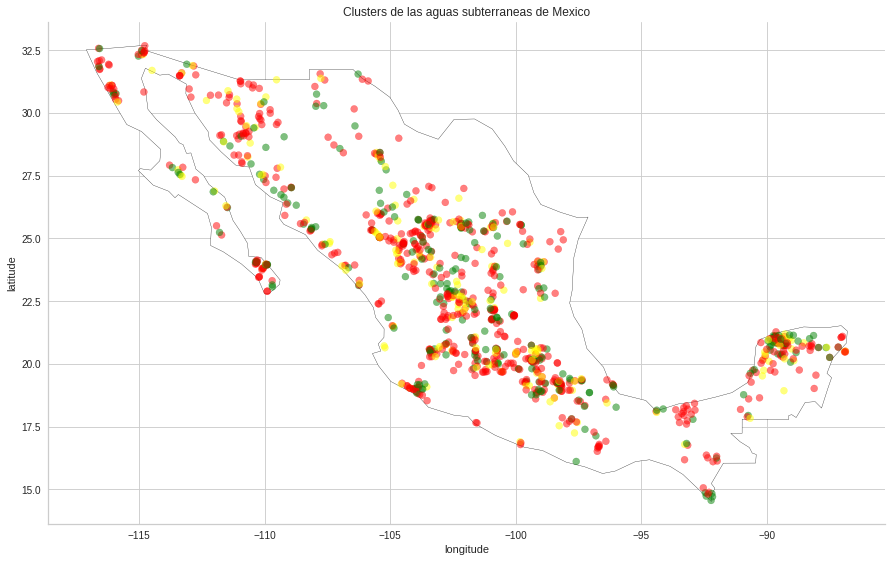

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster2, y_cluster2)
centroids = kmeans.cluster_centers_
labels3 = kmeans.predict(X_cluster2)
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_subterraneas3 = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_subterraneas3


fig, gax = plt.subplots(figsize=(15,10))

colores = ['red','green','yellow']

color_asig = []

for row in labels3:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Subterraneas.plot(ax=gax, color=color_asig, alpha = 0.5,)
#gdf_C_superficiales3.plot(ax=gax, color='black', alpha = 1, markersize = 300, label = "Centroid")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de las aguas subterraneas de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# Entrega 2 -> Clasificación-ensambles 

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a one hot encoding el semáforo Realiza un análisis general de las features importances a traves de decision trees o random forest.
Selecciona las variables de mayor importancia.
Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split) Explora que clasificador es el más optimo, ejemplo:

- Decision trees

- Random Forest.


Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import confusion_matrix

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main 

###Metricas de Desempeño
En esta siguiente parte se definen las métricas de rendimiento de los modelos, al ser un problema multiclase esperamos matrices de 3x3, donde nos salimos de las formas biclase que habíamos trabajado en el pasado y por ende tuvimos que ajustar los resultados en base a la lógica de la matriz de confusión representa.

In [ ]:
#Funciones de las metricas
#Funcion Accuracy
# def mi_accuracy(yreal, ypred):
#   cm = confusion_matrix(yreal, ypred)
#   vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
#   return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)
   

#Funcion Precision
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  result = (vp)/(vp+fp+np.finfo(np.float32).eps)  
  return result

#Funcion recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3
  
  return (vp)/(vp+fn+np.finfo(np.float32).eps)

#Funcin G-Mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3
    
    recall = vp / (vp+fn+np.finfo(np.float32).eps)
    especificidad = vn / (vn+fp+np.finfo(np.float32).eps)
    gmean = np.sqrt(recall * especificidad)

    return gmean

#Funcion f1-score
def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3 
    
    return (2*vp)/((2*vp)+fp+fn+np.finfo(np.float32).eps)


Me_Accuracy = make_scorer(mi_accuracy)
Me_Precision = make_scorer(mi_precision)
Me_Recall = make_scorer(mi_recall)
Me_F1Score = make_scorer(mi_f1score)
Me_Gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":Me_Accuracy,"Precision":Me_Precision,"Recall":Me_Recall,"F1Score":Me_F1Score,"Gmean":Me_Gmean}

###Selección de variables

Los resultados presentados en Kmeans nos dieron un perfecto ejemplo del por qué la posición geográfica es una variable para considerar a la hora de la contaminación, parece haber una fuerte relación entre ellas.

Por ende, nuestras variables no dependientes serán Estado, Municipio, Tipo y subtipo, además de agregar las variables numéricas y ordinales de la composición química del agua para ayudar al modelo a determinar la multiclase que tenemos.

Para la multiclase hicimos un LabelEncoder, esto para entregar una variable de salida "numérica" que clasifique de acuerdo a los datos de entrada, pasamos de los valores Verde, Rojo y Amarillo a 2,1,0.

In [ ]:
df_limpio_ASuperficiales.head(5)

CLAVE                       SITIO           ORGANISMO_DE_CUENCA  \
1  DLBAJ100  LOS CABOS SEG 22, 2 ISA10B  PENINSULA DE BAJA CALIFORNIA   
2  DLBAJ101  LOS CABOS SEG 22, 1 ISA10B  PENINSULA DE BAJA CALIFORNIA   
3  DLBAJ102                 LOS CABOS 3  PENINSULA DE BAJA CALIFORNIA   
4  DLBAJ103                 LOS CABOS 1  PENINSULA DE BAJA CALIFORNIA   
5  DLBAJ104        BAHIA CABO SAN LUCAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO  MUNICIPIO             CUENCA   CUERPO DE AGUA  \
1  BAJA CALIFORNIA SUR  LOS CABOS  SAN JOSE DEL CABO  OCEANO PACIFICO   
2  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  OCEANO PACIFICO   
3  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
4  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   
5  BAJA CALIFORNIA SUR  LOS CABOS          SAN LUCAS  BAHIA SAN LUCAS   

      TIPO     SUBTIPO   LONGITUD  ...  CUMPLE_CON_DQO  CUMPLE_CON_SST  \
1  COSTERO  OCEANO-MAR -109.84290  ...              SI              SI   
2  COSTERO  OCEANO-MAR -109.86442  ...              SI              SI   
3  COSTERO       BAHIA -109.88604  ...              SI              SI   
4  COSTERO       BAHIA -109.89657  ...              SI              SI   
5  COSTERO       BAHIA -109.90250  ...              SI              SI   

   CUMPLE_CON_CF CUMPLE_CON_E_COLI  CUMPLE_CON_ENTEROC CUMPLE_CON_OD  \
1             SI                SI                  SI            SI   
2             SI                SI                  SI            SI   
3             SI                SI                  SI            SI   
4             SI                SI                  SI            SI   
5             SI                SI                  SI            SI   

   CUMPLE_CON_TOX    GRUPO  SEMAFORO_Type                  Coordinates  
1              SI  COSTERO              2  POINT (-109.84290 22.90473)  
2              SI  COSTERO              2  POINT (-109.86442 22.89880)  
3              SI  COSTERO              2  POINT (-109.88604 22.89609)  
4              SI  COSTERO              2  POINT (-109.89657 22.87694)  
5              SI  COSTERO              2  POINT (-109.90250 22.88000)  

[5 rows x 52 columns]

In [ ]:
onehot = OneHotEncoder()
df_RS_AD = df_limpio_ASuperficiales.copy()
data_OH= onehot.fit_transform(df_RS_AD[["SEMAFORO"]])
dft = pd.DataFrame(data_OH.toarray(), columns=["Amarillo","Rojo","Verde"], dtype=int)
dft

Amarillo  Rojo  Verde
0            0     0      1
1            0     0      1
2            0     0      1
3            0     0      1
4            0     0      1
...        ...   ...    ...
3488         1     0      0
3489         1     0      0
3490         1     0      0
3491         1     0      0
3492         1     0      0

[3493 rows x 3 columns]

In [ ]:
y = df_limpio_ASuperficiales[["SEMAFORO_Type"]]
y

SEMAFORO_Type
1                 2
2                 2
3                 2
4                 2
5                 2
...             ...
3484              0
3485              0
3488              0
3491              0
3492              0

[3493 rows x 1 columns]

In [ ]:
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']
OrdinalesQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']
Categoricas_superficiales = ['ESTADO','MUNICIPIO','TIPO','SUBTIPO']

X =  df_limpio_ASuperficiales[NumericasQuimicas + OrdinalesQuimicas + Categoricas_superficiales]
X

DBO_mg/L  DQO_mg/L  SST_mg/L  COLI_FEC_NMP_100mL  E_COLI_NMP_100mL  \
1     3.372192  18.24123   10.0000          281.205882         91.069853   
2     3.372192  18.24123   10.0000          281.205882         91.069853   
3     3.372192  18.24123   13.9667          281.205882         91.069853   
4     3.372192  18.24123   10.0000          281.205882         91.069853   
5     3.372192  18.24123   22.0667          281.205882         91.069853   
...        ...       ...       ...                 ...               ...   
3484  2.000000  10.00000   10.0000         2400.000000       2400.000000   
3485  2.000000  10.00000   18.0000         2400.000000       2400.000000   
3488  2.000000  10.00000  122.0000         2400.000000       2400.000000   
3491  2.000000  35.92000   56.0000         2400.000000         11.000000   
3492  2.000000  34.60000   45.0000         2400.000000         15.000000   

      ENTEROC_NMP_100mL    OD_PORC  OD_PORC_SUP  OD_PORC_MED  OD_PORC_FON  \
1             20.000000  75.425573    92.000000    95.400000    92.200000   
2              3.000000  75.425573    92.000000    95.400000    92.200000   
3              3.000000  75.425573    82.649896    78.641516    86.700000   
4             30.000000  75.425573    96.200000    95.900000    95.500000   
5              3.000000  75.425573    90.100000    95.200000    94.200000   
...                 ...        ...          ...          ...          ...   
3484          39.628571  94.300000    87.246667    62.990196    53.175817   
3485          39.628571  74.300000    87.246667    62.990196    53.175817   
3488          39.628571  69.100000    87.246667    62.990196    53.175817   
3491          39.628571  76.200000    87.246667    62.990196    53.175817   
3492          39.628571  85.400000    87.246667    62.990196    53.175817   

      ...  CALIDAD_OD_PORC_MED  CALIDAD_OD_PORC_FON  CALIDAD_TOX_D_48  \
1     ...            Excelente            Excelente    Toxicidad Baja   
2     ...            Excelente            Excelente    Toxicidad Baja   
3     ...            Excelente            Excelente    Toxicidad Baja   
4     ...            Excelente            Excelente    Toxicidad Baja   
5     ...            Excelente            Excelente    Toxicidad Baja   
...   ...                  ...                  ...               ...   
3484  ...        Buena Calidad        Buena Calidad         No Toxico   
3485  ...        Buena Calidad        Buena Calidad         No Toxico   
3488  ...        Buena Calidad        Buena Calidad         No Toxico   
3491  ...        Buena Calidad        Buena Calidad         No Toxico   
3492  ...        Buena Calidad        Buena Calidad         No Toxico   

      CALIDAD_TOX_V_15 CALIDAD TOX_D_48_SUP CALIDAD_TOX_FIS_SUP_15  \
1       Toxicidad Baja       Toxicidad Baja              No Toxico   
2       Toxicidad Baja       Toxicidad Baja              No Toxico   
3       Toxicidad Baja       Toxicidad Baja              No Toxico   
4       Toxicidad Baja       Toxicidad Baja              No Toxico   
5       Toxicidad Baja       Toxicidad Baja              No Toxico   
...                ...                  ...                    ...   
3484         No Toxico       Toxicidad Baja         Toxicidad Baja   
3485         No Toxico       Toxicidad Baja         Toxicidad Baja   
3488         No Toxico       Toxicidad Baja         Toxicidad Baja   
3491         No Toxico       Toxicidad Baja         Toxicidad Baja   
3492         No Toxico       Toxicidad Baja         Toxicidad Baja   

                   ESTADO     MUNICIPIO     TIPO     SUBTIPO  
1     BAJA CALIFORNIA SUR     LOS CABOS  COSTERO  OCEANO-MAR  
2     BAJA CALIFORNIA SUR     LOS CABOS  COSTERO  OCEANO-MAR  
3     BAJA CALIFORNIA SUR     LOS CABOS  COSTERO       BAHIA  
4     BAJA CALIFORNIA SUR     LOS CABOS  COSTERO       BAHIA  
5     BAJA CALIFORNIA SUR     LOS CABOS  COSTERO       BAHIA  
...                   ...           ...      ...         ...  
3484     

In [ ]:
y.shape

(3493, 1)

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
X_train.shape

(2794, 32)

In [ ]:
y_train.shape

(2794, 1)

###Transformación de los datos númericos.
Haremos un análisis para ver qué tipo de transformación hacerle a los datos numéricos, esto con el objetivo de ayudar a eliminar los sesgos que estos datos pudieran tener. Podemos notar que la función logaritmo nos ayuda de manera efectiva a centralizar los datos y esto es una clara ayuda con la reducción de los sesgos.

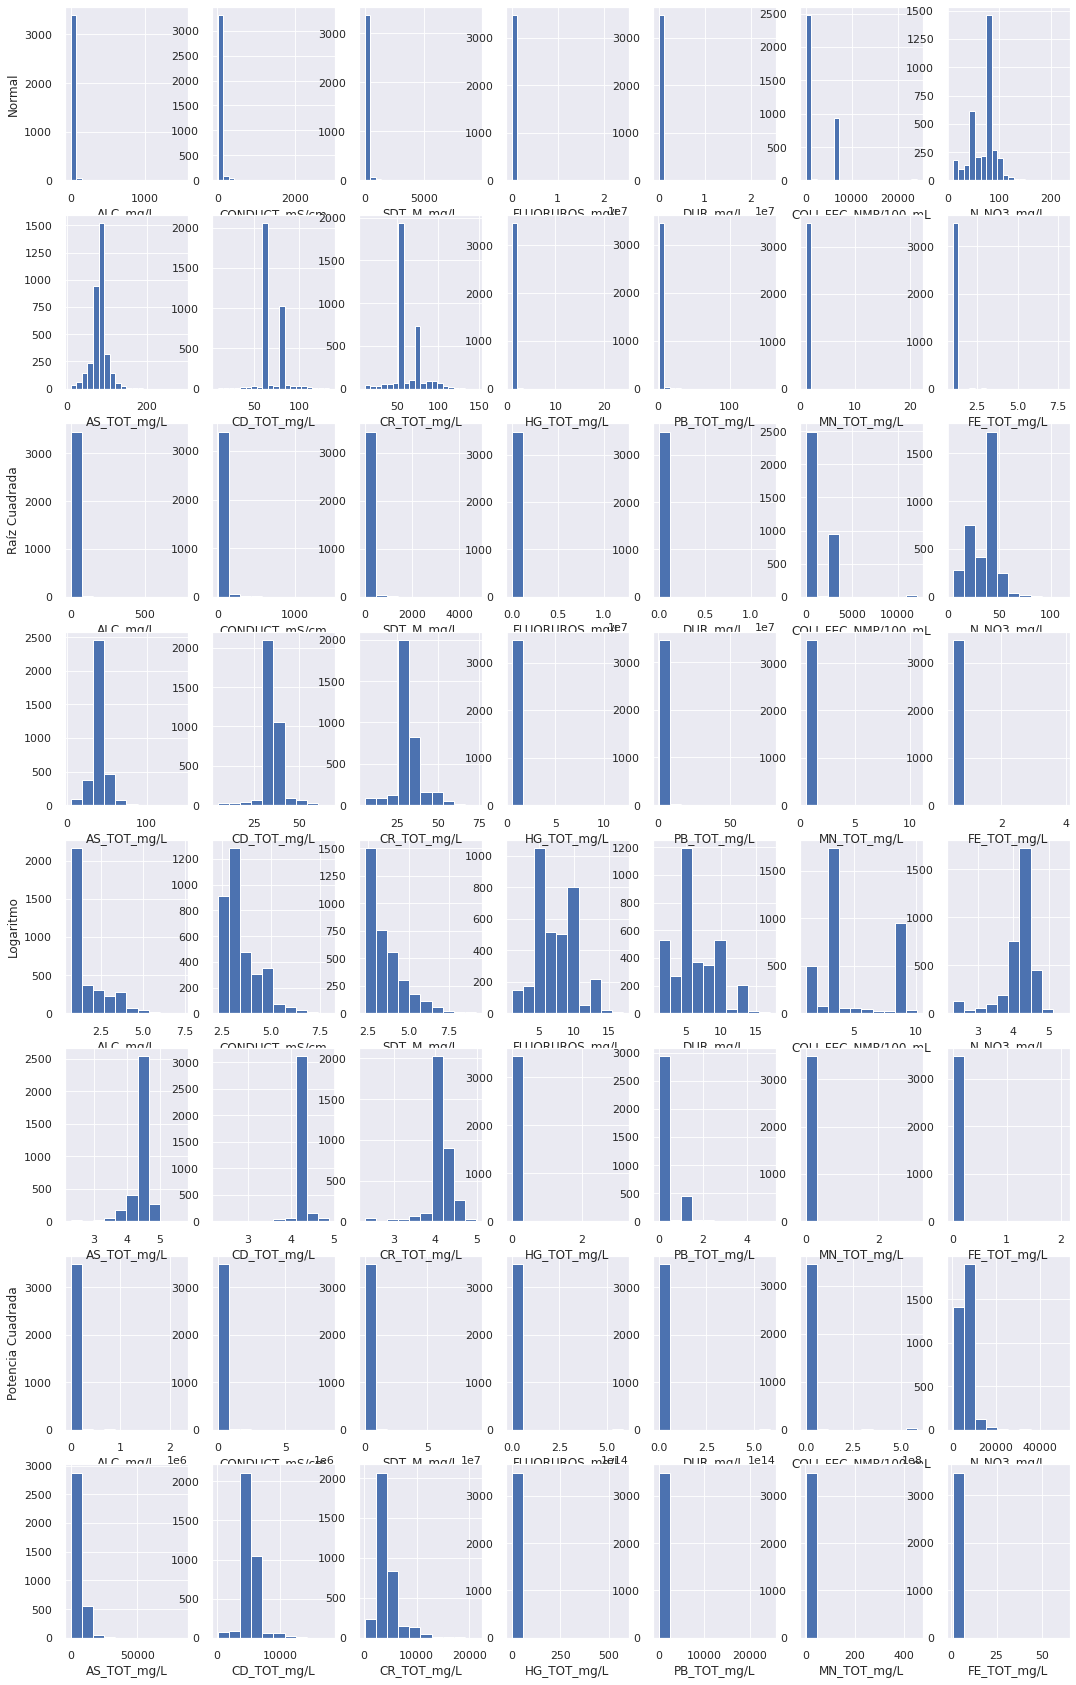

In [ ]:
sns.set(rc={'figure.figsize':(18,30)})
fig, axes = plt.subplots(8, 7)   
for k in range(0,14):  
  plt.subplot(8,7,k+1) 

  Transf0 = df_limpio_ASuperficiales[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(8,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas2[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(8,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(8,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Potencia')

  if k==0:
    plt.ylabel('Potencia Cuadrada')

plt.show()

###Pipelines.
Procederemos a hacer los pipelines, donde además de aplicar una transformación logarítmica, haremos una escalación de 1 a 2 por los valores tan pequeños que tenemos en las numéricas y las Categóricas y Ordinales un OneHot Encoder para discernir los datos en varias columnas que nos arrojen valores numéricos.

In [ ]:
num_prepro_pipeline = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))) ,
                                         ('SqrtMax', FunctionTransformer(np.log))])  
num_pipeline_nombres = NumericasQuimicas

##########################################################################################
Cat_prepro_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown='ignore'))])
 
Cat_pipeline_nombres = Categoricas_superficiales

#######################################################################################################   
Ord_prepro_pipeline = Pipeline(steps = [ ('OneHotE', OneHotEncoder(handle_unknown='ignore'))])
   
Ord_pipeline_nombres = OrdinalesQuimicas

########################################################################################################
columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
                                         ('categorica', Cat_prepro_pipeline, Cat_pipeline_nombres),
                                         ('ordinal', Ord_prepro_pipeline, Ord_pipeline_nombres),
                                                       ],  remainder='passthrough')

# columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
                                         
#                                                        ],  remainder='passthrough')



###Modelo Decision Tree Para Superficiales.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2794 entries, 740 to 258
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DBO_mg/L                2794 non-null   float64
 1   DQO_mg/L                2794 non-null   float64
 2   SST_mg/L                2794 non-null   float64
 3   COLI_FEC_NMP_100mL      2794 non-null   float64
 4   E_COLI_NMP_100mL        2794 non-null   float64
 5   ENTEROC_NMP_100mL       2794 non-null   float64
 6   OD_PORC                 2794 non-null   float64
 7   OD_PORC_SUP             2794 non-null   float64
 8   OD_PORC_MED             2794 non-null   float64
 9   OD_PORC_FON             2794 non-null   float64
 10  TOX_D_48_UT             2794 non-null   float64
 11  TOX_V_15_UT             2794 non-null   float64
 12  TOX_D_48_SUP_UT         2794 non-null   float64
 13  TOX_FIS_SUP_15_UT       2794 non-null   float64
 14  CALIDAD_DBO             2794 non-null  

###GridSearch

Buscamos el uso del gridsearch para tratar de encontrar un modelo no solo funcional como clasificador, sino que además nos ayuda en el objetivo. El cual es tratar de estimar la mayor clase de semáforos correctos para poder ejecutar acciones en base a su semáforo. Por ello elegimos la métrica de Recall, ya que buscamos reducir la cantidad de falsos negativos o alarmas de acción para posibles mantos acuíferos contaminados y esto provoque acciones tardías y daños ambientales.

In [ ]:
modeloDT = DecisionTreeClassifier(random_state = 42)


# dicc_gridDT = {'m__ccp_alpha':[.01,.02, 0.07,1],
#              'm__criterion':['gini','entropy'],
#              'm__max_depth':[2,8,12,20],
#              'm__min_samples_split':[2,6,8,12],
#              'm__class_weight':['balanced',None],
#              'm__min_samples_leaf':[5,10,15,20],
#                           }
# #Optimizar el tiempo, el grid tarda 20 min en correr, dejamos los hyperparametros ya encontrados
dicc_gridDT = {'m__ccp_alpha':[.01],
             'm__criterion':['entropy'],
             'm__max_depth':[8],
             'm__min_samples_split':[2],
             'm__class_weight':[None],
             'm__min_samples_leaf':[5],
                          }
 
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridDT, 
                    cv=cv, 
                    scoring= Me_Recall)


gridDT.fit(X_train, y_train)
gridDT.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)


Mejor valor obtenido con la mejor combinación: 0.9990459151118575
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.01, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 8, 'm__min_samples_leaf': 5, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


###Evaluación 

Ahora evaluaremos las métricas para ver el rendimiento total de los modelos en las distintas métricas con un modelo optimizado para Recall.

In [ ]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT_Optimizado)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)
resultados
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nTrain Gmean: %.3f (%.4f)\nTest Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))



mean Train Accuracy: 1.000 (0.0001)
mean Test Accuracy: 0.999 (0.0007)

mean Train Precision: 1.000 (0.0002)
mean Test Precision: 0.999 (0.0011)

mean Train Recall: 1.000 (0.0002)
mean Test Recall: 0.999 (0.0011)

Train Gmean: 1.000 (0.0001)
Test Gmean: 0.999 (0.0008)

mean Train f1-score: 1.000 (0.0002)
mean Test f1-score: 0.999 (0.0011)



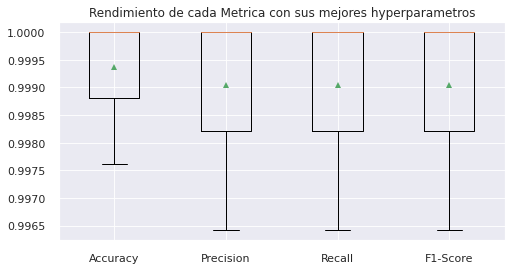

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

Podemos notar un resultado muy alentador, pero también preocupante a la hora de tener modelos sobreentrenados, queremos buscar ver su rendimiento por ello emplearemos las curvas de entrenamiento para interpretar mejor el rendimiento.

Curvas de Entrenamiento

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_ModeloYCurvasDT(Xin):
      

    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT_Optimizado)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Me_Recall,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Recall")


Curvas de aprendizaje del modelo DT:


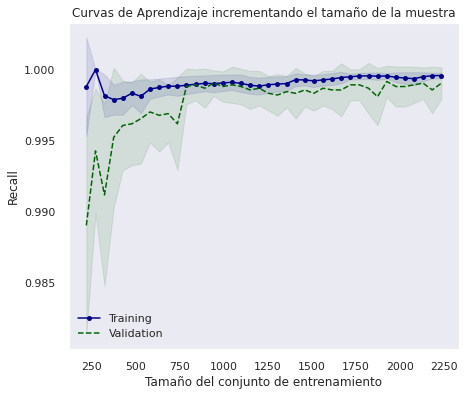

In [ ]:
print('Curvas de aprendizaje del modelo DT:')
mi_ModeloYCurvasDT(X_train)

Las Curvas de entrenamiento nos dan un perfil de resultados para su análisis, podemos notar que la curva de entrenamiento parece aprender a un ritmo casi instantáneo, además que la curva de validación crece de una manera esperada, no vemos una varianza que indique sobreentrenamiento, ni subentrenamiento. Lo preocupante es el nivel de error final que tenemos, probablemente tengamos que evaluar con datos nuevos y ver que tan efectivo este modelo realmente es.

###Feature Importance

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.20658
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: 0.33133
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.00000
Feature: OD_PORC, Score: 0.00000
Feature: OD_PORC_SUP, Score: 0.00000
Feature: OD_PORC_MED, Score: 0.14292
Feature: OD_PORC_FON, Score: 0.00000
Feature: TOX_D_48_UT, Score: 0.00000
Feature: TOX_V_15_UT, Score: 0.00000
Feature: TOX_D_48_SUP_UT, Score: 0.00000
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00000
Feature: CALIDAD_DQO, Score: 0.07797
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00372
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00000
Feature: CALIDAD_OD_PORC, Score: 0.00157
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: 0.00000
Feature: CALIDAD_OD_PORC_FON, Score: 0.00000
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: CALIDA

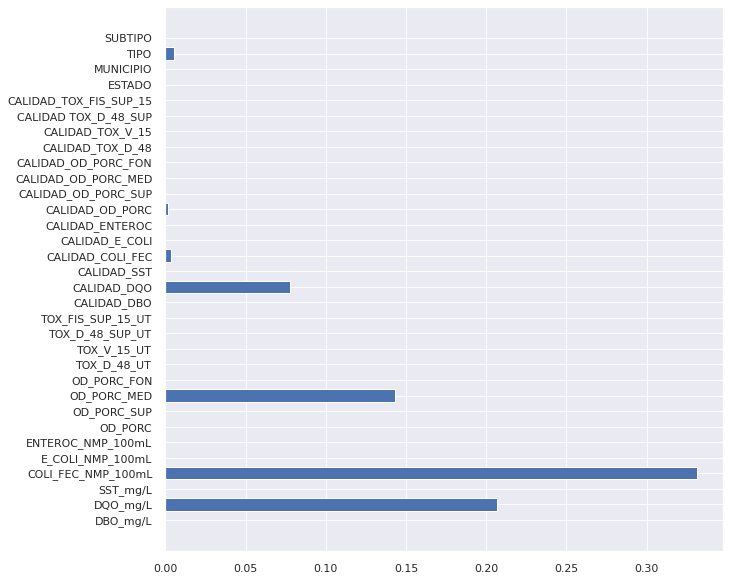

In [ ]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT_Optimizado)])

pipeline.fit(X_train,np.ravel(y_train))
y_pred = pipeline.predict(X_test)

per_importances = permutation_importance(pipeline, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X.columns.to_numpy(), per_importances['importances_mean'])
plt.show()

Podemos notar que nuestro modelo solo está utilizando un total de 7 variables totales como características importantes para el desarrollo y exploración del modelo. Gracias al GridSearch el modelo está trabajando de una excelente manera, solo que es importante notar esto y tal vez en futuras optimizaciones solo trabajar con estas variables para reducir el tiempo de cómputo que se genera gracias al OneHot Encoder usado en los pipelines.


###Diagrama de Árbol

El diagrama de árbol es una gráfica que decidimos añadir para dar una representación grafica del modelo trabajando, como este va rompiendo y asignando clases de acuerdo a las variables que va encontrando y clasificando ad hoc a la clase que le corresponde.

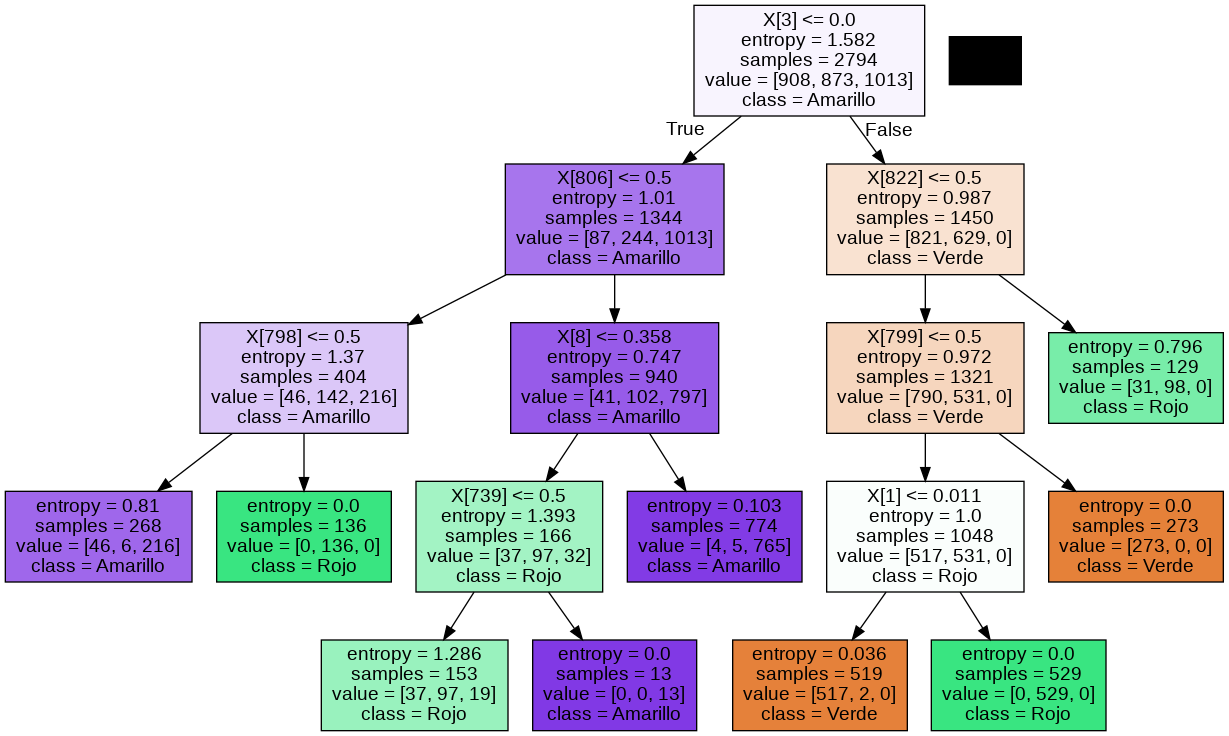

In [ ]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)
Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modeloDT_Optimizado.fit(Xxt, y_train)


dot_data = tree.export_graphviz(decision_tree=modeloDT_Optimizado, 
                                out_file=None,
                                max_depth=gridDT.best_params_.get('max_depth'),
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Matriz de Confusion

Procedemos a hacer una matriz de confusión para ver la distribución de los distintos cuadrantes de resultados del modelo y con ello tener la representación clara de que resultados podemos obtener.

In [ ]:
#Evaluamos el modelo par sacr la matriz de confusion.
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT_Optimizado)])

pipeline.fit(X_train, y_train)

yhat = pipeline.predict(X_test)

cm = confusion_matrix(y_test, yhat)
print(cm)

[[202  13  12]
 [  0 213   5]
 [  0   2 252]]


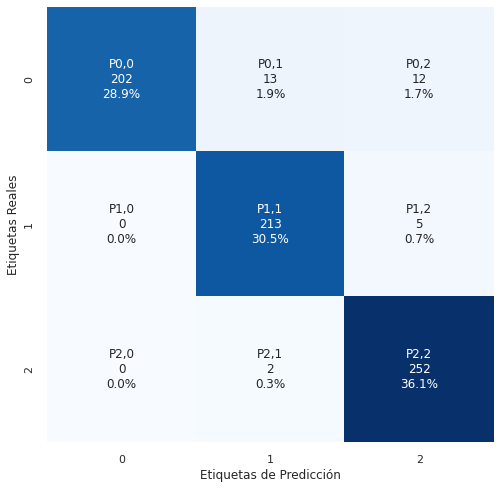

In [ ]:
txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Esta Curva nos enseña que para las 3 clases tenemos un en los verdaderos positivos de las principales clases un porcentaje alto, queriendo decir que tenemos un resultado en la tasa de falsos negativos baja, las curvas Precision-Recall nos darán una mejor perspectiva, pero analizando de manera visual tenemos unos resultados alentadores.

###Grafica Precision-Recall

Al tener un modelo multiclase desbalanceado, la curva precision-recall es la métrica perfecta para evaluar la distribución de la tasa de Precisión y Recall, donde se busca un equilibrio entre las dos en base a la tasa de FN y FP de acuerdo con los verdaderos positivos.

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train.shape

(2794, 32)

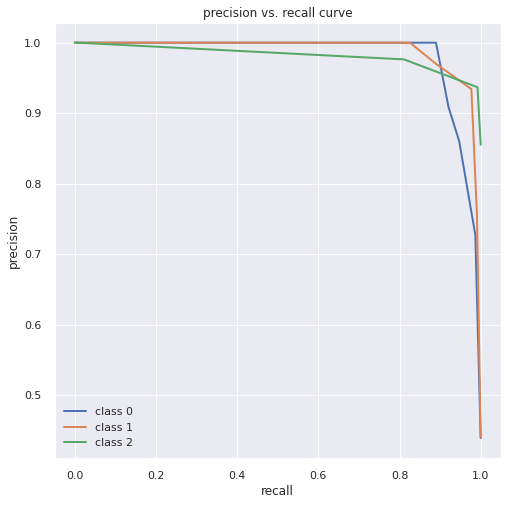

In [ ]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT_Optimizado)])

pipeline.fit(X_train, y_train)

lr_probs = pipeline.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas


y_test_p = y_test.copy()
my_vals = y_test_p['SEMAFORO_Type'].unique().tolist()
my_vals.sort()

  
y_test = label_binarize(y_test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


Al ver las curvas, podemos notar un equilibrio entre Precision y Recall bastante bueno para las clases 1 y 2. Para la clase 0 parece que el tener un Recall Alto también aumentara la cantidad de falsos positivos, pero reducir la tasa de verdaderos positivos. Esto último no siendo del todo malo, ya que si el modelo nos dice que cierto manto acuífero está contaminado y no lo está, podemos perder recursos al hacer un doble análisis, pero el impacto ambiental de un falso negativo, podría significar un mayor costo a la larga.

##Modelo Random Forest
Para el modelo de Random Forest nos limitaremos a hablar de los resultados obtenidos, será exactamente la misma lógica tratada para DecisionTree

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train.shape

(2794, 32)

###GridSearch

In [ ]:
modeloRFC = RandomForestClassifier(random_state = 42)

# dicc_gridRFC = { 'm__ccp_alpha':[0.1, .01, .018,],
#              'm__criterion':['gini','entropy'],
#              'm__max_depth':[2,8,12,20],
#              'm__min_samples_split':[2,6,12],
#              'm__class_weight':['balanced',None],
#              'm__min_samples_leaf':[5,15,20],
#                           } 
#Este metodo tomo 65 minutos, dejaremos abajo ya con los valores escogidos para evitar ese tiempo
dicc_gridRFC = {'m__ccp_alpha':[.01],
                'm__criterion':['entropy'],
                'm__max_depth':[20],
                'm__min_samples_split':[2],
                'm__class_weight':[None],
                'm__min_samples_leaf':[5],
                          }
 
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridRFC = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridRFC, 
                    cv=cv, 
                    scoring= Me_Recall)


gridRFC.fit(X_train, np.ravel(y_train))
gridRFC.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC.best_params_)
print('Métrica utilizada:', gridRFC.scoring)

Mejor valor obtenido con la mejor combinación: 0.9996422180336145
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.01, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 20, 'm__min_samples_leaf': 5, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


###Evaluación de métricas

In [ ]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC_Optimizado)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)
resultados
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nTrain Gmean: %.3f (%.4f)\nTest Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 1.000 (0.0003)
mean Test Accuracy: 1.000 (0.0005)

mean Train Precision: 1.000 (0.0004)
mean Test Precision: 1.000 (0.0007)

mean Train Recall: 1.000 (0.0004)
mean Test Recall: 1.000 (0.0007)

Train Gmean: 1.000 (0.0003)
Test Gmean: 1.000 (0.0005)

mean Train f1-score: 1.000 (0.0004)
mean Test f1-score: 1.000 (0.0007)



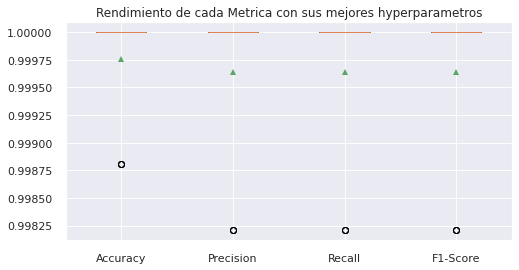

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

Para el modelo de Bosque Aleatorio, los resultados parece ser muy parecidos a los obtenidos por el árbol de decisión, teniendo unos ligeros outliers pero en promedio resultados bastante alentadores, que de igual forma serán evaluados con una curva de entrenamiento.

###Curvas de entrenamiento

In [ ]:
def mi_ModeloYCurvasRFC(Xin):
      

    modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC_Optimizado)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = np.ravel(y_train),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Me_Recall,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Recall")

Curvas de aprendizaje del modelo RFC:


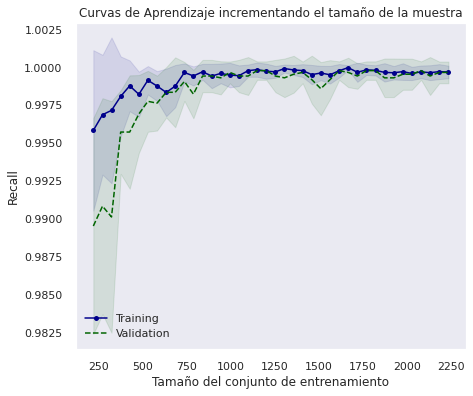

In [ ]:
print('Curvas de aprendizaje del modelo RFC:')
mi_ModeloYCurvasRFC(X_train)

Podemos notar que la curva de entrenamiento y validación durante el proceso del aumento del conjunto de entrenamiento parecen aprender de forma conjunta, sin llegar a tocarse del todo, esto representado una varianza alta, pero con un sesgo mínimo, parecen resultados alentadores.

###Matriz de confusión.

In [ ]:
#Evaluamos el modelo par sacr la matriz de confusion.
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC_Optimizado)])

pipeline.fit(X_train, np.ravel(y_train))

yhat = pipeline.predict(X_test)

cm = confusion_matrix(y_test, yhat)
print(cm)

[[226   0   1]
 [  0 218   0]
 [  0   0 254]]


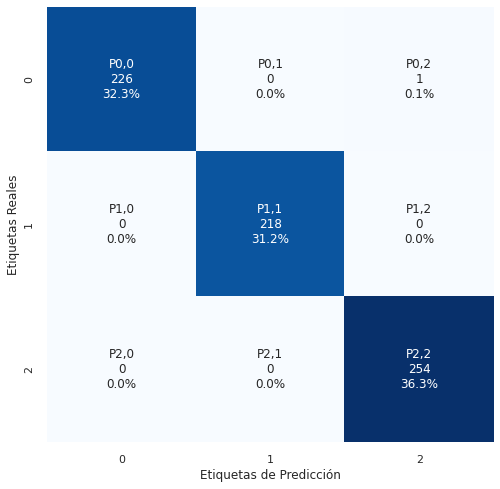

In [ ]:
txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Los resultados de esta matriz de confusión nos dicen que el modelo está teniendo una precisión bastante alta, sin ser castigado por el recall, preocupante a futuro o posible indicador de sobre entrenamiento del modelo.

###Feature Importance

Aqui concluimos una situacion parecida al modelo de árbol de decisión.

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.00000
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: 0.00000
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.32804
Feature: OD_PORC, Score: 0.00086
Feature: OD_PORC_SUP, Score: 0.00000
Feature: OD_PORC_MED, Score: 0.00000
Feature: OD_PORC_FON, Score: 0.00000
Feature: TOX_D_48_UT, Score: 0.00000
Feature: TOX_V_15_UT, Score: 0.00043
Feature: TOX_D_48_SUP_UT, Score: 0.00000
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00000
Feature: CALIDAD_DQO, Score: 0.00000
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00000
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00000
Feature: CALIDAD_OD_PORC, Score: 0.00000
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: 0.00000
Feature: CALIDAD_OD_PORC_FON, Score: 0.00000
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: CALIDA

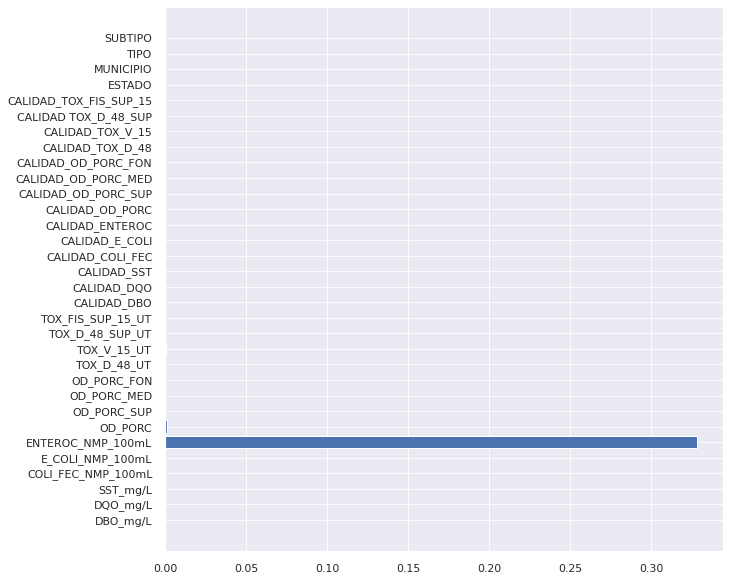

In [ ]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features =400,)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC_Optimizado)])

pipeline.fit(X_train,np.ravel(y_train))
y_pred = pipeline.predict(X_test)

per_importances = permutation_importance(pipeline, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X.columns.to_numpy(), per_importances['importances_mean'])
plt.show()

Podemos notar que nuestro modelo solo está utilizando un total de 2 variables totales como características importantes para el desarrollo y exploración del modelo. Gracias al GridSearch el modelo está trabajando de una excelente manera, solo que es importante notar esto y tal vez en futuras optimizaciones solo trabajar con estas variables para reducir el tiempo de cómputo que se genera gracias al OneHot Encoder usado en los pipelines. Cabe denotar que parece ser que por ser una metodología aleatoria de este modelo, fue capaz de identificar más rápido la clasificación de la contaminación con menos variables fue capaz de mantener un rendimiento óptimo en sus valoración de las métricas.

###Curva Precision-Recall

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)
X_train.shape

(2794, 32)

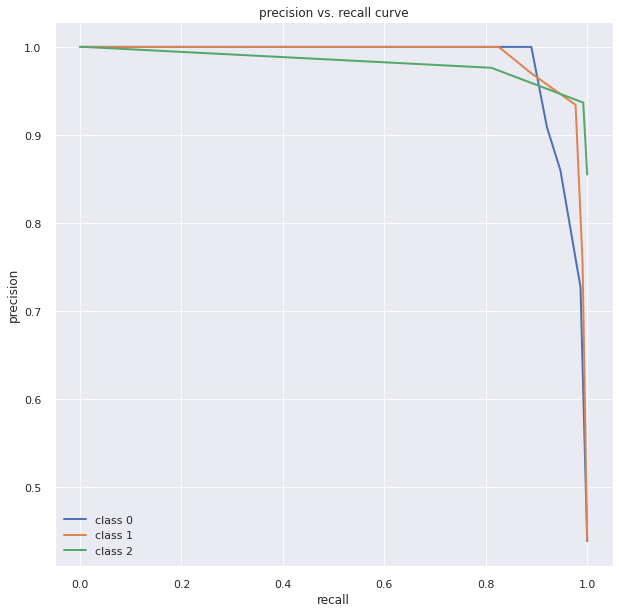

In [ ]:
modeloRFC_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridRFC.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC_Optimizado)])

pipeline.fit(X_train, y_train)

lr_probs = pipeline.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas


y_test_p = y_test.copy()
my_vals = y_test_p['SEMAFORO_Type'].unique().tolist()
my_vals.sort()

  
y_test = label_binarize(y_test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.plot(figsize=(10,10))   
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


La Curva Precision-Recall parece confirmar que, en efecto, las 3 clases no se ven afectadas de sobremanera al tener un tasa de recall alta, podemos mantener una precisión bastante aceptable. Solo había que de nuevo tener cuidado con no poder detectar a tiempo los posibles efectos ambientales de estas decisiones.

###Diagrama de Árbol

El Diagrama de árbol se hizo con un estimador que convierte el RFC en DT, parece no funcionar de manera correcta, pero decidimos dejarlo así como mera Ilustración del comportamiento del modelo.

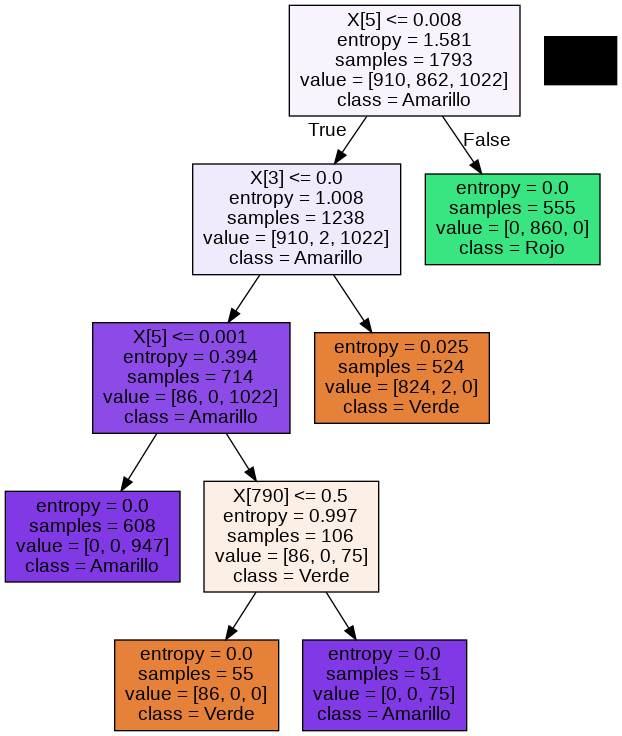

In [ ]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features =400,)

Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modeloRFC_Optimizado.fit(Xxt, np.ravel(y_train))
estimator = modeloRFC_Optimizado[5]

dot_data = tree.export_graphviz(decision_tree=estimator, 
                                out_file=None,
                                max_depth=gridRFC.best_params_.get('m__max_depth'),
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Modelos para comparar Funcionamiento.

Aunado a las métricas de Bosque Aleatorio y árbol de decisión. Decidimos usar 3 modelos para comparar rendimientos entre ellos. 

Entre ellos elegidos modelos de clasificación altamente usados en modelos de clasificación. Como lo son Regresión logística, Potenciador de gradiente y Vector soporte. Estos siendo modelos de clasificación con una forma de trabajar diferente a los árboles de clasificación.

Cabe recalcar que esto es mero comparativo para analizar modelos sin hyperparametros complejos u optimizados como nuestros bosques trabajaron.



In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')
  
  # XGT - GradientBoostingClassifier:
  modelos.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0))
  nombres.append('XGT')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale', probability = True))
  nombres.append('SVC')
  
  return modelos, nombres

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)
X_train.shape

(2794, 32)

In [ ]:
def CM_modelo(CT,modelo,X,y,X_test,y_test):

    pipeline = Pipeline(steps=[('ct', columnasTransformer),('m',modelo)])

    pipeline.fit(X, y)

    yhat = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    sns.set(rc={'figure.figsize':(8,8)})
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()

In [ ]:
def mi_ModeloYCurvas_general(Xin,Yin,modelo,CT):
      

    pipeline = Pipeline(steps=[('ct', CT),('m',modelo)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = np.ravel(Yin),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Me_Recall,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Recall")

>> LR: 0.998 (0.003)
************************************************************************


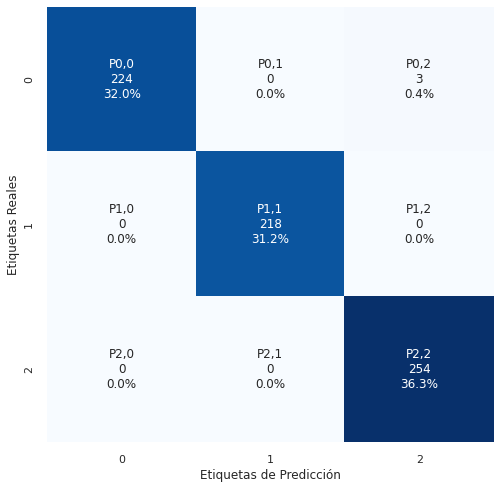

************************************************************************


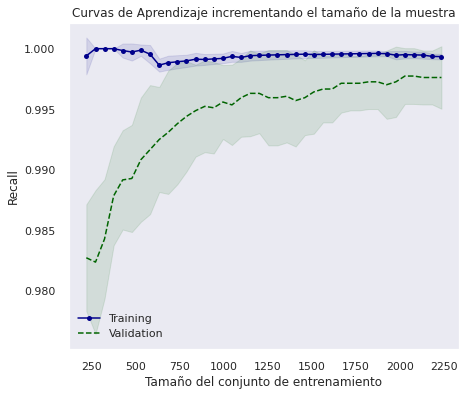



>> XGT: 1.000 (0.001)
************************************************************************


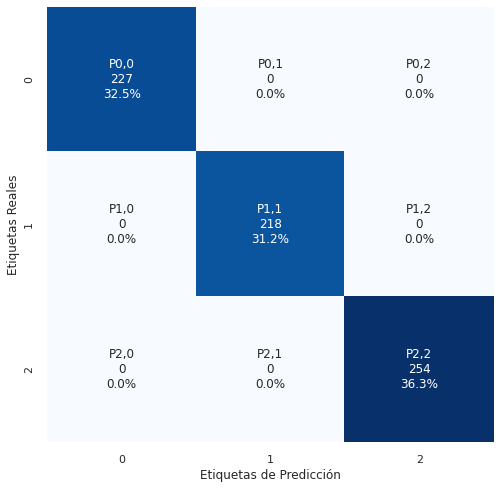

************************************************************************


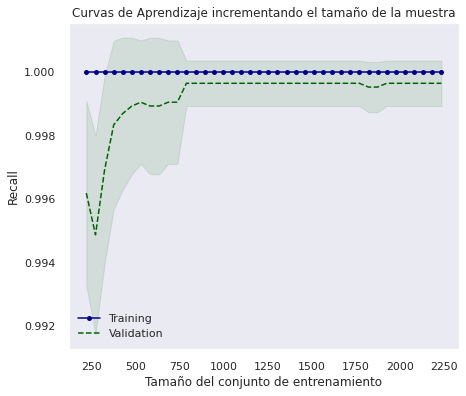



>> SVC: 0.996 (0.004)
************************************************************************


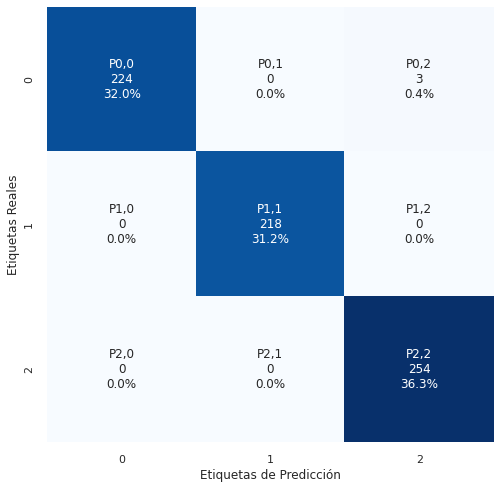

************************************************************************


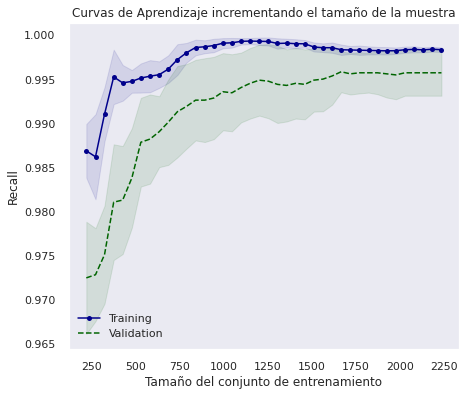

In [ ]:
modelos, nombres = get_models()  
resultados_adicionales = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(pipeline, X_train, np.ravel(y_train), scoring=Me_Recall, cv=cv)


  resultados_adicionales.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))
  print("************************************************************************")
  CM_modelo(columnasTransformer,modelos[i],X_train,np.ravel(y_train),X_test,np.ravel(y_test))
  print("************************************************************************")
  mi_ModeloYCurvas_general(X_train,y_train,modelos[i],columnasTransformer)
  print("\n")
  

Podemos notar que los modelos tanto de regresión logística como de vector soporte muestran graficas de entrenamiento bastante similares en resultados y en ambas se muestra una clara mejora durante el proceso de entrenamiento mientras el conjunto aumenta. Para el modelo del potenciador gradiente vemos que no aprende del todo y la gráfica de entrenamiento parece estar indicando sobreentrenamiento, siendo talvez un modelo muy complejo para este caso del semáforo o con hyperparametros sobre optimizados o complejos.

#Votos de los Clasificadores

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)

In [ ]:
classifiers = [ ['LogisticRegression :',  modelos[0]],
                ['GradientBoostingClassifier: ', modelos[1]],
                ['SVC :', modelos[2]],
                ['DecisionTree :',modeloDT_Optimizado],
                ['RandomForest :',modeloRFC_Optimizado] 
              ]

Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)

Xcte = columnasTransformer.fit(X_train)
Xxte = Xcte.transform(X_test)

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(Xxt, np.ravel(y_train))
    predictions = classifier.predict(Xxte)
    predictions_df[name.strip(" :")] = predictions
    print(name, mi_accuracy(y_test, predictions))

eclf1 = VotingClassifier(estimators=[('LogisticRegression', modelos[0]), ('GradientBoostingClassifier', modelos[1]),  ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)], voting='soft')
eclf1.fit(Xxt, np.ravel(y_train))
predictions = eclf1.predict(Xxte)
print("Votos Soft")
print(classification_report(y_test, predictions))
print("\n")

eclf2 = VotingClassifier(estimators=[('LogisticRegression', modelos[0]), ('GradientBoostingClassifier', modelos[1]),  ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)], voting='hard')
eclf2.fit(Xxt, np.ravel(y_train))
predictions2 = eclf2.predict(Xxte)
print("Votos Hard")
print(classification_report(y_test, predictions2))

LogisticRegression : 0.9971387696142736
GradientBoostingClassifier:  0.9999999999431525
SVC : 0.9971387696142736
DecisionTree : 0.9694802097684448
RandomForest : 0.9999999999431525
Votos Soft
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       254

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



Votos Hard
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       254

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



En la clasificación, un conjunto de votación dura implica sumar los votos para etiquetas de clase nítidas de otros modelos y predecir la clase con la mayor cantidad de votos. Un conjunto de votación suave implica sumar las probabilidades predichas para las etiquetas de clase y predecir la etiqueta de clase con la mayor probabilidad de suma.

Por ello podemos notar un gran rendimiento de los modelos al no darle menor importancia o probabilidad en sus votos a las 3 clases, esto talvez gracias al proceso de preprocesador y optimización de los modelos, pero al darles un conteo máximo de 1 o cercano a 1, concluimos aunado a las curvas de aprendizaje que los modelos están logrando clasificar de maneras efectivas.


#Modelos Aguas Subterraneas.

Misma lógica que con Aguas Superficiales, solo comentaremos los resultados más puntuales. Y alguna que otra diferencia importante.

###Selección de variables.

Para este caso seguimos la misma lógica que la ves pasada, el Kmeans también nos habla de fuertes correlaciones con la localización y contaminación, por ende misma lógica que en aguas superficiales.

In [ ]:
df_limpio_ASubterraneas.head(5)

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
3   DLBAJ110       POZO 26, SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
4   DLBAJ117            LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
3  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL    POZO   

     LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0 -102.022100  22.208870     2020  ...              SI            SI   
1 -102.200750  21.999580     2020  ...              SI            SI   
2 -102.294490  22.184350     2020  ...              SI            SI   
3 -110.213960  23.474600     2020  ...              SI            SI   
4 -110.088778  23.799861     2020  ...              SI            SI   

   CUMPLE_CON_CD CUMPLE_CON_CR  CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0             SI            SI             SI            SI            SI   
1             SI            SI             SI            SI            SI   
2             SI            SI             SI            SI            SI   
3             SI            SI             SI            SI            SI   
4             SI            SI             SI            SI            SI   

   CUMPLE_CON_FE SEMAFORO_Type                  Coordinates  
0             SI             2  POINT (-102.02210 22.20887)  
1             SI             2  POINT (-102.20075 21.99958)  
2             SI             2  POINT (-102.29449 22.18435)  
3             SI             2  POINT (-110.21396 23.47460)  
4             SI             2  POINT (-110.08878 23.79986)  

[5 rows x 57 columns]

In [ ]:
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

OrdinalesQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

Categoricas_subterraneas = ['ESTADO','MUNICIPIO','SUBTIPO']

X2 =  df_limpio_ASubterraneas[NumericasQuimicas2 + OrdinalesQuimicas2 + Categoricas_subterraneas]
X2

ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0       603.6          0.9766  213.7320   
1      231.990          608.0       445.4          0.9298  185.0514   
2      327.000          686.0       478.6          1.1229  199.8790   
3      203.670          531.0       278.8          0.2890  166.2528   
4      343.655         1114.0       672.0          0.3421  403.8482   
...        ...            ...         ...             ...       ...   
1063   277.910         1328.0       874.0          0.2000  560.5000   
1064   311.330         1266.0       837.0          0.2000  594.0500   
1065   312.290         1128.0       754.0          0.3626  574.3200   
1066   395.370         1468.0       970.0          0.5387  554.5800   
1067   199.800         1622.0      1092.2          0.4820  679.2720   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.1    4.184656       0.0161        0.003        0.004   
1                     1.1    5.750110       0.0134        0.003        0.004   
2                     1.1    1.258597       0.0154        0.003        0.005   
3                   110.0    4.686470       0.0100        0.003        0.004   
4                   146.0    1.877325       0.0100        0.003        0.004   
...                   ...         ...          ...          ...          ...   
1063                  1.1    5.175600       0.0100        0.003        0.004   
1064                  1.1    5.347400       0.0100        0.003        0.004   
1065                  1.1    7.663600       0.0100        0.003        0.004   
1066                  1.1    2.586700       0.0100        0.003        0.004   
1067                  1.1    2.357554       0.0100        0.003        0.004   

      ...           CALIDAD_AS           CALIDAD_CD           CALIDAD_CR  \
0     ...       Apta como FAAP  Potable - Excelente  Potable - Excelente   
1     ...       Apta como FAAP  Potable - Excelente  Potable - Excelente   
2     ...       Apta como FAAP  Potable - Excelente  Potable - Excelente   
3     ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
4     ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
...   ...                  ...                  ...                  ...   
1063  ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1064  ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1065  ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1066  ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1067  ...  Potable - Excelente  Potable - Excelente  Potable - Excelente   

               CALIDAD_HG           CALIDAD_PB           CALIDAD_MN  \
0     Potable - Excelente  Potable - Excelente  Potable - Excelente   
1     Potable - Excelente  Potable - Excelente  Potable - Excelente   
2     Potable - Excelente  Potable - Excelente  Potable - Excelente   
3     Potable - Excelente  Potable - Excelente  Potable - Excelente   
4     Potable - Excelente  Potable - Excelente  Potable - Excelente   
...                   ...                  ...                  ...   
1063  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1064  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1065  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1066  Potable - Excelente  Potable - Excelente  Potable - Excelente   
1067  Potable - Excelente  Potable - Excelente  Potable - Excelente   

               CALIDAD_FE               ESTADO        MUNICIPIO SUBTIPO  
0     Potable - Excelente       AGUASCALIENTES         ASIENTOS    POZO  
1     Potable - Excelente       AGUASCALIENTES   AGUASCALIENTES    POZO  
2     Potable - Excelente       AGUASCALIENTES  RINCON DE ROMOS    POZO  
3     Potable - Excelente  BAJA CALIFORNIA SUR           LA PAZ    POZO  
4     Potable - Excelente  BAJA CALIFORNIA SUR          

In [ ]:
y2 = df_limpio_ASubterraneas[["SEMAFORO_Type"]]
y2

SEMAFORO_Type
0                 2
1                 2
2                 2
3                 2
4                 2
...             ...
1063              0
1064              0
1065              0
1066              0
1067              0

[1068 rows x 1 columns]

###Transformación de variables

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, stratify = y2, test_size=0.2, random_state=42)

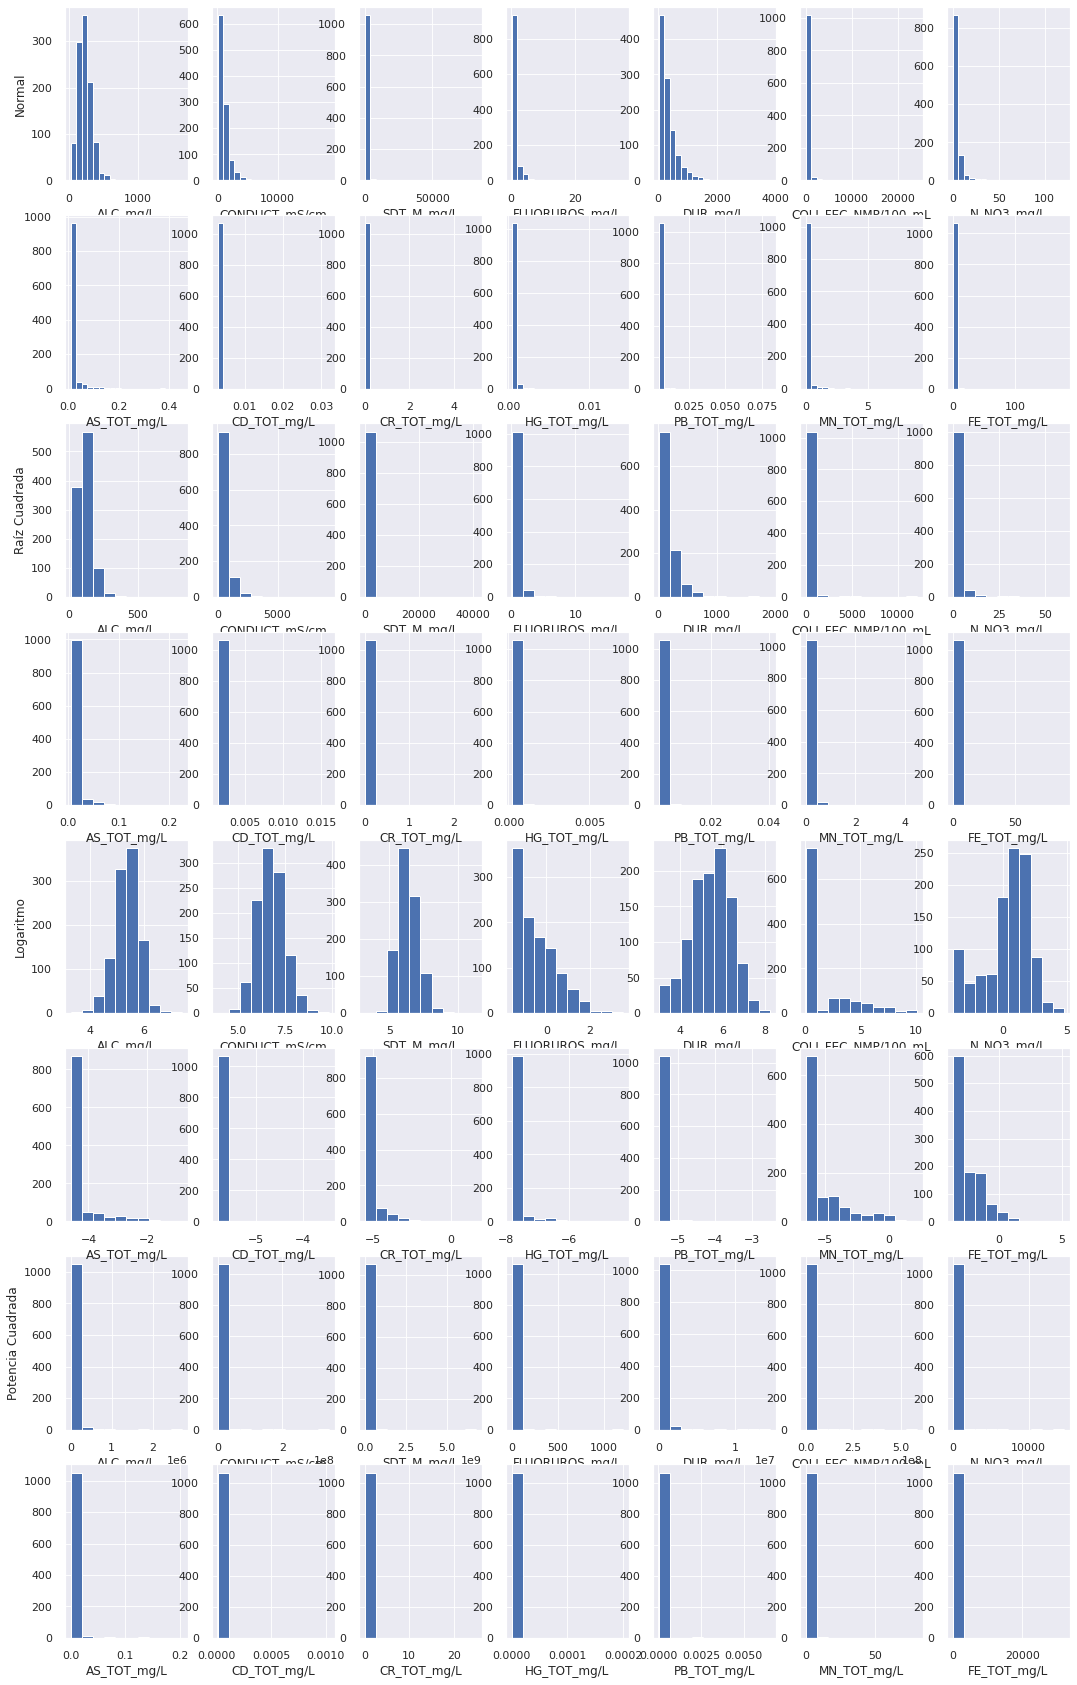

In [ ]:
sns.set(rc={'figure.figsize':(18,30)})
fig, axes = plt.subplots(8, 7)   
for k in range(0,14):  
  plt.subplot(8,7,k+1) 

  Transf0 = df_limpio_ASubterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(8,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas2[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(8,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(8,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Potencia')

  if k==0:
    plt.ylabel('Potencia Cuadrada')

plt.show()

###Pipelines

In [ ]:
num_prepro_pipeline = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))) ,
                                         ('SqrtMax', FunctionTransformer(np.log))])  
num_pipeline_nombres = NumericasQuimicas2

##########################################################################################
Cat_prepro_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown='ignore'))])
 
Cat_pipeline_nombres = Categoricas_subterraneas

#######################################################################################################   
Ord_prepro_pipeline = Pipeline(steps = [ ('OneHotE', OneHotEncoder(handle_unknown='ignore'))])
   
Ord_pipeline_nombres = OrdinalesQuimicas2

########################################################################################################
columnasTransformer2 = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
                                         ('categorica', Cat_prepro_pipeline, Cat_pipeline_nombres),
                                         ('ordinal', Ord_prepro_pipeline, Ord_pipeline_nombres),
                                                       ],  remainder='passthrough')

###Modelo de Árbol de decisión.

In [ ]:
modeloDT2 = DecisionTreeClassifier(random_state = 42)


dicc_gridDT2 = {'m__ccp_alpha':[.001,.01,.02, 0.07,1],
             'm__criterion':['gini','entropy'],
             'm__max_depth':[2,6,8,12,20],
             'm__min_samples_split':[2,4,6,8,12],
             'm__class_weight':['balanced',None],
             'm__min_samples_leaf':[5,12,15,20]
                          }
#Optimizar el tiempo, el grid tarda 20 min en correr, dejamos los hyperparametros ya encontrados
# dicc_gridDT2 = {'m__ccp_alpha':[.01],
#              'm__criterion':['gini'],
#              'm__max_depth':[8],
#              'm__min_samples_split':[4],
#              'm__class_weight':[None],
#              'm__min_samples_leaf':[4],
#                           }
 
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloDT2)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT2 = GridSearchCV(estimator=pipeline2, 
                    param_grid=dicc_gridDT2, 
                    cv=cv, 
                    scoring= Me_Recall)


gridDT2.fit(X_train2, y_train2)
gridDT2.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT2.best_params_)
print('Métrica utilizada:', gridDT2.scoring)


Mejor valor obtenido con la mejor combinación: 0.9492489386792964
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.001, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 12, 'm__min_samples_leaf': 5, 'm__min_samples_split': 12}
Métrica utilizada: make_scorer(mi_recall)


###Evaluación de métricas

In [ ]:
modeloDT2_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloDT2_Optimizado)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline2, X_train2, np.ravel(y_train2), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)
resultados
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nTrain Gmean: %.3f (%.4f)\nTest Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.984 (0.0019)
mean Test Accuracy: 0.966 (0.0122)

mean Train Precision: 0.975 (0.0028)
mean Test Precision: 0.949 (0.0183)

mean Train Recall: 0.975 (0.0028)
mean Test Recall: 0.949 (0.0183)

Train Gmean: 0.982 (0.0021)
Test Gmean: 0.962 (0.0138)

mean Train f1-score: 0.975 (0.0028)
mean Test f1-score: 0.949 (0.0183)



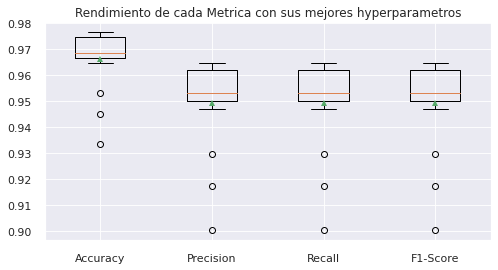

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

Para el caso de las aguas subterraneas, observamos resultados más bajos en comparación a los modelos usados para las aguas superficiales, pero también podemos notar que tenemos una mejor distribución de los Bloxpot, podría ser un indicador de rendimientos mejores, pero de igual forma las curvas de entrenamiento nos darán una mejor perspectiva.

###Curvas de entrenamiento.

In [ ]:
def mi_ModeloYCurvasDT2(Xin):
      

    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloDT_Optimizado)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = y_train2,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Me_Recall,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Recall")

Curvas de aprendizaje del modelo DT:


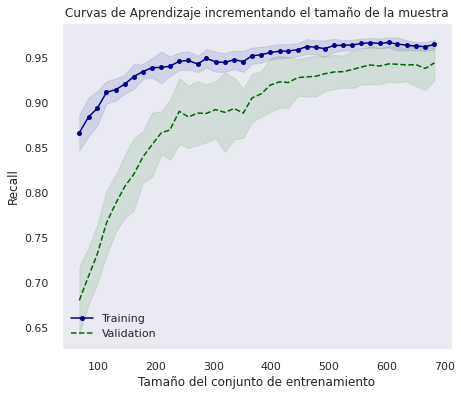

In [ ]:
print('Curvas de aprendizaje del modelo DT:')
mi_ModeloYCurvasDT2(X_train2)

Para el modelo vemos que sus curvas tanto de entrenamiento como de validación tienden a juntarse de forma correcta, sin alterar sesgos ni varianzas, un buen indicador del funcionamiento del modelo.

###Feature Importance

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.00000
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: 0.19971
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.43090
Feature: OD_PORC, Score: 0.00000
Feature: OD_PORC_SUP, Score: 0.00959
Feature: OD_PORC_MED, Score: 0.00000
Feature: OD_PORC_FON, Score: 0.01531
Feature: TOX_D_48_UT, Score: 0.00000
Feature: TOX_V_15_UT, Score: 0.00000
Feature: TOX_D_48_SUP_UT, Score: 0.00000
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00000
Feature: CALIDAD_DQO, Score: 0.00000
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: 0.00000
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00000
Feature: CALIDAD_OD_PORC, Score: 0.00000
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: 0.21559
Feature: CALIDAD_OD_PORC_FON, Score: 0.00000
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: CALIDA

<BarContainer object of 32 artists>

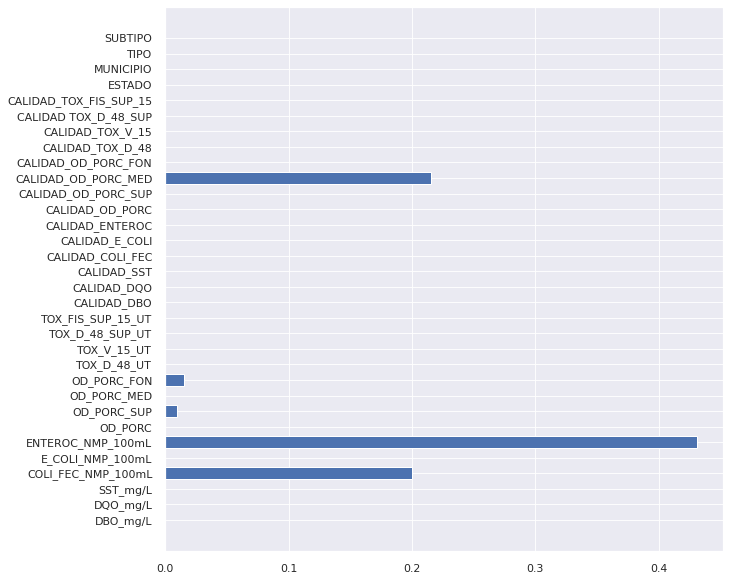

In [ ]:
modeloDT2_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDT2_Optimizado)])

pipeline.fit(X_train,np.ravel(y_train))
y_pred = pipeline.predict(X_test)

per_importances = permutation_importance(pipeline, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X.columns.to_numpy(), per_importances['importances_mean'])

###Diagrama de Árbol

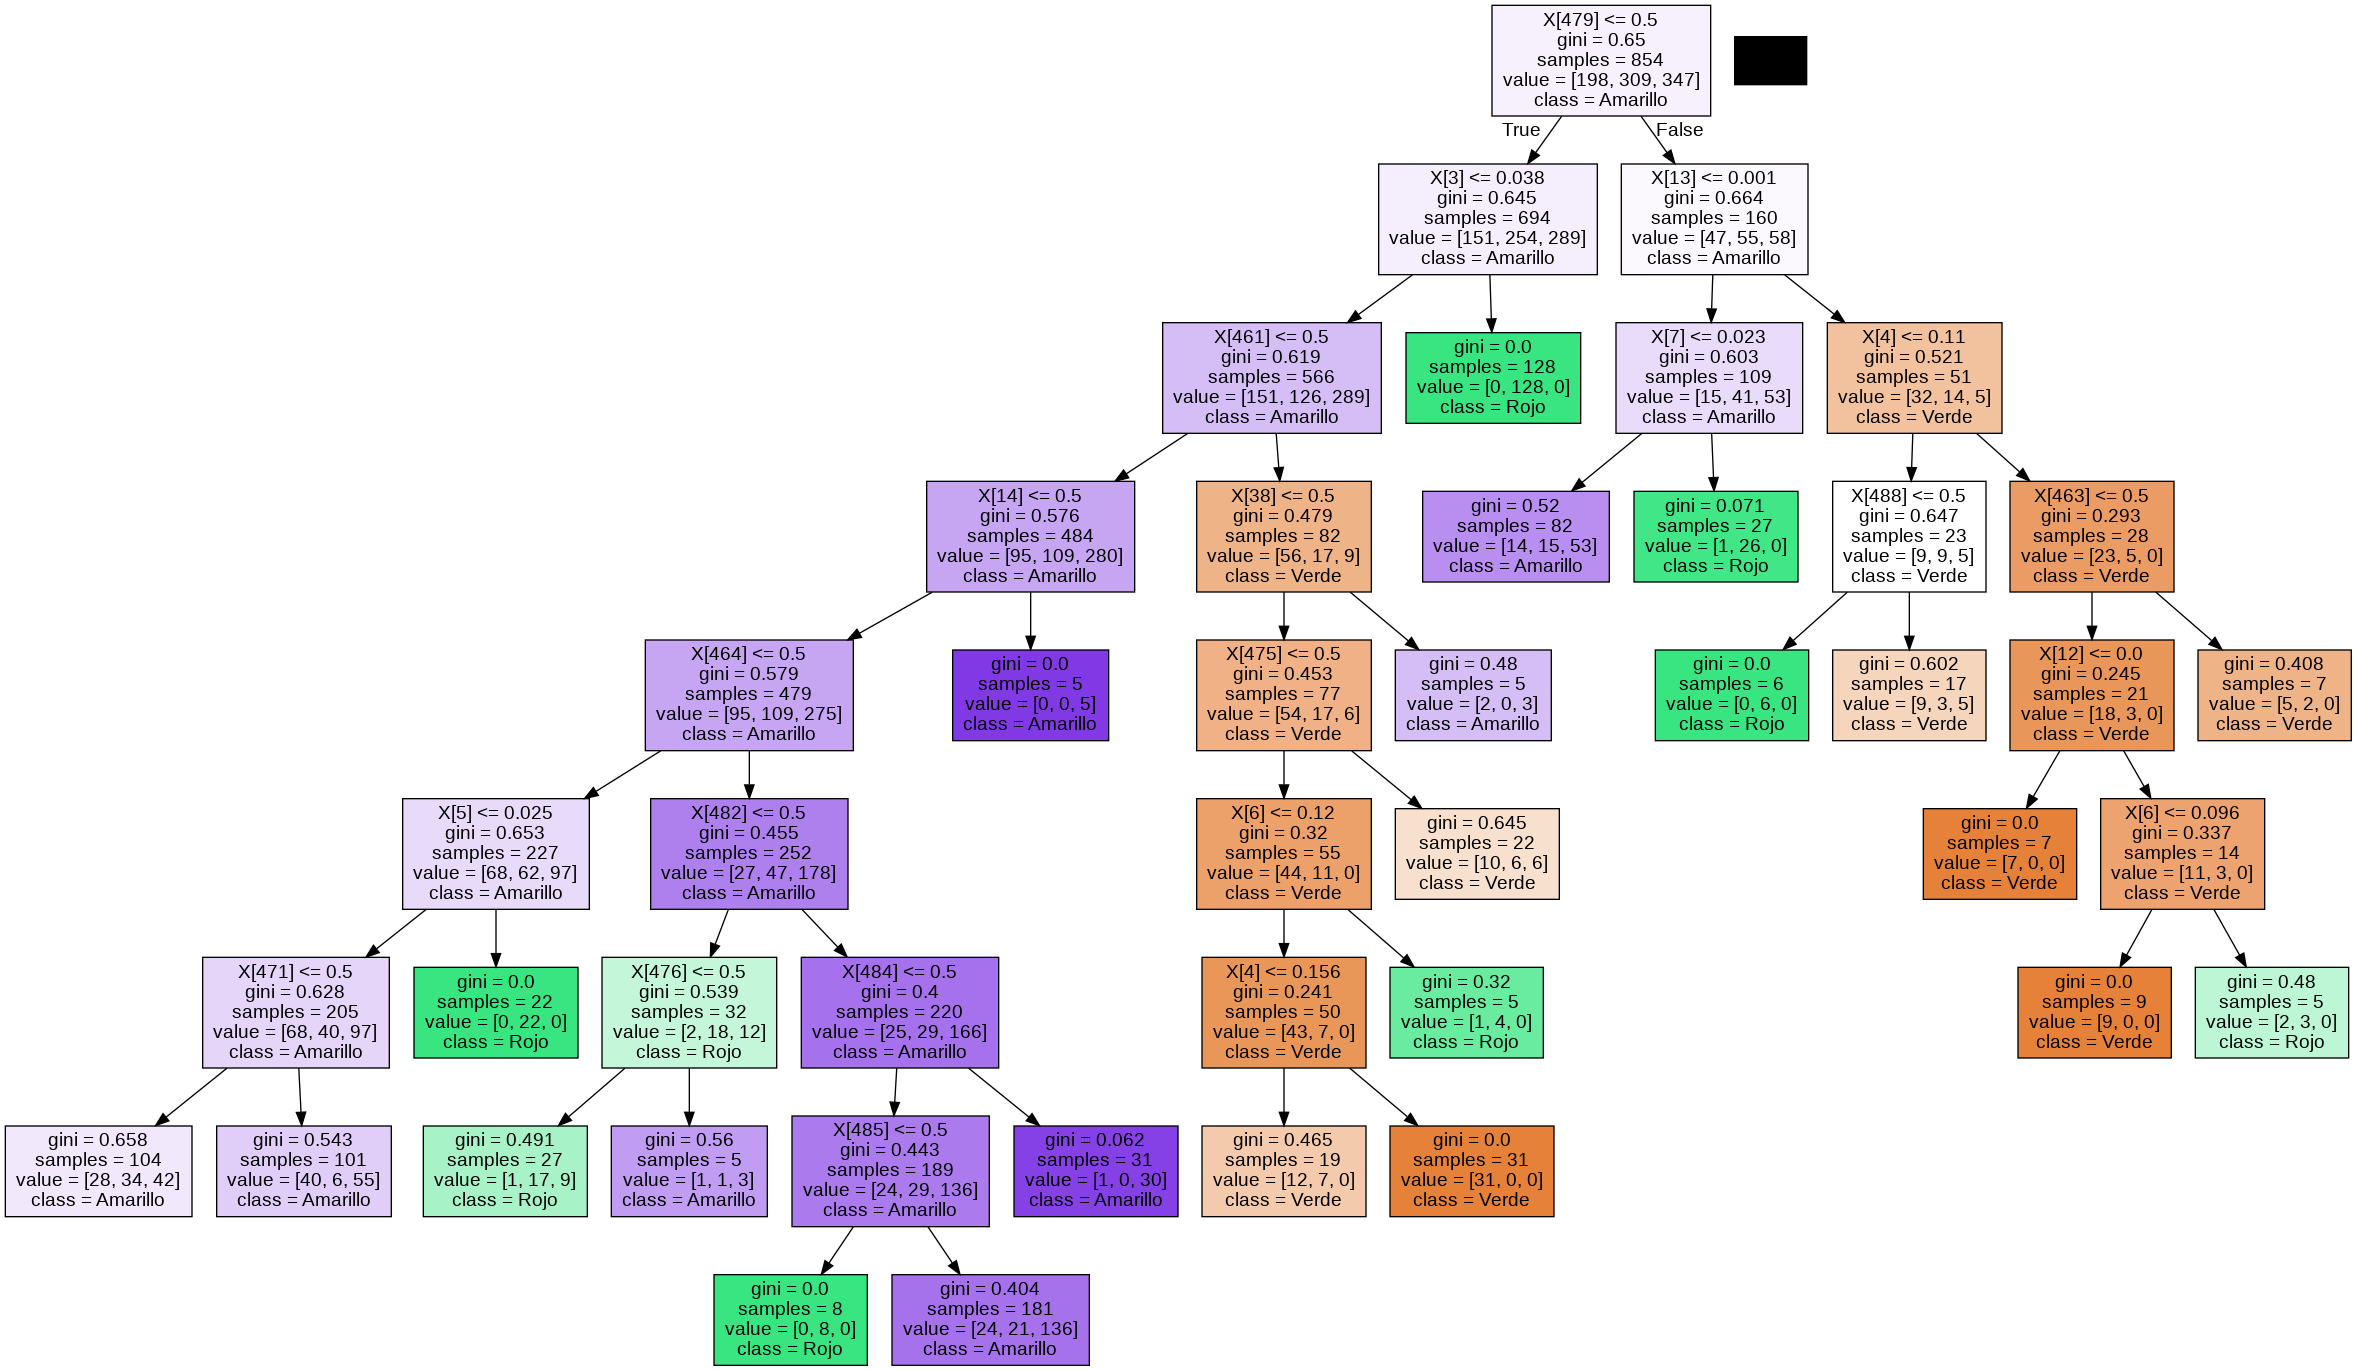

In [ ]:
modeloDT2_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)
Xct2 = columnasTransformer2.fit(X_train2)
Xxt2 = Xct2.transform(X_train2)
modeloDT2_Optimizado.fit(Xxt2, y_train2)


dot_data = tree.export_graphviz(decision_tree=modeloDT2_Optimizado, 
                                out_file=None,
                                max_depth=gridDT2.best_params_.get('max_depth'),
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Matrices de Confusión

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2, stratify = y2, random_state=42)

In [ ]:
#Evaluamos el modelo par sacr la matriz de confusion.
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloDT2_Optimizado)])

pipeline2.fit(X_train2, y_train2)

yhat2 = pipeline2.predict(X_test2)

cm2 = confusion_matrix(y_test2, yhat2)
print(cm2)

[[19  2 28]
 [ 8 53 17]
 [ 3  1 83]]


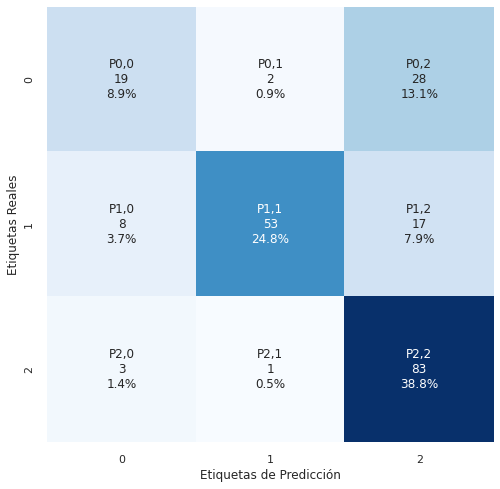

In [ ]:
txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
frecuencia = ["{0:0.0f}".format(value) for value in cm2.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

Podemos notar con la matriz de confusión que la tasa de falsos negativos esta alta en comparación a los modelos de aguas superficiales. Sin ver aun las curvas de Precision-Recall. Tal vez notemos que al tener una tasa de recall alta, perderemos mucha precisión del modelo al estimar verdaderos positivos.

###Grafica Precision-Recall

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2, stratify = y2, random_state=42)

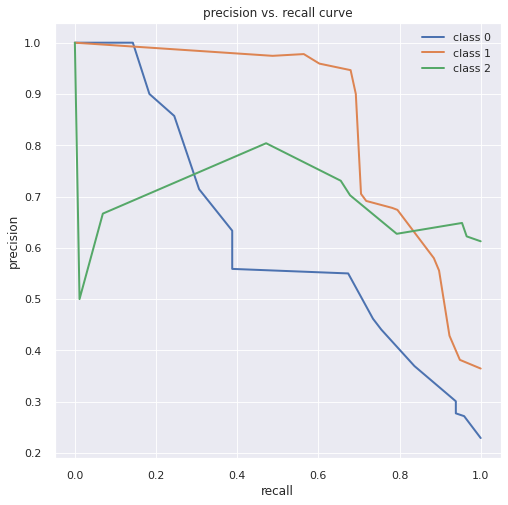

In [ ]:
modeloDT2_Optimizado = DecisionTreeClassifier(max_depth=gridDT2.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT2.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT2.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT2.best_params_.get('m__min_samples_split'),
                                    min_samples_leaf = gridDT2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloDT2_Optimizado)])

pipeline2.fit(X_train2, y_train2)

lr_probs2 = pipeline2.predict_proba(X_test2)
# Nos quedamos unicamente con las predicciones positicas


y_test_p2 = y_test2.copy()
my_vals2 = y_test_p2['SEMAFORO_Type'].unique().tolist()
my_vals2.sort()

  
y_test2 = label_binarize(y_test2, classes=my_vals2)
n_classes = y_test2.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test2[:, i], lr_probs2[:, i])
  average_precision[i] = average_precision_score(y_test2[:, i], lr_probs2[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Y en efecto, podemos notar en la gráfica que recall castiga demasiado la tasa de precisión, esto dándonos aun así buen equilibrio de las clases, pero en este caso el modelo probablemente requiera mejores ajustes pare reducir de mejor manera los Falsos Negativos para evitar el impacto ambiental.

##Random Forest

Misma lógica de desarrollo que el modelo pasado.

###GridSearch

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2, stratify = y2, random_state=42)

In [ ]:
modeloRFC2 = RandomForestClassifier(random_state = 42)

# dicc_gridRFC2 = { 'm__ccp_alpha':[0.1, .01, .018,.02],
#              'm__criterion':['gini','entropy'],
#              'm__max_depth':[2,8,12,20],
#              'm__min_samples_split':[2,6,8,12],
#              'm__class_weight':['balanced',None],
#              'm__min_samples_leaf':[10,15,20],
#                           } 
#Este metodo tomo 65 minutos, dejaremos abajo ya con los valores escogidos para evitar ese tiempo
dicc_gridRFC2 = {'m__ccp_alpha':[.01],
                'm__criterion':['entropy'],
                'm__max_depth':[12],
                'm__min_samples_split':[2],
                'm__class_weight':[None],
                 'm__min_samples_leaf':[10],
                          }
 
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloRFC2)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridRFC2 = GridSearchCV(estimator=pipeline2, 
                    param_grid=dicc_gridRFC2, 
                    cv=cv, 
                    scoring= Me_Recall)


gridRFC2.fit(X_train2, np.ravel(y_train2))
gridRFC2.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC2.best_params_)
print('Métrica utilizada:', gridRFC2.scoring)

Mejor valor obtenido con la mejor combinación: 0.8739341812499103
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.01, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 12, 'm__min_samples_leaf': 10, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


###Medición de las métricas

In [ ]:
modeloRFC2_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC2.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC2.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloRFC2_Optimizado)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline2, X_train2, np.ravel(y_train2), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)
resultados
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nTrain Gmean: %.3f (%.4f)\nTest Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.935 (0.0062)
mean Test Accuracy: 0.916 (0.0179)

mean Train Precision: 0.902 (0.0093)
mean Test Precision: 0.874 (0.0269)

mean Train Recall: 0.902 (0.0093)
mean Test Recall: 0.874 (0.0269)

Train Gmean: 0.926 (0.0070)
Test Gmean: 0.905 (0.0204)

mean Train f1-score: 0.902 (0.0093)
mean Test f1-score: 0.874 (0.0269)



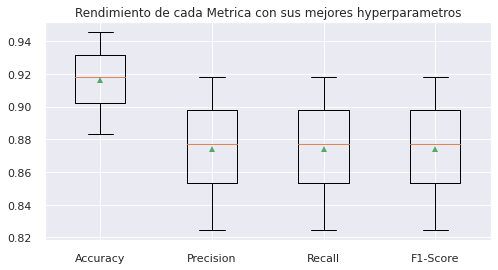

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

En el modelo de bosque aleatorio podemos notar también mejor distribución de los bloxpot, donde tenemos un ligero sesgo positivos de los datos por la relación entra la posición de la media y mediana. Pero aun así trabajando entre los rangos del 83% y 94%. De igual forma la curva de entrenamiento nos darán una mejor perspectiva, pero estas graficas muestran buenos rendimientos.

###Curvas de entrenamiento

In [ ]:
def mi_ModeloYCurvasRFC2(Xin):
      

    modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC2.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC2.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloRFC_Optimizado)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = np.ravel(y_train2),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Me_Recall,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Recall")

Curvas de aprendizaje del modelo RFC:


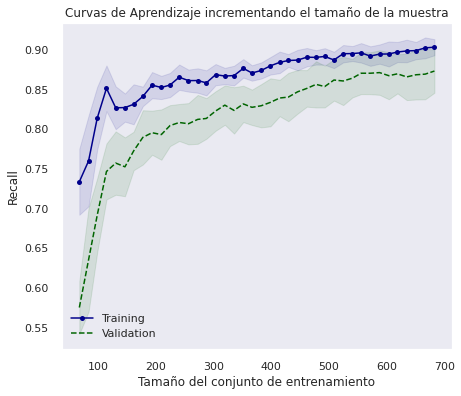

In [ ]:
print('Curvas de aprendizaje del modelo RFC:')
mi_ModeloYCurvasRFC2(X_train2)

La curva de entrenamiento se ve mucho mejor para el caso de las subterraneas que de las aguas superficiales. Mostrando una reducción de la varianza sin afectar el sesgo total de sobremanera, esto indicando un excelente rendimiento del modelo.

###Feature Importance

Feature: DBO_mg/L, Score: 0.00000
Feature: DQO_mg/L, Score: 0.00000
Feature: SST_mg/L, Score: 0.00000
Feature: COLI_FEC_NMP_100mL, Score: 0.00258
Feature: E_COLI_NMP_100mL, Score: 0.00000
Feature: ENTEROC_NMP_100mL, Score: 0.00286
Feature: OD_PORC, Score: 0.00072
Feature: OD_PORC_SUP, Score: 0.00000
Feature: OD_PORC_MED, Score: -0.00086
Feature: OD_PORC_FON, Score: -0.00086
Feature: TOX_D_48_UT, Score: 0.00258
Feature: TOX_V_15_UT, Score: 0.00329
Feature: TOX_D_48_SUP_UT, Score: 0.00358
Feature: TOX_FIS_SUP_15_UT, Score: 0.00000
Feature: CALIDAD_DBO, Score: 0.00014
Feature: CALIDAD_DQO, Score: 0.00000
Feature: CALIDAD_SST, Score: 0.00000
Feature: CALIDAD_COLI_FEC, Score: -0.00014
Feature: CALIDAD_E_COLI, Score: 0.00000
Feature: CALIDAD_ENTEROC, Score: 0.00000
Feature: CALIDAD_OD_PORC, Score: 0.00000
Feature: CALIDAD_OD_PORC_SUP, Score: 0.00000
Feature: CALIDAD_OD_PORC_MED, Score: -0.00100
Feature: CALIDAD_OD_PORC_FON, Score: -0.00086
Feature: CALIDAD_TOX_D_48, Score: 0.00000
Feature: C

<BarContainer object of 32 artists>

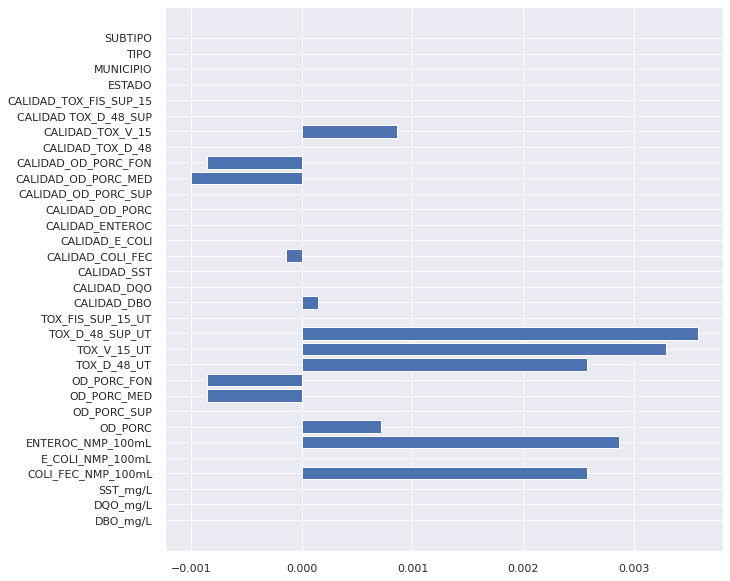

In [ ]:
modeloRFC2_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC2.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC2.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42)

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloRFC2_Optimizado)])

pipeline.fit(X_train,np.ravel(y_train))
y_pred = pipeline.predict(X_test)

per_importances = permutation_importance(pipeline, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
for per,val in enumerate(per_importances['importances_mean']):
  print("Feature: %s, Score: %.5f" % (X.columns[per],val))

sns.set(rc={'figure.figsize':(10,10)})
plt.barh(X.columns.to_numpy(), per_importances['importances_mean'])

###Matriz de Confusión

In [ ]:
#Evaluamos el modelo par sacr la matriz de confusion.
pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloRFC2_Optimizado)])

pipeline2.fit(X_train2, y_train2)

yhat2 = pipeline2.predict(X_test2)

cm2 = confusion_matrix(y_test2, yhat2)
print(cm2)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[[36  2 11]
 [11 58  9]
 [ 0  0 87]]


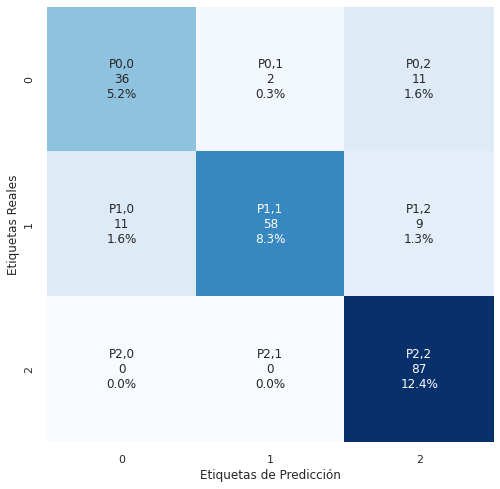

In [ ]:
txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
frecuencia = ["{0:0.0f}".format(value) for value in cm2.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm2.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

También dentro de la evaluación rápida de la matriz de confusión podemos notar que los Falsos negativos no está representando un gran porcentaje de los datos, como tampoco los falsos positivos, esto nos podría indicar que la curvas de Precision-Recall saldrán con un equilibrio bastante bueno.

##Graficas Precision-Recall

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2,stratify = y2,  random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


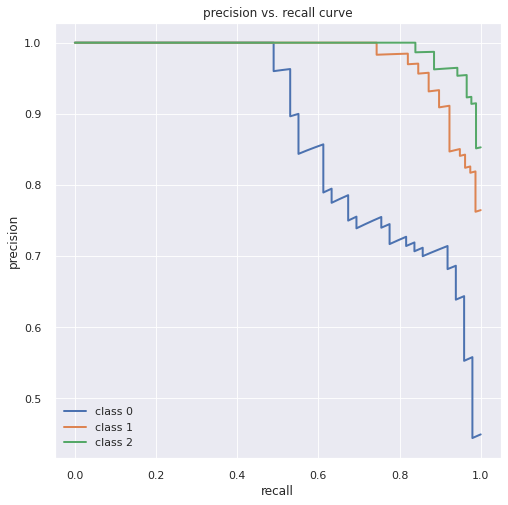

In [ ]:
modeloRFC2_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC2.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC2.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modeloRFC2_Optimizado)])

pipeline2.fit(X_train2, y_train2)

lr_probs2 = pipeline2.predict_proba(X_test2)



y_test_p2 = y_test2.copy()
my_vals2 = y_test_p2['SEMAFORO_Type'].unique().tolist()
my_vals2.sort()

  
y_test2 = label_binarize(y_test2, classes=my_vals2)
n_classes = y_test2.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test2[:, i], lr_probs2[:, i])
  average_precision[i] = average_precision_score(y_test2[:, i], lr_probs2[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Podemos notar con la gráfica como el equilibrio entre la precisión y el recall se mantienen aun cuando recall aumente su tasa de rendimiento la métrica de precisión no pierde contra este aumento. Mostrando que el modelo esta clasificando de una manera correcta los resultados que ve.

###Diagrama de Árbol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


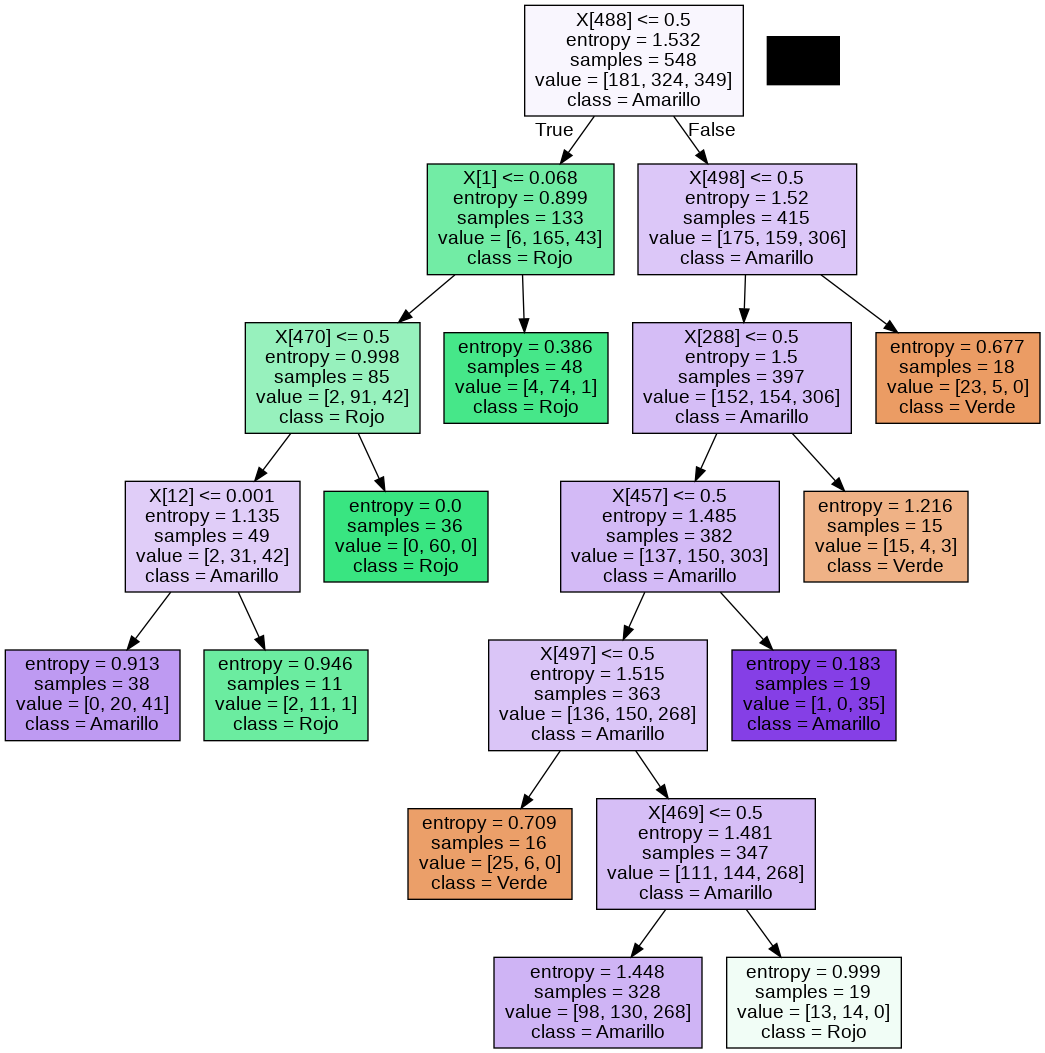

In [ ]:
modeloRFC2_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC2.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridRFC2.best_params_.get('m__class_weight'),                                
                                    criterion=gridRFC2.best_params_.get('m__criterion'),
                                    min_samples_split=gridRFC2.best_params_.get('m__min_samples_split'),
                                    max_depth = gridRFC2.best_params_.get('m__max_depth'),
                                    min_samples_leaf = gridRFC2.best_params_.get('m__min_samples_leaf'),
                                    random_state = 42,
                                    max_features = 20,)
Xct2 = columnasTransformer2.fit(X_train2)
Xxt2 = Xct2.transform(X_train2)
modeloRFC2_Optimizado.fit(Xxt2, y_train2)
estimator2 = modeloRFC2_Optimizado[10]

dot_data = tree.export_graphviz(decision_tree=estimator2, 
                                out_file=None,
                                max_depth=gridDT2.best_params_.get('max_depth'),
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Evaluación de Modelos Extras

Al igual que en aguas superficiales. Regresión logística, Potenciador de Gradiente y Vector soporte.

In [ ]:
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2,stratify = y2, random_state=42)

>> LR: 0.965 (0.022)
************************************************************************


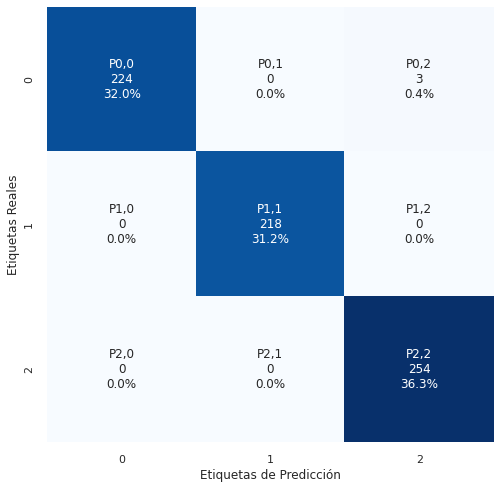

************************************************************************


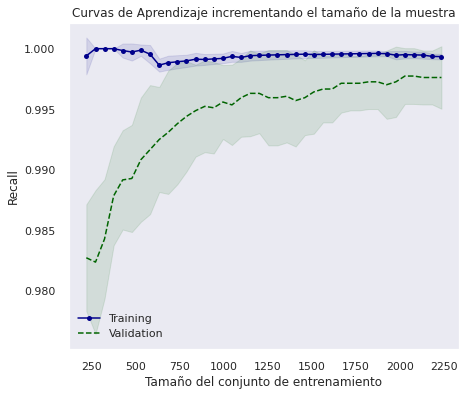



>> XGT: 0.978 (0.018)
************************************************************************


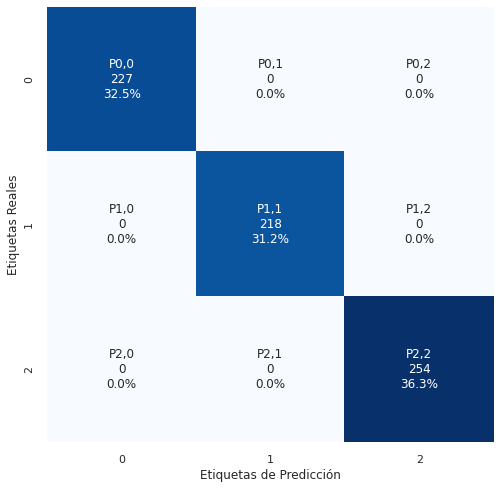

************************************************************************


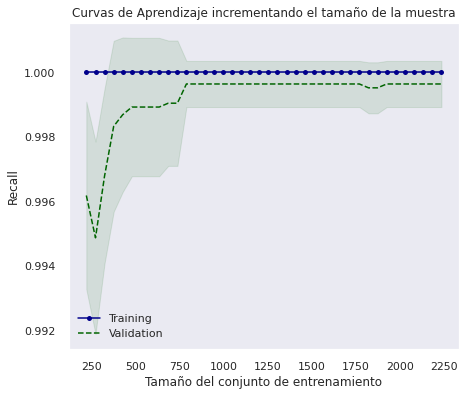



>> SVC: 0.971 (0.019)
************************************************************************


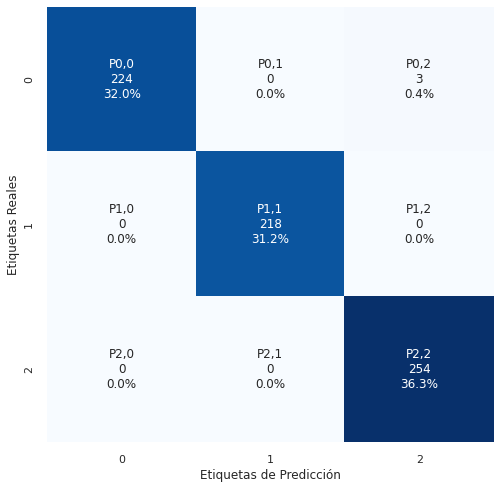

************************************************************************


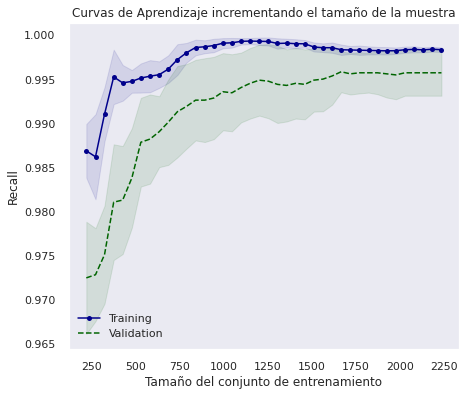

In [ ]:
modelos, nombres = get_models()  
resultados_adicionales = list()   

for i in range(len(modelos)):

  pipeline2 = Pipeline(steps=[('ct',columnasTransformer2),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(pipeline2, X_train2, np.ravel(y_train2), scoring=Me_Recall, cv=cv)


  resultados_adicionales.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))
  print("************************************************************************")
  CM_modelo(columnasTransformer,modelos[i],X_train,np.ravel(y_train),X_test,np.ravel(y_test))
  print("************************************************************************")
  mi_ModeloYCurvas_general(X_train,y_train,modelos[i],columnasTransformer)
  print("\n")

Podemos al ver las gráficas que llegamos a conclusiones muy parecidas a los que tuvimos con el modelo de aguas superficiales, se puede notar que los modelos tanto de regresión logística como de vector soporte muestran graficas de entrenamiento bastante similares en resultados y en ambas se muestra una clara mejora durante el proceso de entrenamiento mientras el conjunto aumenta. Para el modelo del potenciador gradiente vemos que no aprende del todo y la gráfica de entrenamiento parece estar indicando sobreentrenamiento, siendo talvez un modelo muy complejo para este caso del semáforo o con hyperparametros sobre optimizados o complejos.

###Votos de los Clasificadores

In [ ]:
classifiers = [ ['LogisticRegression :',  modelos[0]],
                ['GradientBoostingClassifier: ', modelos[1]],
                ['SVC :', modelos[2]],
                ['DecisionTree :',modeloDT2_Optimizado],
                ['RandomForest :',modeloRFC2_Optimizado] 
              ]

Xct2 = columnasTransformer2.fit(X_train2)
Xxt2 = Xct2.transform(X_train2)

Xcte2 = columnasTransformer2.fit(X_train2)
Xxte2 = Xcte2.transform(X_test2)

predictions2_df = pd.DataFrame()
predictions2_df['action'] = y_test2

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(Xxt2, np.ravel(y_train2))
    predictions2 = classifier.predict(Xxte2)
    predictions2_df[name.strip(" :")] = predictions2
    print(name, mi_accuracy(y_test2, predictions2))


eclf1 = VotingClassifier(estimators=[('LogisticRegression', modelos[0]), ('GradientBoostingClassifier', modelos[1]),  ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)], voting='soft')
eclf1.fit(Xxt2, np.ravel(y_train2))
predictions2 = eclf1.predict(Xxte2)
print("\nVotos Soft")
print(classification_report(y_test2, predictions2))
print("\n")

eclf2 = VotingClassifier(estimators=[('LogisticRegression', modelos[0]), ('GradientBoostingClassifier', modelos[1]),  ('DecisionTree :',modeloDT_Optimizado),('RandomForest :',modeloRFC_Optimizado)], voting='hard')
eclf2.fit(Xxt2, np.ravel(y_train2))
predictions2 = eclf2.predict(Xxte2)
print("\nVotos Hard")
print(classification_report(y_test2, predictions2))

LogisticRegression : 0.9750778814388811
GradientBoostingClassifier:  0.9719626166419517
SVC : 0.9781931462358104
DecisionTree : 0.8161993767954852
RandomForest : 0.9034267911095064

Votos Soft
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       1.00      0.96      0.98        78
           2       0.96      1.00      0.98        87

    accuracy                           0.97       214
   macro avg       0.97      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214




Votos Hard
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        49
           1       1.00      0.86      0.92        78
           2       0.98      0.99      0.98        87

    accuracy                           0.93       214
   macro avg       0.92      0.94      0.93       214
weighted avg       0.94      0.93      0.94       214



A diferencia de las aguas superficiales, aquí podemos notar la diferencia de la asignación de los pesos a las clases, donde del 100%, aquí tenemos un 94% y 95% en los conteos soft y hard. Pero aun así vemos esto como un gran numero para asignar un peso clasificatorio sin darle menos importancia a una u otra.

#Conclusión.

En conclusión, la realización de este reto ha sido en sobremanera un reto personal para los dos, en el sentido que no solo buscamos cumplir con lo pedido, sino de dar ese extra para tratar de exponencial y aplicar los conocimientos adquiridos para la implementación, mejora e interpretación de los modelos de clasificación. Un reto en el sentido de que tuvimos no solo que ajustar métricas de medición de rendimiento para este problema multiclase, sino que también entender cada resultado que fuimos arrojando en los distintos gráficos y entender que, aunque un modelo sea más complejo que otros, no siempre es una opción viable para el problema a enfrentar. Pudimos notar que entre el problema de aguas superficiales y subterráneas, para uno funciono mejor el árbol de decisión y para el otro el bosque aleatorio, pudiera esto ser en base a los hyperparametros, puede ser. Pero al final del día los resultados no solo nos ayudan con el afianzar conocimientos, sino aplicarlos y darles ese valor en problemas reales que buscamos resolver con la implementación de estas tecnologías.


#Referencias

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
- Brownlee, J. (2020, 04 17). How to Develop Voting Ensembles With Python. Retrieved from https://machinelearningmastery.com/voting-ensembles-with-python/
- VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".
- GEOMATAS. (2022). 7 librerías de Python para SIG y cartografía. Obtenido de https://geomatas.com/7-librerias-de-python-para-sig-y-cartografia/
- GeoPy. (2022). Welcome to GeoPy’s documentation! Obtenido de https://geopy.readthedocs.io/en/stable/
- NAIK, K. (2020). P2: sklearn K-Means (Elbow and Silhouette Method). Obtenido de https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method/notebook
- Geeks for Geeks. (2022, 08 22). Elbow Method for optimal value of k in KMeans. Retrieved from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
- Bahl, A. (22 de 11 de 2019). MAPE v/s MAE% v/s RMSE. Obtenido de https://agrimabahl.medium.com/mape-v-s-mae-v-s-rmse-3e358fd58f65
- Gad, A. (27 de 07 de 2018). Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?”. Obtenido de https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e
- IBM. (13 de 09 de 2022). Tipos de variables. Obtenido de https://www.ibm.com/docs/es/spss-statistics/saas?topic=charts-variable-types
- Morales, L. E. (2022). Perceptrón Multi Capa (MLP): Interpretación Geométrica (ejemplo). Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales Artificiales: Perceptrón Simple. Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales y Aprendizaje Automático. Guadalajara: ITESM.
- scikit-learn. (29 de 10 de 2022). Varying regularization in Multi-layer Perceptron. Obtenido de https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#:~:text=Alpha%20is%20a%20parameter%20for,that%20appears%20with%20lesser%20curvatures
- Sérgio Moro, P. R. (2015). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. ELSEVIER, 11.
- Shin, T. (26 de 02 de 2022). Understanding Feature Importance and How to Implement it in Python. Obtenido de https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
-Ramírez, J. (19 de 07 de 2018). Curvas PR y ROC. Obtenido de https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527#:~:text=PR%20curve%20(curva%20precision%2Drecall)&text=Este%20valor%20es%20el%20Average,comparar%20el%20rendimiento%20de%20modelos
- Vandeput, N. (05 de 07 de 2019). Forecast KPIs: RMSE, MAE, MAPE & Bias. Obtenido de https://towardsdatascience.com/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d
- Zvornicanin, E. (01 de 10 de 2022). What is Feature Importance in Machine Learning? Obtenido de https://www.baeldung.com/cs/ml-feature-importance#:~:text=3.-,3.,a%20current%20model%20and%20prediction.
-Khan, M. (2017, 08 01). KMeans Clustering for Classification. Retrieved from https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
- Nithum Thain, A. P. (2022, 03). Are Model Predictions Probabilities? Retrieved from https://pair.withgoogle.com/explorables/uncertainty-calibration/


